# 链接仪器

In [90]:
from qulab.sugar import connect
from qulab.job import Job
from qulab.storage.utils import save
import matplotlib.pyplot as plt, seaborn as sns
import numpy as np, sympy as sy, visa, random
from collections import namedtuple, deque, defaultdict, OrderedDict, Counter
from scipy.optimize import curve_fit, least_squares as ls
import time, asyncio, sys, imp, pandas as pd, scipy, pickle
from tqdm import tqdm_notebook as tqdm
from easydl import clear_output
from sklearn.cluster import KMeans
from configparser import ConfigParser
from qulab import optimize, measureroutine_population, computewave_wave, imatrix, waveform_new, dataTools, dataTools_copy, qGate_basewave
# from qulab.waveform import CosPulseDrag, Expi, DC, Step, Gaussian
from qulab.math.qst import transformList, acquireVFromData, vToRho
from qulab.math import opt, opt_sa
import gc
opt = imp.reload(opt)
opt_sa = imp.reload(opt_sa)
op = imp.reload(optimize)
mrw = imp.reload(measureroutine_population)
cww = imp.reload(computewave_wave)
mx = imp.reload(imatrix)
wn = imp.reload(waveform_new)
dtl = imp.reload(dataTools)
qgw = imp.reload(qGate_basewave)
dt_copy = imp.reload(dataTools_copy)
# mr = imp.reload(measureroutine)
# cw = imp.reload(computewave)
# mn = imp.reload(measureroutine_new)
# wf = imp.reload(wavepoint)

In [361]:
# await awg134.close_all()

In [28]:
awg131 = await connect('AWG131')
awg132 = await connect('AWG132')
awg133 = await connect('AWG133')
awg134 = await connect('AWG134')
afg= await connect('AFG')
awg100 = await connect('AWG100')
# ats18 = await connect('ATS18')
ats19 = await connect('ATS19')
psg101 = await connect('PSG101')
psg230 = await connect('PSG230')
# psg104 = await connect('PSG104')
# psg103 = await connect('PSG103')
psg105 = await connect('PSG105')
psg106 = await connect('PSG106')
dc01 = await connect('DC01')
dc02 = await connect('DC02')
dc03 = await connect('DC03')
dc04 = await connect('DC04')
dc05 = await connect('DC05')
dc06 = await connect('DC06')
dc07 = await connect('DC07')
dc08 = await connect('DC08')
dc10 = await connect('DC10')
dc11 = await connect('DC11')
dc15 = await connect('DC15')
dc20 = await connect('DC20')
# att3 = await connect('Att3')
# att4 = await connect('Att4')
# att5 = await connect('Att5')
# att6 = await connect('Att6')
# att7 = await connect('Att7')
# att8 = await connect('Att8')
# att9 = await connect('Att9')
# # #pna = await connect('PNA')

In [57]:
t_new = np.linspace(-45000,5000,125000)*1e-9
t_list = t_new*1e9 - np.min(t_new)*1e9
t_list

array([0.000000e+00, 4.000032e-01, 8.000064e-01, ..., 4.999920e+04,
       4.999960e+04, 5.000000e+04])

In [83]:
await awg100.query('*IDN?')

'TEKTRONIX,AWG5014C,B050969,SCPI:99.0 FW:4.6.0.7 \n'

In [5]:
await ats19.getValue('f_list')

[50000000.0]

# redis测试

In [4]:
import redis

# 普通连接
conn = redis.Redis(host="10.122.7.19",port=6379)
conn.set("x1","hello",ex=1) # ex代表seconds，px代表ms
val = conn.get("x1")
print(val)

b'hello'


In [4]:
rm = visa.ResourceManager()
INS = rm.open_resource('TCPIP::10.122.7.134')
x = INS.query('syst:err?')
x
# awg134.query('WLIS:LIST?')

'0,"No error"\n'

# 设置TrigB

In [4]:
await afg.reset()
await asyncio.sleep(2)
await afg.setValue('Output','ON',ch=1)
await afg.setValue('Function','Pulse',ch=1)
await afg.setValue('Pulse Period',110e-6,ch=1)
await afg.setValue('Pulse Width',1e-6,ch=1)
await afg.setValue('Amplitude',5,ch=1)
await afg.setValue('Offset',0,ch=1)

In [24]:
for i in range(10):
#     await afg.stop()
    await afg.write('*TRG')
#     await afg.run()
    time.sleep(1)

# qubit工作点

In [4]:
# freqall = np.array([6.505,6.517,6.53,6.542,6.559,6.571,6.587,6.601,6.6045,6.63])*1e9
# freqall = np.array([6.451,6.466,6.478,6.494,6.51,6.508,6.516,6.534,6.563,6.576])*1e9
freqall = np.array([6.545, 6.564, 6.588, 6.608, 6.63, 6.649, 6.642, 6.689, 6.71, 6.73])*1e9
# freqall = freqall[::-1]
f_cavity = {'q%d'%(i):j for i, j in enumerate(freqall,start=1)}

In [53]:
measure.freqall = f_cavity

In [385]:
measure.jpa = jpa

In [210]:
# jpa = mrw.qubit(q_name='jpa',inst={'dc':'dc15','pump':'psg_pump'},bias=-0.825,f_ex=2*6.76e9+2e6,power_ex=4.73) #power=-2.1 

In [267]:
jpa = mrw.qubit(q_name='jpa',inst={'dc':'dc15','pump':'psg_pump'},bias=-1.397,f_ex=2*6.74e9+2e6,power_ex=7.34)

In [65]:
jpa = mrw.qubit(q_name='jpa',inst={'dc':'dc15','pump':'psg_pump'},bias=-1.428,f_ex=2*6.75e9+2e6,power_ex=5.24)

In [33]:
jpa = mrw.qubit(q_name='jpa',inst={'dc':'dc15','pump':'psg_pump'},bias=-1.339,f_ex=2*6.734e9+2e6,power_ex=5.339)

In [259]:
jpa = mrw.qubit(q_name='jpa',inst={'dc':'dc15','pump':'psg_pump'},bias=-0.275,f_ex=2*6.75e9+2e6,power_ex=5.259)

In [60]:
jpa = mrw.qubit(q_name='jpa',inst={'dc':'dc15','pump':'psg_pump'},bias=-1.339,f_ex=2*6.6822e9+2e6,power_ex=5.339)

In [66]:
measure.jpa = jpa

In [ ]:
-1.339,  5.339, 6.6822e9

## 保存工作点

In [57]:
qstate = []
def tuple2dict(q):
    for i in q:
        qstate.append(i.asdict())
    return qstate

bit = [q1,q2,q3,q4,q5,q6,q7,q8,q9,q10]
filepath = save('QubitState','qubitstate',state = tuple2dict(bit),base_path=r'D:\skzhao\file_name\wave')
with open(r'D:\skzhao\file_name\qubit_state_wave.txt', mode='a') as filename:
    filename.write(str(filepath))
    filename.write('\n')
print(filepath)

D:\skzhao\file_name\wave\2021\0410\QubitState_20210410185210.npz


## 提取工作点

In [6]:
fl = np.loadtxt(r'D:\skzhao\file_name\qubit_state_wave.txt',dtype='str')
f = str(fl[-1])
f = r'D:\skzhao\file_name\wave\2021\0410\QubitState_20210410185210.npz'    #otoc
# f = r'D:\skzhao\file_name\wave\2020\1214\QubitState_20201214032811.npz'
# f = r'D:\skzhao\file_name\wave\2020\1214\QubitState_20201214231752.npz'
# f = r'D:\skzhao\file_name\wave\2020\1221\QubitState_20201221201748.npz'   #q1直流偏开
data = np.load(f,allow_pickle=True)
def dict2tuple(q):
    for i,k in enumerate(q):
        attr = {}
        for j in mrw.qubit().asdict():
            if j in k:
                attr[j] = k[j]
            else:
                attr[j] = None
        globals()[k['q_name']] = mrw.qubit(**attr)

dict2tuple(data['state'])
print(f)


D:\skzhao\file_name\wave\2021\0410\QubitState_20210410185210.npz


In [109]:
measure.qubits['q8'].volt_swap

In [53]:
for i in measure.qubits:
    measure.qubits[i].delta_ex = delta_ex[i]

## 注意检查

In [108]:
qubitlist = [q1,q2,q3,q4,q5,q6,q7,q8,q9,q10]
measure.qubits= {i.q_name:i for i in qubitlist}

In [71]:
for i in measure.qubits:
    if globals()[i] != measure.qubits[i]:
        print(i)
        raise 'different qubit'

# 提取IQ-Mixer配置参数

In [258]:
fl = np.loadtxt(r'D:\skzhao\file_name\iqmixer_state.txt',dtype='str')
f = str(fl[-1])
data = np.load(f,allow_pickle=True)

atributte = ['q_name','alpha_read','alpha_ch1','alpha_ch2','alpha_ch3','alpha_ch4','alpha_ch5',\
            'beta_read','beta_ch1','beta_ch2','beta_ch3','beta_ch4','beta_ch5']
Iqmixer = namedtuple('Iqmixer',atributte,defaults=[{} for i in range(12)])

iqm = Iqmixer(q_name='Iqm') #power=-2.1

def dict2tuple(q):
    global iqm
    for i,k in enumerate(q):
        attr = []
        for j in atributte:
            if j in k:
                attr.append(k[j])
            else:
                attr.append(None)
        iqm = Iqmixer(*attr)

dict2tuple(data['state'])
# print(f,iqm)

In [260]:
iqm.beta_read

{'6.632150': array([ 0.002, -0.005]), '6.759000': array([ 0.001, -0.008])}

In [407]:
ch_I, ch_Q, offset_I, offset_Q = 1,5,0,0
await awg.setValue('Offset',offset_I,ch=ch_I)
await awg.setValue('Offset',offset_Q,ch=ch_Q)

# 指定仪器

In [7]:
psg_lo = psg105
psg_ex1 = psg106
psg_trans = psg230
# psg_ex2 = psg106
# psg_ex3 = psg103
psg_pump = psg101
psg = {'psg_lo':psg_lo,'psg_ex1':psg_ex1,'psg_trans':psg_trans,'psg_pump':psg_pump}
ats = ats19
dc = {'q8':dc01,'q7':dc02,'q3':dc11,'q5':dc03,'q4':dc08,\
      'q9':dc07,'q2':dc04,'q6':dc06,'jpa':dc15,'q10':dc05,'q1':dc20}
#awg = awg132
# attinst = {'com3':att3,'com4':att4,'com5':att5,'com6':att6,'com7':att7,'com8':att8,'com9':att9}
attinst={}
awg_list = {'awg131':awg131,'awg132':awg132,'awg133':awg133,'awg134':awg134,'awgread':awg133,'awg_trig':awg133,'awg_trig100':awg100}

In [229]:
measure.dc = dc

## 测量类

In [8]:
measure = mrw.common(f_cavity,ats,dc,psg,awg_list,attinst,jpa,[q1,q2,q3,q4,q5,q6,q7,q8,q9,q10])

In [9]:
calimatrix1 = np.load(r'D:/QuLabData/2020/1212/crosstalk_cali_correct_20201212231657.npz')['mat']
# calimatrix1 = np.load(r'D:/QuLabData/2020/1203/crosstalk_cali/zheng2_crosstalk_q1-10_20201203154147.npz')['mat']
calimatrix=np.mat(calimatrix1)

## 保存提取全局变量

In [294]:
# cw.saveStatus(fname='D:/status.obj')
fname=r'D:\skzhao\log\status_with_q1_piopt_new.obj'
status = [measure.onwhich,measure.offwhich,measure.predict,measure.readmatrix,measure.postSle]
with open(fname, 'wb') as f:
    pickle.dump(status, f)

In [10]:
fname=r'D:\skzhao\log\status_with_q1_piopt_new.obj'
with open(fname, 'rb') as f:
    status = pickle.load(f)
measure.onwhich,measure.offwhich,measure.predict,measure.readmatrix,measure.postSle = status

# 初始化及同步AWG

In [13]:
await mrw.resetAwg(awg_list)

In [11]:
await mrw.awgSync(measure)

In [94]:
with open(r'D:\QuLabData\awgGui\state.txt', mode='w') as filename:
    filename.write('[5,0,75,65]')
    filename.write('\n') 

In [56]:
x = np.loadtxt(r'D:\QuLabData\awgGui\state.txt',delimiter=',',dtype=str)

# 信号检查

In [11]:
# delta = np.array([1.75e+08, 1.62e+08, 1.49e+08, 1.36e+08, 1.21e+08, 1.07e+08,
#        9.30e+07, 8.00e+07, 7.50e+07, 5.00e+07])
# f_lo, delta, n = await mr.resn(f)
# delta = measure.delta
delta = np.array([20e6])
await cww.modulation_read(measure,delta,readlen=1200)
# await mr.ats_setup(ats,delta,l=180+128)
await awg133.run()
f_list = await ats.getValue('f_list')
f_list

array([20000000.])

In [127]:
f_list = await ats.getValue('repeats')
f_list

3008

## 读出信号相位噪声

Output()

<IPython.core.display.Javascript object>


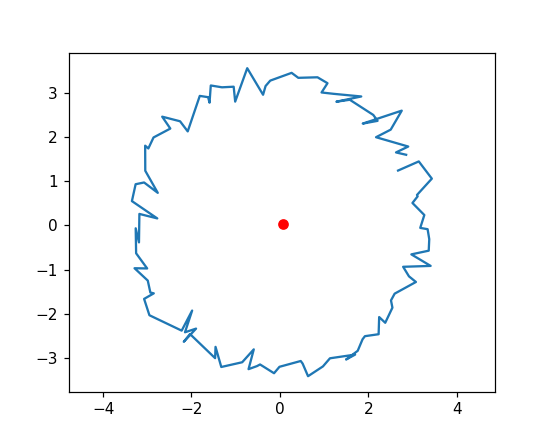

In [178]:
phase = np.linspace(0,2*np.pi,101)
job = Job(mrw.rPhase, (measure,phase), tags=['phase noise'], max=len(phase))
pp, sp = await job.done()
plt.figure(figsize=(5,4))
plt.plot(np.real(sp[:,0]),np.imag(sp[:,0]))
plt.plot(np.mean(np.real(sp[:,0])),np.mean(np.imag(sp[:,0])),'ro')
plt.axis('equal')
plt.show()

In [34]:
f_list = await ats.setValue('repeats',201)

In [70]:
f_list = await ats.getValue('f_list')
f_list

array([50000000.])

In [76]:
await psg_lo.setValue('Frequency',6.56e9)

## 复平面信号

<IPython.core.display.Javascript object>


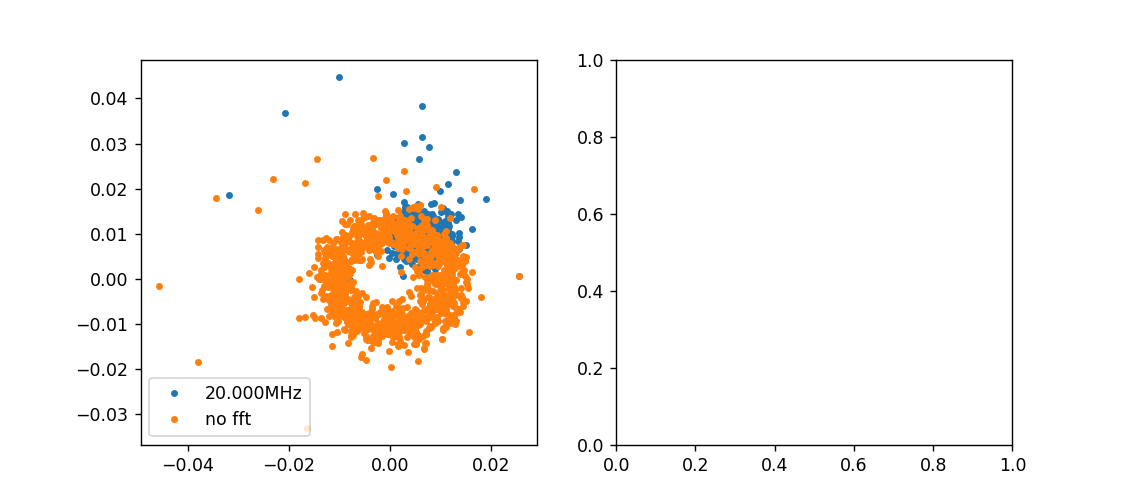

In [174]:

I, Q = 0, 0
await psg_lo.setValue('Output','ON')
await psg_ex1.setValue('Output','OFF')
# await mrw.jpa_switch(measure,state='OFF')
f_list = np.array(await ats.getValue('f_list'))
for i in range(1):
    chA, chB, ch_I, ch_Q = await ats.getTraces(fft=False,avg=True,hilbert=True,is2ch=False,offset=True)
    I += chA
    Q += chB
s, e, h = (I+1j*Q), [], len(f_list)//2+len(f_list)%2
t = np.arange(0, len(s), 1) / 1e9

fig, axes = plt.subplots(ncols=2,nrows=h,figsize=(9,4*h))
for i,f in enumerate(f_list):
    em = np.exp(-1j * 2 * np.pi * f * t)
    e.append(em)
    if h == 1:
        axes[i].plot(np.real(s*em),np.imag(s*em),'.',label='%.3fMHz'%(f/1e6))
        axes[i].plot(np.real(s),np.imag(s),'.',label='no fft')
        axes[i].legend(loc="lower left")
    else:
        axes[i//2][i%2].plot(np.real(s*em),np.imag(s*em),'.',label='%.3fMHz'%(f/1e6))
        axes[i//2][i%2].plot(np.real(s),np.imag(s),'.',label='no fft')
        axes[i//2][i%2].legend(loc="lower left")

plt.show()

## 时域信号

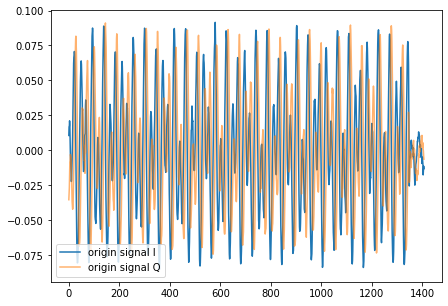

In [111]:
# %matplotlib notebook
I, Q = 0, 0
# await psg['psg_lo'].setValue('Output','ON')
# await psg['psg_ex1'].setValue('Output','OFF')
for i in range(1):
    chA, chB, ch_I, ch_Q = await ats.getTraces(hilbert=False,is2ch=False)
    I += chA
    Q += chB
    
plt.figure(figsize=(7,5))
plt.plot(np.arange(len(I)), I,label='origin signal I')
plt.plot(np.arange(len(Q)), Q,label='origin signal Q',alpha=0.6)
# plt.plot(np.arange(len(Q)), np.sqrt(I**2+Q**2),label='envelop')
plt.legend(loc="lower left")
plt.show()

<IPython.core.display.Javascript object>


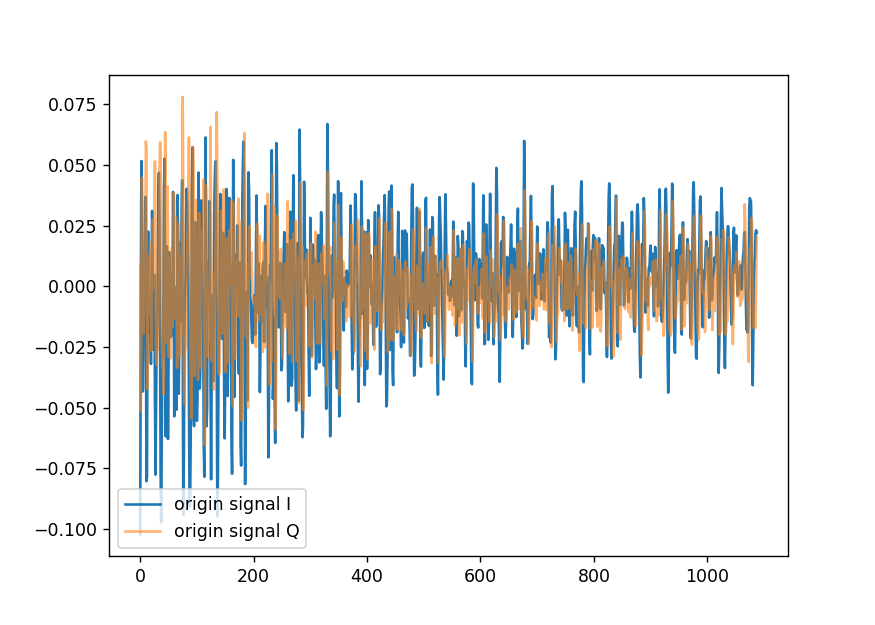

In [274]:
I, Q = 0, 0
await psg['psg_lo'].setValue('Output','ON')
await psg['psg_ex1'].setValue('Output','OFF')
for i in range(1):
    chA, chB, ch_I, ch_Q = await ats.getTraces(hilbert=False,is2ch=False)
    I += chA
    Q += chB
    
plt.figure(figsize=(7,5))
plt.plot(np.arange(len(I)), I,label='origin signal I')
plt.plot(np.arange(len(Q)), Q,label='origin signal Q',alpha=0.6)
# plt.plot(np.arange(len(Q)), np.sqrt(I**2+Q**2),label='envelop')
plt.legend(loc="lower left")
plt.show()

<IPython.core.display.Javascript object>


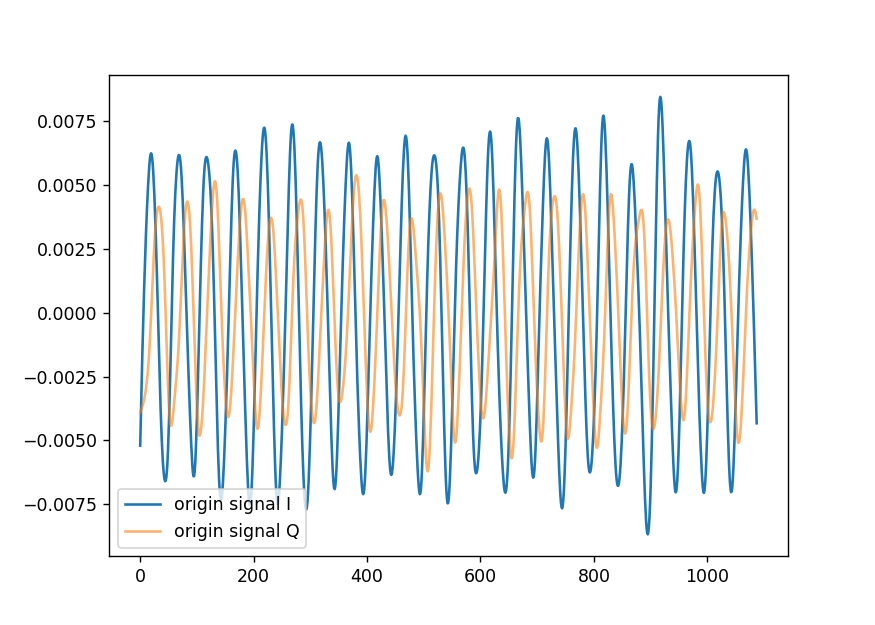

In [221]:
%matplotlib notebook
I, Q = 0, 0
await psg['psg_lo'].setValue('Output','ON')
# await psg['psg_ex1'].setValue('Output','OFF')
for i in range(1):
    chA, chB, ch_I, ch_Q = await mrw.yieldData(measure,avg=True,fft=False,offset=True,hilbert=False,is2ch=False,filter=0.1)
    I += chA
    Q += chB
# I = op.RowToRipe().smooth(I,f0=0.2)
plt.figure(figsize=(7,5))
plt.plot(np.arange(len(I)), I,label='origin signal I')
plt.plot(np.arange(len(Q)), Q,label='origin signal Q',alpha=0.6)
# plt.plot(np.arange(len(Q)), np.sqrt(I**2+Q**2),label='envelop')
plt.legend(loc="lower left")
plt.show()

In [192]:
a,b = await measure.ats.getData(True)
np.shape(a)

(320, 1088)

In [215]:
await psg_lo.setValue('Frequency',6e9)

## 频域信号

<IPython.core.display.Javascript object>


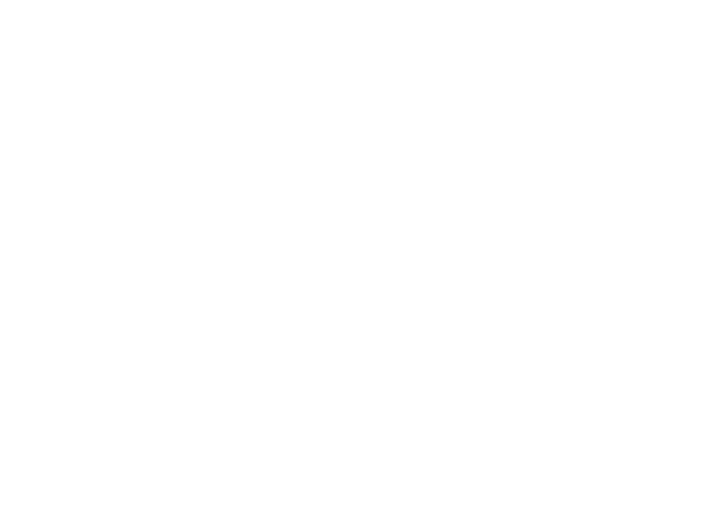

In [239]:
f = np.fft.fftshift(np.fft.fftfreq(len(I)))*1e9
Pxx = np.abs(np.fft.fftshift(np.fft.fft(I + 1j*Q)))
# x, y = np.linspace(0,len(I),len(I))*1e-9, I + 1j*Q
# f, Pxx = op.RowToRipe().spectrum(x,y,method='welch',shift=True)
Delta_list = np.array(await ats.getValue('f_list'))
plt.figure()

plt.vlines(Delta_list/1e6, np.min(Pxx), np.max(Pxx), 'r')

plt.semilogy(f/1e6, Pxx)

plt.grid(which='both')
plt.xlabel(r'$\Delta$ / MHz')
plt.xlim(-500,500)
plt.show()

## 优化读出

In [647]:
# await measure.psg['psg_lo'].setValue('Output','ON')
# awg = measure.awg['awgread']
# ch_I, ch_Q = 1,5
# await cww.genwaveform(awg,['opt_I','opt_Q'],[ch_I,ch_Q])
# pulse = await cww.rabiWave(envelopename=['square',1],nwave=1,amp=1,pi_len=0e-9)
# await cww.writeWave(measure,awg,['opt_I','opt_Q'],pulse)
# await cww.couldRun(measure,awg,chlist=[1,5],namelist=['opt_I','opt_Q'])
# opt.optimize(mrw.readIQMixer,[0,1,1],[np.pi/20,0.01,0.01],[5,3,3],high=[np.pi,1,1],low=[-np.pi,0,0],print_info=True)

# 仪器状态

In [38]:
clearseq = [f'awg13{i+1}' for i in range(4)]
clearseq = []
await cww.InitInst(measure,psgdc=True,awgch=True,clearwaveseq=clearseq)

In [41]:
state = await cww.QueryInst(measure)
pd.DataFrame(state)

q8      q7      q3      q5      q4      q9      q2      q6  \
ch1         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
ch2         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
ch3         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
ch4         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
ch5         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
ch6         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
ch7         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
ch8         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
error        +0      +0      +0      +0      +0      +0      +0      +0   
freq        NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
load     high Z  high Z  high Z  high Z  high Z  high Z  high Z  high Z   
mform       NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
moutput     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
offset   -0.818  -0.645  -0.433   -0.39   -0.02  -0.503  -0.285   0.233   
output      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
power       NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

            jpa     q10      q1        psg_lo      psg_ex1    psg_trans  \
ch1         NaN     NaN     NaN           NaN          NaN          NaN   
ch2         NaN     NaN     NaN           NaN          NaN          NaN   
ch3         NaN     NaN     NaN           NaN          NaN          NaN   
ch4         NaN     NaN     NaN           NaN          NaN          NaN   
ch5         NaN     NaN     NaN           NaN          NaN          NaN   
ch6         NaN     NaN     NaN           NaN          NaN          NaN   
ch7         NaN     NaN     NaN           NaN          NaN          NaN   
ch8         NaN     NaN     NaN           NaN          NaN          NaN   
error        +0      +0      +0             0            0            0   
freq        NaN     NaN     NaN   6.673300GHz  5.105367GHz  5.599000GHz   
load     high Z  high Z  high Z           NaN          NaN          NaN   
mform       NaN     NaN     NaN           EXT          EXT          EXT   
moutput     NaN     NaN     NaN             0            1            1   
offset   -1.428  -0.671  -1.125           NaN          NaN          NaN   
output      NaN     NaN     NaN             1            0            0   
power       NaN     NaN     NaN  15.000000dBm  8.000000dBm  3.000000dBm   

             psg_pump awg131 awg132 awg133 awg134  
ch1               NaN     ON     ON     ON    OFF  
ch2               NaN    OFF     ON    OFF    OFF  
ch3               NaN    OFF     ON    OFF    OFF  
ch4               NaN    OFF     ON    OFF    OFF  
ch5               NaN     ON     ON     ON    OFF  
ch6               NaN    OFF     ON    OFF    OFF  
ch7               NaN    OFF     ON    OFF    OFF  
ch8               NaN    OFF     ON    OFF    OFF  
error               0      0   -420   -420   -420  
freq     13.502000GHz    NaN    NaN    NaN    NaN  
load              NaN    NaN    NaN    NaN    NaN  
mform            EXT2    NaN    NaN    NaN    NaN  
moutput             0    NaN    NaN    NaN    NaN  
offset            NaN    NaN    NaN    NaN    NaN  
output              1    RUN    RUN    RUN    RUN  
power     5.240000dBm    NaN    NaN    NaN    NaN

In [116]:
sta = await cww.QueryInst(measure)
pd.DataFrame(sta)

q8      q7      q3      q5      q4      q9      q2      q6  \
ch1         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
ch2         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
ch3         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
ch4         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
ch5         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
ch6         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
ch7         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
ch8         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
error        +0      +0      +0      +0      +0      +0      +0      +0   
freq        NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
load     high Z  high Z  high Z  high Z  high Z  high Z  high Z  high Z   
mform       NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
moutput     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
offset   -0.818  -0.645  -0.433   -0.39   -0.02  -0.503  -0.285   0.233   
output      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
power       NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

            jpa     q10      q1        psg_lo      psg_ex1    psg_trans  \
ch1         NaN     NaN     NaN           NaN          NaN          NaN   
ch2         NaN     NaN     NaN           NaN          NaN          NaN   
ch3         NaN     NaN     NaN           NaN          NaN          NaN   
ch4         NaN     NaN     NaN           NaN          NaN          NaN   
ch5         NaN     NaN     NaN           NaN          NaN          NaN   
ch6         NaN     NaN     NaN           NaN          NaN          NaN   
ch7         NaN     NaN     NaN           NaN          NaN          NaN   
ch8         NaN     NaN     NaN           NaN          NaN          NaN   
error        +0      +0      +0             0            0            0   
freq        NaN     NaN     NaN   6.669047GHz  4.597139GHz  5.035000GHz   
load     high Z  high Z  high Z           NaN          NaN          NaN   
mform       NaN     NaN     NaN           EXT          EXT          EXT   
moutput     NaN     NaN     NaN             0            1            1   
offset   -1.428  -0.671  -1.125           NaN          NaN          NaN   
output      NaN     NaN     NaN             1            1            0   
power       NaN     NaN     NaN  15.000000dBm  8.000000dBm  3.000000dBm   

             psg_pump awg131 awg132 awg133 awg134  
ch1               NaN     ON     ON     ON     ON  
ch2               NaN    OFF     ON    OFF    OFF  
ch3               NaN    OFF     ON    OFF    OFF  
ch4               NaN    OFF     ON    OFF    OFF  
ch5               NaN     ON     ON     ON     ON  
ch6               NaN    OFF     ON    OFF    OFF  
ch7               NaN    OFF     ON    OFF    OFF  
ch8               NaN    OFF     ON    OFF    OFF  
error               0   -420   -420   -410   -420  
freq     13.502000GHz    NaN    NaN    NaN    NaN  
load              NaN    NaN    NaN    NaN    NaN  
mform            EXT2    NaN    NaN    NaN    NaN  
moutput             0    NaN    NaN    NaN    NaN  
offset            NaN    NaN    NaN    NaN    NaN  
output              1    RUN    RUN    RUN    RUN  
power     5.240000dBm    NaN    NaN    NaN    NaN

In [ ]:
await cww.RecoverInst(measure,state)

In [312]:
await measure.dc['q1'].getValue('Offset')

-1.128

In [113]:
await psg_ex1.setValue('Moutput','ON')

In [30]:
await psg_trans.setValue('Power',22)

In [31]:
await psg_trans.setValue('Frequency',6.5e9)

In [296]:
measure.delta,measure.base,measure.readlen = q1.state[1:]
await cww.RecoverInst(measure,state=q1.state[0])

In [ ]:
await psg_lo.setValue('Frequency')

In [17]:
for i in range(1000):
    await awg131.query('syst:err?')

In [14]:
await awg134.query('syst:err?')

'-420,"Query UNTERMINATED"\n'

In [ ]:
await awg13.query('*ESR?')

In [26]:
await awg132.write('*CLS')

In [21]:
for i in dc:
    await dc[i].setValue('Load','High')

# S21

Output()

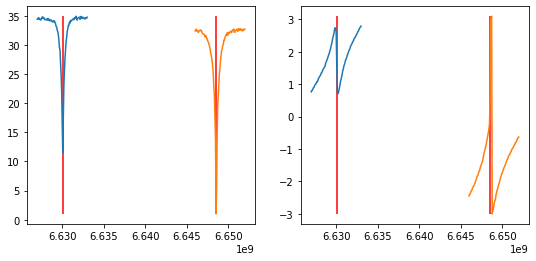

In [40]:
q_target = q1
freq = np.linspace(4,8,1001)*1e9 + 20e6
tag = q_target.q_name
# await measure.attinst['com8'].set_att(38)
await mrw.jpa_switch(measure,state='ON')
# await psg_pump.setValue('Output','OFF')
# await dc15.DC(jpa.bias)
f_lo, delta, n, f_res,base,f_s21, s_s21 = await mrw.again(q_target,measure,False,measure.f_lo)
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,4))
axes[0].plot(f_s21,20*np.log10(np.abs(s_s21)))
axes[0].vlines(f_lo-delta,np.max(20*np.log10(np.abs(s_s21))),np.min(20*np.log10(np.abs(s_s21))),'r')
axes[1].vlines(f_lo-delta,np.max(np.angle(s_s21)),np.min(np.angle(s_s21)),'r')
axes[1].plot(f_s21,np.angle(s_s21))
plt.show()

In [208]:
q4.envelopename

['gaussian', 2]

Output()

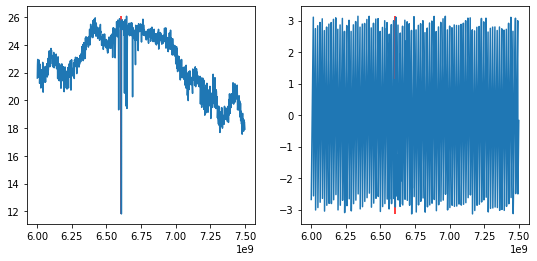

In [128]:
q_target = q1
freq = np.linspace(6,7.5,1001)*1e9 + 50e6
tag = q_target.q_name
# await measure.attinst['com8'].set_att(38)
await mrw.jpa_switch(measure,state='OFF')
# await psg_pump.setValue('Output','OFF')
await dc15.DC(-1.397)
f_lo, delta, n, f_res,base,f_s21, s_s21 = await mrw.again(q_target,measure,False,measure.f_lo,freq)
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,4))
axes[0].plot(f_s21,20*np.log10(np.abs(s_s21)))
axes[0].vlines(f_lo-delta,np.max(20*np.log10(np.abs(s_s21))),np.min(20*np.log10(np.abs(s_s21))),'r')
axes[1].vlines(f_lo-delta,np.max(np.angle(s_s21)),np.min(np.angle(s_s21)),'r')
axes[1].plot(f_s21,np.angle(s_s21))
plt.show()

In [175]:
f_lo-measure.delta

array([6.70905e+09])

# 读取信号强度随时间变化

Output()

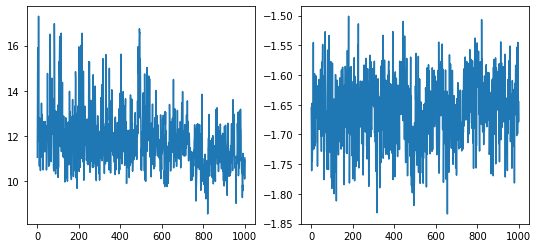

In [28]:
# await measure.attinst['com8'].set_att(20)
await psg_lo.setValue('Output','ON')
# await psg['psg_trans'].setValue('Output','ON')
#await psg[q_target.inst['ex_lo']].setValue('Frequency',f_rabi)
# await mr.jpa_switch(measure,state='OFF')
job = Job(mr.test, (measure,1001), tags=['time varing of signal'], max=1001)
f_s21, s_s21 = await job.done()
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,4))
axes[0].plot(f_s21,np.abs(s_s21))
axes[1].plot(f_s21,np.angle(s_s21))
plt.show()

In [96]:
np.mean(np.abs(s_s21))/np.std(s_s21)

10.166608793708301

In [15]:
%matplotlib notebook

# S21vsFlux

In [ ]:
bits = [q1,q2,q3,q4,q5,q6,q7,q8,q9,q10]
current = np.linspace(-1,1,21)
# measure.readamp = [0.03]*10
# measure.ringup = [150]*10
# measure.ringupamp = [0.1]*10
# await measure.attinst['com8'].set_att(25)
for i in bits:
    tag = i.q_name
    print(i.inst)
    await mrw.jpa_switch(measure,'ON')
    await psg[i.inst['ex_lo']].setValue('Output','OFF')
    job = Job(mrw.S21vsFlux_awgoffset, (i,measure,current,None), tags=[tag], max=len(current))
    v_bias, f_bias, s_bias = await job.done()
    await cww.InitInst(measure,psgdc=True,awgch=True,clearwaveseq=None)
    clear_output()

{'z_awg': 'awg132', 'z_ch': [5], 'ex_awg': 'awg134', 'ex_ch': [3, 7], 'ex_lo': 'psg_ex1', 'com': 'com3'}


Output()

In [30]:
q3.inst

{'z_awg': 'awg132',
 'z_ch': [5],
 'ex_awg': 'awg134',
 'ex_ch': [3, 7],
 'ex_lo': 'psg_ex1',
 'com': 'com3'}

In [242]:
bits = [q1]
current = np.linspace(-2,2,21)
measure.readamp = [0.1]*10
measure.ringup = [0]*10
measure.ringupamp = [0.1]*10
# await measure.attinst['com8'].set_att(25)
for i in bits:
    tag = i.q_name
    print(i.inst)
    await mrw.jpa_switch(measure,'ON')
    await psg[i.inst['ex_lo']].setValue('Output','OFF')
    job = Job(mrw.S21vsFlux, (i,measure,current,None), tags=[tag], max=len(current))
    v_bias, f_bias, s_bias = await job.done()
    await cww.InitInst(measure,psgdc=True,awgch=True,clearwaveseq=None)
    clear_output()

# S21vsPower

In [21]:
measure.readamp = [0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4]
measure.ringup = [0,0,0,0,0,0,0,0,0,100]
measure.ringupamp = [0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8]

Output()

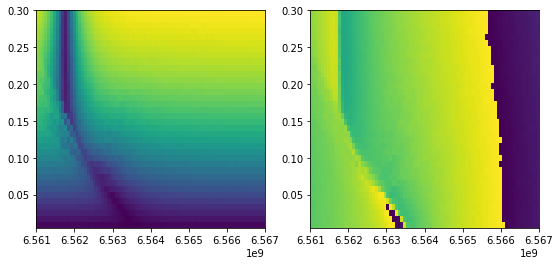

In [235]:
q_target, att = q2, np.linspace(0.005,0.3,36)
tag = q_target.q_name
# await mrw.jpa_switch(measure,'ON')
job = Job(mrw.S21vsPower, (q_target,measure,att,'com8'), tags=[tag], max=len(att))
att_p, f_p, s_p = await job.done()
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,4))
extent = [np.min(f_p[0][:,0]),np.max(f_p[0][:,0]),np.min(att_p[:,0]),np.max(att_p[:,0])]
axes[0].imshow(np.abs(s_p[:,:,0]),extent=extent,origin='lower',aspect='auto')
axes[1].imshow(np.angle(s_p[:,:,0]),extent=extent,origin='lower',aspect='auto')
plt.show()

# singlespce

In [15]:
for i in range(10):
    measure.qubits[f'q{i+1}'].offset = 0

In [552]:
dt.specshift(q1.specfuncz,4.25,bias=-0.8,side='lower')

(3.4570267189202823, -1.3974224486736777)

In [85]:
q = q1
fc = 4.3478
dtl.vTophi(q.specfuncz,q.T_bias,fc,'lower')

-1.151259621088269

In [135]:
dtl.biasshift(q8.specfuncz,5.309,-(5.309-4.3),'lower')

-0.26352128077606624

In [195]:
w01 = [4.454, 5.457, 4.688, 5.018, 4.52 , 5.329, 4.945, 5.554, 5.185,4.82 ]
q = q10
index = eval(q.q_name[1:])-1
dt.biasshift(q.specfuncz,w01[index],(2-w01[index]),'lower')

-0.42805683188138394

In [39]:
q_target = q1
dcstate = {}
dcstate = {i: round(measure.qubits[i].T_bias[1]+measure.qubits[i].T_bias[0]/2,3) for i in measure.qubits}
dcstate['q1'] = -1.125    #-1.901
dcstate['q2'] = -0.285
dcstate['q3'] = -0.433
dcstate['q4'] = -0.02
dcstate['q5'] = -0.39
dcstate['q6'] = 0.233
dcstate['q7'] = -0.645
dcstate['q8'] = -0.818
dcstate['q9'] = -0.503
dcstate['q10'] = -0.671

# dcstate['q1'] = -1.172
# dcstate['q2'] = -0.7
# dcstate['q3'] = -0.565
# dcstate['q4'] = -0.445
# dcstate['q5'] = -0.541
# dcstate['q6'] = -0.474
# dcstate['q7'] = -0.89
# dcstate['q8'] = -1.411
# dcstate['q9'] = -0.83
# dcstate['q10'] = -0.798
measure.readamp = [0.06,0.03,0.058,0.05,0.05,0.04,0.049,0.035,0.035,0.04][4:]
measure.ringup = [100,100,100,100,100,100,100,100,100,200][4:]
measure.ringupamp = [0.1]*10
# measure.readamp = [0.03]*10
# measure.ringup = [100]*10
# measure.ringupamp = [0.1]*10
await mrw.dcManage(measure,dcstate=dcstate,readstate=['q5','q6'],calimatrix=None)

task = await mrw.executeZwave(measure,cww.zWave,dcstate={},offset=0,qnum=10,output=True,during=0/1e9,shift=0e-9)
await mrw.concurrence(task)


In [1]:
len({'1':1,'2':2})

2

In [131]:
q8.volt

-0.35962

In [80]:
q10.offset = -q10.volt

In [521]:
q_target = q6
dt.biasshift(q_target.specfuncz,q_target.f_ex/1e9,(ftarget/1e9-q_target.f_ex/1e9),'lower')

-0.4764107330933782

Output()

[(4.521512960611879, 2.0466950389927385), (5.329638593928257, 4.45058942151841)]


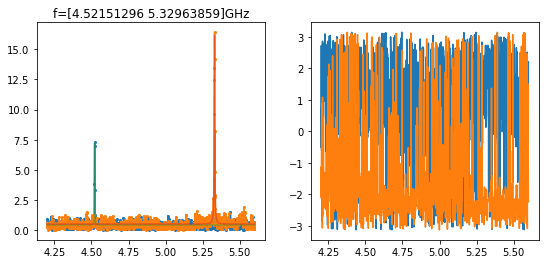

In [119]:
# tag, freq = q_target.q_name, np.arange(-200,201,1)*1e6+round(f_com,3)*1e9
freq = np.arange(4.2,5.6,0.001)*1e9
await psg_trans.setValue('Power',3)
# await measure.attinst['com9'].set_att(30)
# await cw.modulation_ex(q_target,measure)
await mrw.jpa_switch(measure,'ON')
job = Job(mrw.singlespec, (measure,freq,True,measure.f_lo,True,['q1']), tags=(measure.qubitToread), max=len(freq))
f_ss, s_ss = await job.done()
state = await cww.QueryInst(measure)
index = np.abs(s_ss).argmax(axis=0)
x,y,z,band, peak= f_ss/1e9, s_ss,[],[], []
f_rabi = np.array([x[:,i][j] for i, j in enumerate(index)])
for i in range(np.shape(s_ss)[1]):
    res,func, e = op.Lorentz_Fit().fitLorentz(x[:,i],np.abs(y[:,i]))
#     index, prominences, widths = op.RowToRipe().findPeaks(np.abs(y[:,i]))
    a,b,c,d = res.x
    z.append(a/(1.0+c*(x[:,i]-b)**2)+d)
    band.append((b,e))
#     peak.append([x[:,i][index],np.abs(y[:,i])[index]])
z = np.array(z).T

fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,4))
axes[0].plot(x,np.abs(y),'-o',markersize=2)
axes[0].plot(x,z,alpha=0.5)
# axes[0].plot(np.array(peak)[:,0],np.array(peak)[:,1],'-o',alpha=0.5)
axes[0].set_title(f'f={np.array(band)[:,0]}GHz')
print(band)
axes[1].plot(x,np.angle(y))
plt.show()

In [74]:
q10.replace(f_ex=4.347e9,state=[state,measure.delta,measure.base,measure.readlen])

In [58]:
f_rabi

array([4.454, 5.455, 4.691, 5.017, 4.522, 5.329, 4.947, 5.554, 5.185,
       4.82 ])

In [120]:
q5.f_ex

4521090215.548308

In [69]:
q2.replace(f_ex=5.45e9,state=[state,measure.delta,measure.base,measure.readlen])
# q3.replace(f_ex=4.886e9,state=[state,measure.delta,measure.base,measure.readlen])
# q4.replace(f_ex=5.013e9,state=[state,measure.delta,measure.base,measure.readlen])
# q5.replace(f_ex=4.525e9,state=[state,measure.delta,measure.base,measure.readlen])
# q6.replace(f_ex=5.329e9,state=[state,measure.delta,measure.base,measure.readlen])
# q7.replace(f_ex=4.921e9,state=[state,measure.delta,measure.base,measure.readlen])
# q8.replace(f_ex=5.548e9,state=[state,measure.delta,measure.base,measure.readlen])
# q9.replace(f_ex=5.191e9,state=[state,measure.delta,measure.base,measure.readlen])
# q10.replace(f_ex=4.819e9,state=[state,measure.delta,measure.base,measure.readlen])

In [16]:
q1.replace(f_ex=4.455e9,state=[state,measure.delta,measure.base,measure.readlen])
q2.replace(f_ex=5.457e9,state=[state,measure.delta,measure.base,measure.readlen])
q3.replace(f_ex=4.688e9,state=[state,measure.delta,measure.base,measure.readlen])
q4.replace(f_ex=5.019e9,state=[state,measure.delta,measure.base,measure.readlen])
q5.replace(f_ex=4.52e9,state=[state,measure.delta,measure.base,measure.readlen])
q6.replace(f_ex=5.331e9,state=[state,measure.delta,measure.base,measure.readlen])
q7.replace(f_ex=4.944e9,state=[state,measure.delta,measure.base,measure.readlen])
q8.replace(f_ex=5.555e9,state=[state,measure.delta,measure.base,measure.readlen])
q9.replace(f_ex=5.186e9,state=[state,measure.delta,measure.base,measure.readlen])
q10.replace(f_ex=4.82e9,state=[state,measure.delta,measure.base,measure.readlen])

In [704]:
q10.f_ex = 4820884297.520661

In [699]:
q10.f_ex = q10.f_ex - q10.alpha/2

In [290]:
q1.offset = -0.4329363
q2.offset = -0.00220739
q3.offset = -0.00191775
q4.offset = -0.00212259
q5.offset = -0.00189057
q6.offset = -0.00221035
q7.offset = 0.00195718
q8.offset = 0.00200638
q9.offset = 0.00177501
q10.offset = -0.0017874

In [56]:
q_target = q10
await mrw.dcManage(measure,dcstate={},readstate=[q_target.q_name],calimatrix=None)
await cww.RecoverInst(measure,state=q_target.state[0])

In [210]:
q2.inst

{'z_awg': 'awg132',
 'z_ch': [2],
 'ex_awg': 'awg131',
 'ex_ch': [2, 6],
 'ex_lo': 'psg_ex1',
 'com': 'com3'}

In [53]:

q2.volt = -0.249606
q3.volt = -0.07998
q4.volt = -0.2735
q5.volt = -0.0464
q6.volt = -0.47641073
q7.volt = -0.18375
q8.volt = -0.36065573
q9.volt = -0.25029
q10.volt = -0.1055

In [98]:
for i in range(10):
    measure.qubits[f'q{i+1}'].offset = 0

In [125]:
q3.replace(f_ex=4.347e9,state=[state,measure.delta,measure.base,measure.readlen])

In [240]:
measure.qubits['q5'].f_ex

5018998217.821782

In [270]:
(4.869-4.766)*2

0.20599999999999952

In [303]:
q3.replace(f_ex=5.343e9,state=[state,measure.delta,measure.base,measure.readlen])
q4.replace(f_ex=4.752e9,state=[state,measure.delta,measure.base,measure.readlen])
# pd.DataFrame(state)

## 单条谱扫电压

Output()

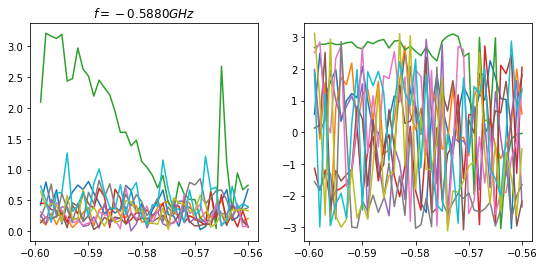

In [300]:
tag, ftarget, biaslist = 'q3', 4.3469e9, np.arange(-0.02,0.02,0.001) + (-0.579)
num = eval(tag[1:])
# await psg_trans.setValue('Power',13)
# mr.Att_Setup(measure,'com8').Att(28)
# await cw.modulation_ex(q_target,measure)
# # await psg_ex1.setValue('Moutput','OFF')
# await mr.jpa_switch(measure,'ON')
job = Job(mrw.specbias, (measure.qubits[tag],measure,ftarget,biaslist,True), tags=[tag], max=len(biaslist))
v_sb, s_sb = await job.done()
index = np.abs(s_sb).argmax(axis=0)
v_rabi = np.array([v_sb[:,i][j] for i, j in enumerate(index)])
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,4))
axes[0].plot(v_sb,np.abs(s_sb))
axes[0].set_title('$f=%.4fGHz$'%(v_rabi[num]))
axes[1].plot(v_sb,np.angle(s_sb))
plt.show()

## 扫awg

In [32]:
dcstate = {}
# dcstate = {i: round(measure.qubits[i].T_bias[1]+measure.qubits[i].T_bias[0]/2,3) for i in measure.qubits}
dcstate['q1'] = -1.125
dcstate['q2'] = -0.285
dcstate['q3'] = -0.433
dcstate['q4'] = -0.02
dcstate['q5'] = -0.39
dcstate['q6'] = 0.233
dcstate['q7'] = -0.645
dcstate['q8'] = -0.818
dcstate['q9'] = -0.503
dcstate['q10'] = -0.671

In [108]:
mat = calimatrix
ftarget = 4.9e9
bits = [q7]
for i in bits:
    q_target = i
    v_target = dtl.biasshift(q_target.specfuncz,q_target.f_ex/1e9,(ftarget/1e9-q_target.f_ex/1e9),'lower')
    q_target.volt = v_target
    biaslist = np.arange(-0.005,0.005,0.0005) + q_target.volt
    flux = {f'q{i+1}':0 for i in range(10)}
    
    await mrw.dcManage(measure,dcstate=dcstate,readstate=[q_target.q_name],calimatrix=calimatrix)
#     flux = {i:(measure.qubits[i].volt-0.3) for i in measure.qubits}
    
    processlist = [mrw.specbias_awg]
    para1 = {'qubit':q_target,'ftarget':ftarget,'bias':biaslist,'dcstate':flux,'calimatrix':mat,'modulation':True}
    paraslist = [para1]
    maxlist = [len(para1['bias'])]
    avg = [False]
    update_state = [False]
    whichexe = [0]
    await mrw.dispatcher(measure,whichexe,processlist,paraslist,tags=[q_target.q_name],\
                         maxlist=maxlist,avg=avg,update_state=update_state)

In [90]:
q3.volt,q5.volt,q7.volt,q9.volt

(-0.08133494941021072,
 -0.04839224636570971,
 -0.1745636767886221,
 -0.2524122597589169)

In [15]:
q3.volt,q5.volt,q7.volt,q9.volt=-0.08133494941021072,-0.04839224636570971,-0.1745636767886221,-0.2524122597589169

In [110]:
q6.volt

-0.4779939142119326

In [124]:
volt_op = {'q1': -0.030844221656448734,
 'q2': -0.2492931439709256,
 'q3': -0.08040318545913933,
 'q4': -0.2761660957344011,
 'q5': -0.04617467223212374,
 'q6': -0.4779939142119326,
 'q7': -0.18381671647514858,
 'q8': -0.3616781390141442,
 'q9': -0.2502983712419309,
 'q10': -0.10576723239632263}
for i in measure.qubits:
    measure.qubits[i].volt = volt_op[i] 

In [44]:
volt_op = {}
for i in measure.qubits:
    volt_op[i] = measure.qubits[i].volt
volt_op

{'q1': -0.030844221656448734,
 'q2': -0.2492931439709256,
 'q3': -0.08040318545913933,
 'q4': -0.2761660957344011,
 'q5': -0.04617467223212374,
 'q6': -0.4779939142119326,
 'q7': -0.18381671647514858,
 'q8': -0.3616781390141442,
 'q9': -0.2502983712419309,
 'q10': -0.10576723239632263}

In [135]:
volt_op
for i in measure.qubits:
    volt_op[i] = measure.qubits[i].volt
volt_op

{'q1': -0.0308442,
 'q2': -0.24930775971091107,
 'q3': -0.07985155153064334,
 'q4': -0.27308824090293216,
 'q5': -0.046079852474836314,
 'q6': -0.4757874885915559,
 'q7': -0.18310283668923083,
 'q8': -0.3599437744321241,
 'q9': -0.24996067985225573,
 'q10': -0.10493645059112588}

In [33]:
q9.offset

0

# 调度器

In [132]:
q = q10
fc = 4.4
dt.vTophi(q.specfuncz,q.T_bias,fc,'lower')

-0.7885311371928135

In [45]:
q2.T_bias

[2.6851195682224915, 0.16630472254988332]

## first

In [16]:
bits = [q1,q2,q3,q4,q5,q6,q7,q8,q9,q10]
# flux = [-1.128,-0.664,-0.547,-0.43,-0.435,-0.441,-0.875,-1.381,-0.891,-0.789]
fc = 4.55
measure.readamp = [0.03]*10
measure.ringup = [100]*10
measure.ringupamp = [0.1]*10
await psg_ex1.setValue('Moutput','OFF')
for i, j in enumerate(bits,start=0):
    dcstate = {}
    dcstate = {i: round(measure.qubits[i].T_bias[1]+measure.qubits[i].T_bias[0]/2,3) for i in measure.qubits}
    await mrw.jpa_switch(measure,state='ON')
    q_target = j
    
    q_target.replace(envelopename=['gaussian',1],nwave=1,amp=1,amp2=1,shift=0e-9,phase=0,phaseDiff=0,delta_ex=100e6,pi_len=50e-9,\
         pi_len2=20e-9,seqtype='PDD',detune=2e6,DRAGScaling=None)
    q_target.timing={'read>xy':100e-9,'z>xy':0e-9}
    
    dcstate[q_target.q_name] = dtl.vTophi(q_target.specfuncz,q_target.T_bias,fc,'lower')
    await mrw.dcManage(measure,dcstate=dcstate,readstate=[q_target.q_name],calimatrix=None)
    task = await mrw.executeZwave(measure,cww.zWave,dcstate={},qnum=10,output=True,offset=0,during=0/1e9,shift=0e-9)
    await mrw.concurrence(task)
    await psg_trans.setValue('Power',4)
    
    processlist = [mrw.singlespec,mrw.rabi_seq,mrw.Ramsey_seq,mrw.singleZpulse]
    para1 = {'freq':np.arange(-200,200,2)*1e6+fc*1e9,'modulation':True,'f_read':measure.f_lo,'readponit':True,'exstate':[q_target.q_name]}
    para2 = {'amp':np.linspace(0,1,121),'arg':'amp','exstate':[q_target.q_name],'comwave':True,'readseq':True}
    para3 = {'t_Ramsey':np.linspace(0,5000,101),'exstate':[q_target.q_name],'comwave':True,'readseq':False}
    para4 = {'t_shift':np.linspace(2900,3100,121),'exstate':[q_target.q_name],'comwave':True,'updatez':True,'readseq':True}
    #1-8的位置是3150-3400，9-10是2900-3100
    paraslist = [para1,para2,para3,para4]
    maxlist = [len(para1['freq']),300,300,300]
    avg = [False,True,True,False]
    update_state = [True,True,False,False]

    whichexe = [0,1,3]
    await mrw.dispatcher(measure,whichexe,processlist,paraslist,tags=[q_target.q_name],\
                         maxlist=maxlist,avg=avg,update_state=update_state)
    await cww.InitInst(measure,psgdc=True,awgch=True,clearwaveseq=[])
    clear_output()
await psg_ex1.setValue('Moutput','ON')

In [17]:
qstate = []
def tuple2dict(q):
    for i in q:
        qstate.append(i.asdict())
    return qstate

bit = [q1,q2,q3,q4,q5,q6,q7,q8,q9,q10]
filepath = save('QubitState','qubitstate',state = tuple2dict(bit),base_path=r'D:\skzhao\file_name\wave')
with open(r'D:\skzhao\file_name\qubit_state_wave.txt', mode='a') as filename:
    filename.write(str(filepath))
    filename.write('\n')
print(filepath)

D:\skzhao\file_name\wave\2021\0324\QubitState_20210324213710.npz


In [20]:
q3.inst

{'z_awg': 'awg132',
 'z_ch': [5],
 'ex_awg': 'awg134',
 'ex_ch': [3, 7],
 'ex_lo': 'psg_ex1',
 'com': 'com3'}

## second

In [256]:
measure.qubits['q9'].timing['read>xy'] = 100e-9

In [30]:
for i in range(10):
    measure.qubits[f'q{i+1}'].timing['read>xy'] = 100e-9

In [18]:
bits = [q1,q2,q3,q4,q5,q6,q7,q8,q9,q10]
measure.readamp = [0.03]*10
measure.ringup = [100]*10
measure.ringupamp = [0.1]*10
await psg_ex1.setValue('Moutput','OFF')
await psg_trans.setValue('Power',3)
for i, j in enumerate(bits,start=0):
    if i+1>=len(bits):
        break
    dcstate = {i: round(measure.qubits[i].T_bias[1]+measure.qubits[i].T_bias[0]/2,3) for i in measure.qubits}
    await mrw.jpa_switch(measure,state='ON')
    q_target = j
    q_bias = bits[i+1]
    flux1 = dtl.vTophi(q_target.specfuncz,q_target.T_bias,4.45,'lower')
    flux2 = dtl.vTophi(q_bias.specfuncz,q_bias.T_bias,4.95,'lower')
    dcstate[q_target.q_name] = flux1
    dcstate[q_bias.q_name] = flux2
    
    q_target.replace(envelopename=['gaussian',1],nwave=1,amp=1,amp2=1,shift=0e-9,phase=0,phaseDiff=0,delta_ex=-100e6,pi_len=40e-9,\
         pi_len2=20e-9,seqtype='PDD',detune=2e6,DRAGScaling=None)
    
    await mrw.dcManage(measure,dcstate=dcstate,readstate=[q_target.q_name,q_bias.q_name],calimatrix=calimatrix)
    task = await mrw.executeZwave(measure,cww.zWave,dcstate={},qnum=10,output=True,during=0/1e9,shift=3000e-9)
    await mrw.concurrence(task)
    
    processlist = [mrw.singlespec,mrw.rabi_seq,mrw.Ramsey_seq,mrw.qqTiming]
    para1 = {'freq':np.arange(4.2,5.1,0.002)*1e9,'modulation':True,'f_read':measure.f_lo,'readponit':True,'exstate':[q_target.q_name]}
    para2 = {'amp':np.linspace(0,1,121),'arg':'amp','exstate':[q_target.q_name],'comwave':True,'readseq':True}
    para3 = {'t_Ramsey':np.linspace(0,5000,101),'exstate':[q_target.q_name],'comwave':True,'readseq':False}
    para4 = {'v_rabi':np.linspace(920,1080,121),'exstate':[q_target.q_name],'dcstate':[q_bias.q_name],'comwave':True}
    paraslist = [para1,para2,para3,para4]
    maxlist = [len(para1['freq']),300,300,300]
    avg = [False,True,True,True]
    update_state = [False,True,False,False]

    whichexe = [0,1,3]
    await mrw.dispatcher(measure,whichexe,processlist,paraslist,tags=[q_target.q_name,q_bias.q_name],\
                         maxlist=maxlist,avg=avg,update_state=update_state)
    await cww.InitInst(measure,psgdc=True,awgch=True,clearwaveseq=[])
    clear_output()
await psg_ex1.setValue('Moutput','ON')
timing = {measure.qubits[i].q_name:measure.qubits[i].timing for i in measure.qubits}
timing

{'q1': {'read>xy': 1e-07, 'z>xy': 6.561234510299528e-09},
 'q2': {'read>xy': 6.643539814935434e-08, 'z>xy': -2.69394618054248e-08},
 'q3': {'read>xy': 9.815197381708742e-08, 'z>xy': 7.659266964956715e-09},
 'q4': {'read>xy': 8.959790906514877e-08, 'z>xy': -9.57041999539797e-10},
 'q5': {'read>xy': 9.753833332209841e-08, 'z>xy': 6.819418030745511e-09},
 'q6': {'read>xy': 6.894913359552765e-08, 'z>xy': -2.162336960964558e-08},
 'q7': {'read>xy': 7.104832892830745e-08, 'z>xy': -1.995719225656194e-08},
 'q8': {'read>xy': 9.001111888551338e-08, 'z>xy': -8.88556313982008e-10},
 'q9': {'read>xy': 9.106802623564272e-08, 'z>xy': 1.9965183123636055e-08},
 'q10': {'read>xy': 9.960443541054314e-08, 'z>xy': 2.860674356327036e-08}}

In [21]:
q2.timing['read>xy']

1e-07

In [19]:
timing = {measure.qubits[i].q_name:measure.qubits[i].timing for i in measure.qubits}
timing

{'q1': {'read>xy': 1e-07, 'z>xy': 6.561234510299528e-09},
 'q2': {'read>xy': 6.643539814935434e-08, 'z>xy': -2.69394618054248e-08},
 'q3': {'read>xy': 9.815197381708742e-08, 'z>xy': 7.659266964956715e-09},
 'q4': {'read>xy': 8.959790906514877e-08, 'z>xy': -9.57041999539797e-10},
 'q5': {'read>xy': 9.753833332209841e-08, 'z>xy': 6.819418030745511e-09},
 'q6': {'read>xy': 6.894913359552765e-08, 'z>xy': -2.162336960964558e-08},
 'q7': {'read>xy': 7.104832892830745e-08, 'z>xy': -1.995719225656194e-08},
 'q8': {'read>xy': 9.001111888551338e-08, 'z>xy': -8.88556313982008e-10},
 'q9': {'read>xy': 9.106802623564272e-08, 'z>xy': 1.9965183123636055e-08},
 'q10': {'read>xy': 9.960443541054314e-08, 'z>xy': 2.860674356327036e-08}}

In [20]:
qstate = []
def tuple2dict(q):
    for i in q:
        qstate.append(i.asdict())
    return qstate

bit = [q1,q2,q3,q4,q5,q6,q7,q8,q9,q10]
filepath = save('QubitState','qubitstate',state = tuple2dict(bit),base_path=r'D:\skzhao\file_name\wave')
with open(r'D:\skzhao\file_name\qubit_state_wave.txt', mode='a') as filename:
    filename.write(str(filepath))
    filename.write('\n')
print(filepath)

D:\skzhao\file_name\wave\2021\0324\QubitState_20210324225420.npz


## Third 二维T1

In [72]:
bits = [q5,q6]
# measure.readamp = [0.03]*10
# measure.ringup = [100]*10
# measure.ringupamp = [0.1]*10
# await psg_trans.setValue('Power',3)
for i, j in enumerate(bits,start=0):
    if i+1>=len(bits):
        break
#     dcstate = {i: round(measure.qubits[i].T_bias[1]+measure.qubits[i].T_bias[0]/2,3) for i in measure.qubits}
#     await mrw.jpa_switch(measure,state='ON')
    q_target = j
    q_bias = bits[i+1]
#     flux1 = dtl.vTophi(q_target.specfuncz,q_target.T_bias,4.6,'lower')
#     flux2 = dtl.vTophi(q_bias.specfuncz,q_bias.T_bias,4.9,'lower')
#     dcstate[q_target.q_name] = flux1
#     dcstate[q_bias.q_name] = flux2
    
#     q_target.replace(envelopename=['gaussian',1],nwave=1,amp=1,amp2=1,shift=0e-9,phase=0,phaseDiff=0,delta_ex=-100e6,pi_len=50e-9,\
#          pi_len2=20e-9,seqtype='PDD',detune=2e6,DRAGScaling=None)
    
#     await mrw.dcManage(measure,dcstate=dcstate,readstate=[q_target.q_name,q_bias.q_name],calimatrix=calimatrix)
#     task = await mrw.executeZwave(measure,cww.zWave,dcstate={},qnum=10,output=True,during=0/1e9,shift=3000e-9)
#     await mrw.concurrence(task)
    
    processlist = [mrw.singlespec,mrw.rabi_seq,mrw.T1_2d_coupling_auto]
    para1 = {'freq':np.arange(4.4,5.1,0.002)*1e9,'modulation':True,'f_read':measure.f_lo,'readponit':True,'exstate':[q_target.q_name]}
    para2 = {'amp':np.linspace(0,1,121),'arg':'amp','exstate':[q_target.q_name],'comwave':True,'readseq':True}
    para5 = {'t_rabi':np.linspace(0,200,125),'v_rabi':None,'mode':'vbroadcast',\
             'dcstate':[q_target.q_name],'exstate':[q_bias.q_name],'ftarget':4.75e9}
    paraslist = [para1,para2,para5]
    maxlist = [len(para1['freq']),300,21]
    avg = [False,True,False]
    update_state = [False,True,False]

    whichexe = [2]
    await mrw.dispatcher(measure,whichexe,processlist,paraslist,tags=[q_target.q_name,q_bias.q_name],\
                         maxlist=maxlist,avg=avg,update_state=update_state)
    await cww.InitInst(measure,psgdc=True,awgch=True,clearwaveseq=[])
    clear_output()

Output()

AttributeError: 'NoneType' object has no attribute 'keys'

In [79]:
q5.volt = 0.07390652281121662
q6.volt = -0.366398

## 次近邻

In [164]:
bits = [q4,q6]
# v_r = [np.linspace(-0.077,-0.071,41),np.linspace(-0.083,-0.076,41)]
v_r = [(np.linspace(-0.003,0.003,31)-0.0914)]*10
measure.readamp = [0.03]*10
measure.ringup = [100]*10
measure.ringupamp = [0.1]*10
await psg_trans.setValue('Power',3)
count = 0
await psg_ex1.setValue('Moutput','OFF')
for i, j in enumerate(bits,start=0):
    if i+1>=len(bits):
        break
    dcstate = {i: round(measure.qubits[i].T_bias[1]+measure.qubits[i].T_bias[0]/2,3) for i in measure.qubits}
    await mrw.jpa_switch(measure,state='ON')
    q_target = j
    q_bias = bits[i+1]
    row,col = eval(q_target.q_name[1:])-1, eval(q_bias.q_name[1:])
#     caliM = calimatrix[row:col,row:col]
    caliM = calimatrix[row::2,row::2][0:2,0:2]
    flux1 = dtl.vTophi(q_target.specfuncz,q_target.T_bias,4.65,'lower')
    flux2 = dtl.vTophi(q_bias.specfuncz,q_bias.T_bias,4.347,'lower')
    dcstate[q_target.q_name] = flux1
    dcstate[q_bias.q_name] = flux2
    
#     q_target.replace(envelopename=['gaussian',1],nwave=1,amp=1,amp2=1,shift=0e-9,phase=0,phaseDiff=0,delta_ex=-100e6,pi_len=60e-9,\
#          pi_len2=20e-9,seqtype='PDD',detune=2e6,DRAGScaling=None)
    
    await mrw.dcManage(measure,dcstate=dcstate,readstate=[q_target.q_name,q_bias.q_name],calimatrix=calimatrix)
    task = await mrw.executeZwave(measure,cww.zWave,dcstate={},offset=0,qnum=10,output=True,during=0/1e9,shift=0e-9)
    await mrw.concurrence(task)
    
    processlist = [mrw.singlespec,mrw.rabi_seq,mrw.T1_2d_coupling]
    para1 = {'freq':np.arange(4.4,5.1,0.002)*1e9,'modulation':True,'f_read':measure.f_lo,'readponit':True,'exstate':[q_target.q_name]}
    para2 = {'amp':np.linspace(0,1,121),'arg':'amp','exstate':[q_target.q_name],'comwave':True,'readseq':True}
    para5 = {'t_rabi':np.linspace(0,2000,125),'v_rabi':v_r[count],'mode':'vbroadcast',\
             'exstate':[q_target.q_name],'dcstate':[q_bias.q_name],'calimatrix':caliM}
    paraslist = [para1,para2,para5]
    maxlist = [len(para1['freq']),300,21]
    avg = [False,True,False]
    update_state = [False,True,False]

    whichexe = [0,1,2]
    await mrw.dispatcher(measure,whichexe,processlist,paraslist,tags=[q_target.q_name,q_bias.q_name],\
                         maxlist=maxlist,avg=avg,update_state=update_state)
    await cww.InitInst(measure,psgdc=True,awgch=True,clearwaveseq=[])
#     clear_output()
    count += 1
await psg_ex1.setValue('Moutput','ON')

Output()

AttributeError: 'NoneType' object has no attribute 'keys'

In [154]:
q4.f_ex

4649999999.999973

# 功率拉比

In [142]:
q1.replace(envelopename=['hanning',1],nwave=1,amp=1,shift=0e-9,phase=0,phaseDiff=0,delta_ex=300e6,pi_len=20e-9,\
         seqtype='PDD',detune=3e6)

In [84]:
q2.timing['read>xy'] = 3400e-9

Output()

(9.27048994640673, 7.497972357039413, 18056.26285332503, 0.9803921568627451, 0)


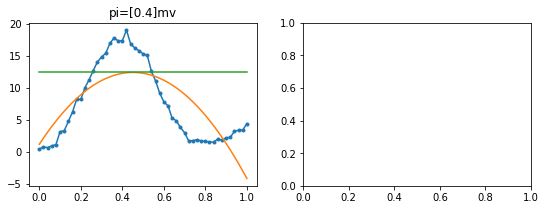

In [64]:
q_target = ['q1']
amp = np.linspace(0,1,51)
await awg100.write('TRIG:SOUR %s'%'INT') 
arg = 'pi_len' if np.max(amp)>1 else 'amp'
job = Job(mrw.rabi, (measure,amp,arg,q_target), tags=q_target, max=len(amp))
v_rp, s_rp = await job.done()
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,3))
t_op = []
for i in range(np.shape(s_rp)[1]):
    x, y = v_rp[:,i], np.abs(s_rp[:,i])
    t_op.append(op.RowToRipe().firstMax(x,y,num=0,peakpercent=0.8))
    A,B,T1,w,phi,out = op.Rabi_Fit(envelopemethod='hilbert',phi=0).fitRabi(np.abs(x),np.abs(y))
    z = A*np.exp(-x/T1)*np.cos(2*np.pi*w*x+phi) + B
    env = A*np.exp(-x/T1) + B
    axes[0].plot(x,y,'-o',markersize=3)
    axes[0].plot(x,z)
    axes[0].plot(x,env)
    axes[0].set_title(f'pi={t_op}mv')
plt.show()

In [63]:
q2.amp = 0.3

## Rabi_seq

In [575]:
q3.replace(envelopename=['hanning',1],nwave=1,amp=1,amp2=1,shift=0e-9,phase=0,phaseDiff=0,delta_ex=300e6,pi_len=30e-9,\
         pi_len2=20e-9,seqtype='PDD',detune=3e6,DRAGScaling=None,timing={'z>xy':0e-9,'read>xy':0e-9})

In [671]:
q10.pi_len = 30e-9

In [69]:
q1.replace(envelopename=['hanning',1],nwave=1,amp=1,amp2=1,shift=0e-9,phase=0,phaseDiff=0,delta_ex=300e6,pi_len=20e-9,\
         pi_len2=20e-9,seqtype='PDD',detune=2e6,DRAGScaling=None)
# q8.replace(envelopename=['gaussian',1],nwave=1,amp=1,amp2=1,shift=0e-9,phase=0,phaseDiff=0,delta_ex=100e6,pi_len=50e-9,\
#          pi_len2=20e-9,seqtype='PDD',detune=2e6,DRAGScaling=None)

In [81]:
bit = [q1,q2,q3,q4,q5,q6,q7,q8,q9,q10]
for j,i in enumerate(bit,start=0):
    i.replace(envelopename=['hanning',2],nwave=1,amp=1,amp2=1,pi_len=35e-9,\
         pi_len2=20e-9,seqtype='PDD',detune=2e6,DRAGScaling=None)
    await cww.RecoverInst(measure,state)
    q_target = [i.q_name]
    amp = np.linspace(0,0.5,101)
    arg = 'amp'
    comwave, readseq, mode = True, True, 'vbroadcast' 
    numrepeat, avg, measure.repeat = (len(amp),False,1000) if mode == 'hbroadcast' else (300,True,len(amp))
    job = Job(mrw.rabi_seq, (measure,amp,arg,q_target,comwave,readseq,mode), tags=q_target, max=numrepeat,avg=avg)
    v_rp, s_rp = await job.done()
    num = eval(q_target[0][1:])-1
#     num = 0
    x, y = v_rp[:,num], np.abs(s_rp[:,num])
    pi = op.RowToRipe().firstMax(x,y,num=0,peakpercent=0.8)
    measure.qubits[q_target[0]].amp = pi
    for q in q_target:
        for ch in measure.qubits[q].inst['ex_ch']:
            await measure.awg[measure.qubits[q].inst['ex_awg']].output_off(ch=ch)
    clear_output()

In [24]:
await cww.RecoverInst(measure,state)

In [69]:
q1.delta_ex = 145238545.45454502

4250000000.0

Output()

(0.701074438119451, 0.6799639101745008, 20000, 2.9702970297029703, 0)
(0.3867940401586598, 0.32440486734508933, 20000, 49.504950495049506, 0)
(0.4353046725715555, 0.3240039163202977, 20000, 6.930693069306931, 0)
(0.533044813427909, 0.5372674813587622, 20000, 15.841584158415841, 0)
(5.78109901621013, 5.565961523070382, 20000, 1.9801980198019802, 0)
(7.6493249481937555, 7.427969589813655, 20000, 0.9900990099009901, 0)
(0.8241064949215631, 0.7206412234771196, 20000, 0.9900990099009901, 0)
(0.4391763516146403, 0.29835030260116896, 20000, 24.752475247524753, 0)
(0.492790945655865, 0.39574999731335603, 20000, 29.7029702970297, 0)
(0.7909654147170501, 0.5594713431943389, 20000, 15.841584158415841, 0)
[0.14, 0.03, 0.98, 0.13, 0.23, 0.47, 0.37, 0.72, 0.26, 0.57] [0.1773227231736996, 0.009908482262293067, 0.044076120624766915, 0.02944712035460358, 0.2369884470511539, 0.49017409311064003, 0.4142634183552328, 0.020116301712376994, 0.016858397870094865, 0.03137242985530894]


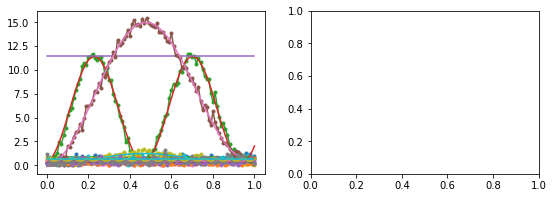

In [37]:
q_target = ['q5','q6']
amp = np.linspace(0,1,101)
arg = 'amp'
comwave, readseq, mode = True, True, 'vbroadcast' 
numrepeat, avg, measure.repeat = (len(amp),False,1000) if mode == 'hbroadcast' else (300,True,len(amp))
job = Job(mrw.rabi_seq, (measure,amp,arg,q_target,comwave,readseq,mode), tags=q_target, max=numrepeat,avg=avg)
v_rp, s_rp = await job.done()
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,3))
t_op, t_fit = [], []
for i in range(np.shape(s_rp)[1]):
    x, y = v_rp[:,i], np.abs(s_rp[:,i])
    t_op.append(op.RowToRipe().firstMax(x,y,num=0,peakpercent=0.8))
    A,B,T1,w,phi,out = op.Rabi_Fit(envelopemethod='hilbert',phi=0).fitRabi(np.abs(x),np.abs(y))
    t_fit.append(1/w/2)
    z = A*np.exp(-x/T1)*np.cos(2*np.pi*w*x+phi) + B
    env = A*np.exp(-x/T1) + B
    axes[0].plot(x,y,'-o',markersize=3)
    axes[0].plot(x,z)
    axes[0].plot(x,env)
#     axes[0].set_title(f't_op={t_op}mv,pi={t_fit}mv')
print(t_op,t_fit)
plt.show()

In [45]:
q5.amp=0.23039
q6.amp=0.48173

In [55]:
q10.replace(envelopename=['hanning',2],nwave=1,amp=1,amp2=1,shift=200e-9,phase=0,phaseDiff=0,delta_ex=100e6,pi_len=40e-9,\
         pi_len2=20e-9,seqtype='PDD',detune=2e6,DRAGScaling=None)
# q8.replace(envelopename=['gaussian',1],nwave=1,amp=1,amp2=1,shift=0e-9,phase=0,phaseDiff=0,delta_ex=100e6,pi_len=50e-9,\
#          pi_len2=20e-9,seqtype='PDD',detune=2e6,DRAGScaling=None)

In [69]:
q10.inst['ex_ch'] = [3,7]

In [24]:
q_target = ['q3']
amp = np.linspace(0,1,101)
arg = 'amp'
delta_ex = np.linspace(-300,300,61)*1e6
comwave, readseq, mode = True, True, 'vbroadcast' 
numrepeat, avg, measure.repeat = (len(amp),False,1000) if mode == 'hbroadcast' else (300,True,len(amp))
s = []
for i in delta_ex:
    measure.qubits[q_target[0]].delta_ex = i
    job = Job(mrw.rabi_seq, (measure,amp,arg,q_target,comwave,readseq,mode), tags=q_target, max=numrepeat,avg=avg,auto_save=False)
    v_rp, s_rp = await job.done()
    s.append(s_rp)

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

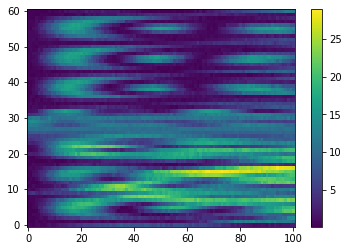

In [25]:
plt.figure()
plt.imshow(np.abs(s)[:,:,2],aspect='auto',origin='lower')
plt.colorbar()

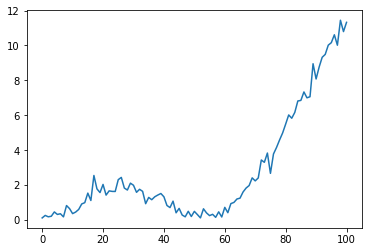

In [23]:
plt.figure()
plt.plot(np.abs(s)[1,:,2])

In [32]:
freq = np.linspace(4.1,5.2,51)
measure.readamp = [0.03]*10
measure.ringup = [100]*10
measure.ringupamp = [0.1]*10
await psg_ex1.setValue('Moutput','OFF')
S = []
for i, fc in enumerate(freq,start=0):
    dcstate = {}
    dcstate = {i: round(measure.qubits[i].T_bias[1]+measure.qubits[i].T_bias[0]/2,3) for i in measure.qubits}
    await mrw.jpa_switch(measure,state='ON')
    q_target = q3
    
    q_target.replace(envelopename=['gaussian',1],nwave=1,amp=1,amp2=1,shift=100e-9,phase=0,phaseDiff=0,delta_ex=-110e6,pi_len=30e-9,\
         pi_len2=20e-9,seqtype='PDD',detune=2e6,DRAGScaling=None)
    q_target.timing={'read>xy':100e-9,'z>xy':0e-9}
    
    dcstate[q_target.q_name] = dt.vTophi(q_target.specfuncz,q_target.T_bias,fc,'lower')
    await mrw.dcManage(measure,dcstate=dcstate,readstate=[q_target.q_name],calimatrix=None)
    task = await mrw.executeZwave(measure,cww.zWave,dcstate={},qnum=10,output=True,offset=0,during=0/1e9,shift=0e-9)
    await mrw.concurrence(task)
    await psg_trans.setValue('Power',4)
    
    processlist = [mrw.singlespec,mrw.rabi_seq,mrw.Ramsey_seq,mrw.singleZpulse]
    para1 = {'freq':np.arange(-200,200,2)*1e6+fc*1e9,'modulation':True,'f_read':measure.f_lo,'readponit':True,'exstate':[q_target.q_name]}
    para2 = {'amp':np.linspace(0,1,121),'arg':'amp','exstate':[q_target.q_name],'comwave':True,'readseq':True}
    para3 = {'t_Ramsey':np.linspace(0,5000,101),'exstate':[q_target.q_name],'comwave':True,'readseq':False}
    para4 = {'t_shift':np.linspace(2890,3230,121),'exstate':[q_target.q_name],'comwave':True,'updatez':True,'readseq':True}
    #1-8的位置是3150-3400，9-10是2900-3100
    paraslist = [para1,para2,para3,para4]
    maxlist = [len(para1['freq']),300,300,300]
    avg = [False,True,True,False]
    update_state = [True,True,False,False]

    whichexe = [0,1]
    title, data = await mrw.dispatcher(measure,whichexe,processlist,paraslist,tags=[q_target.q_name],\
                         maxlist=maxlist,avg=avg,update_state=update_state)
    t,s = data
    S.append(s[:,0])
    await cww.InitInst(measure,psgdc=True,awgch=True,clearwaveseq=[])
    clear_output()
await psg_ex1.setValue('Moutput','ON')

Output()

TypeError: 'NoneType' object is not subscriptable

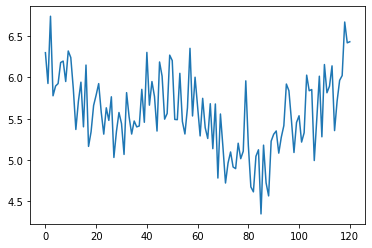

In [38]:
plt.figure()
S = np.abs(S)
plt.plot(S[::2][0])

In [71]:
await psg_ex1.setValue('Moutput','OFF')

In [448]:
q8.pi_len = 20e-9
q8.envelopename=['gaussian',2]

In [37]:
delta_ex = {}
for i in range(10):
    delta_ex[f'q{i+1}']=measure.qubits[f'q{i+1}'].delta_ex
delta_ex

{'q1': 144346268.65671635,
 'q2': 300000000.0,
 'q3': -88653731.34328365,
 'q4': 100000000.0,
 'q5': 78724378.1094532,
 'q6': 300000000.0,
 'q7': -346892537.3134327,
 'q8': -340000000.0,
 'q9': -587524378.1094522,
 'q10': -100000000.0}

In [32]:
delta_ex = {}
for i in range(10):
    delta_ex[f'q{i+1}']=measure.qubits[f'q{i+1}'].delta_ex
delta_ex

{'q1': 142600000.0,
 'q2': 300000000.0,
 'q3': -90400000.0,
 'q4': 100000000.0,
 'q5': 77600000.0,
 'q6': 300000000.0,
 'q7': -346400000.0,
 'q8': -340000000.0,
 'q9': -588400000.0,
 'q10': -100000000.0}

In [71]:
async def exMixing(f):
    if f == {}:
        return 
    qname = [i for i in f]
    f_ex = np.array([f[i] for i in f])
    ex_lo = f_ex.mean() -161e6
    delta =  ex_lo - f_ex
    delta_ex = {qname[i]:delta[i] for i in range(len(qname))}
    # n = len(f_ex)
    return ex_lo, delta_ex
f = {i:measure.qubits[i].f_ex for i in measure.qubits}
del f['q2']
del f['q4']
del f['q6']
del f['q8']
del f['q10']
f_ex, de = await exMixing(f)

In [72]:
for i in de:
    measure.qubits[i].delta_ex = de[i]

In [15]:
delta_ex = {'q1': -130000000.0,
 'q2': 300000000.0,
 'q3': -300000000.0,
 'q4': 100000000.0,
 'q5': -310000000.0,
 'q6': 300000000.0,
 'q7': -85000000.0,
 'q8': -340000000.0,
 'q9': -340000000.0,
 'q10': -100000000.0}

In [16]:
for i in measure.qubits:
    measure.qubits[i].delta_ex = delta_ex[i]

In [121]:
pi_len = {}
for i in range(10):
    pi_len[f'q{i+1}']=measure.qubits[f'q{i+1}'].pi_len
pi_len

{'q1': 2e-08,
 'q2': 2e-08,
 'q3': 2e-08,
 'q4': 2e-08,
 'q5': 2e-08,
 'q6': 2e-08,
 'q7': 2e-08,
 'q8': 2e-08,
 'q9': 2e-08,
 'q10': 2e-08}

In [49]:
measure.qubits['q7'].delta_ex = -90e6

In [33]:
q = q10
q.replace(envelopename=['gaussian',2],pi_len=20e-9)

In [76]:
q1.amp

0.2

In [998]:
q9.amp = 0.1636
q8.amp = 0.16
q7.amp = 0.18
q10.amp = 0.18
q4.amp = 0.1683
q5.amp = 0.13
q1.amp = 0.1701
q2.amp = 0.13
q3.amp = 0.13
q6.amp = 0.2917

## 2态拉比

In [70]:
q2.replace(envelopename=['hanning',2],nwave=1,amp=1,amp2=1,shift=0e-9,phase=0,phaseDiff=0,delta_ex=-100e6,pi_len=10e-9,\
         pi_len2=20e-9,seqtype='PDD',detune=3e6,DRAGScaling=None,timing={'z>xy':0e-9,'read>xy':0e-9})

In [148]:
q10.amp=0.2534

Output()

(30.35885631658543, 35.23883229510846, 20000, 2.9702970297029703, 0)
[0.15] [0.16705321492100542]


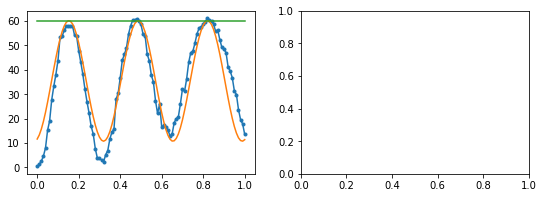

In [140]:
q_target = ['q8']
amp = np.linspace(0,1,101)
# amp=[0]*101
arg = 'amp'
comwave, readseq, mode = True, True, 'vbroadcast'

numrepeat, avg, measure.repeat = (len(amp),False,500) if mode == 'hbroadcast' else (300,True,500)
job = Job(mrw.rabi2_seq, (measure,amp,arg,q_target,comwave,readseq,mode), tags=q_target, max=numrepeat,avg=avg)
v_rp, s_rp = await job.done()
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,3))
t_op, t_fit = [], []
for i in range(np.shape(s_rp)[1]):
    x, y = v_rp[:,i], np.abs(s_rp[:,i])
    t_op.append(op.RowToRipe().firstMax(x,y,num=0,peakpercent=0.8))
    A,B,T1,w,phi,out = op.Rabi_Fit(envelopemethod='hilbert',phi=0).fitRabi(np.abs(x),np.abs(y))
    t_fit.append(1/w/2)
    z = A*np.exp(-x/T1)*np.cos(2*np.pi*w*x+phi) + B
    env = A*np.exp(-x/T1) + B
    axes[0].plot(x,y,'-o',markersize=3)
    axes[0].plot(x,z)
    axes[0].plot(x,env)
#     axes[0].set_title(f't_op={t_op}mv,pi={t_fit}mv')
print(t_op,t_fit)
plt.show()

In [198]:
q1.pi_len2

2e-08

In [200]:
q1.amp2 

0.14

In [202]:
q1.alpha/1e6

201.3512396694215

In [194]:
bit = [q1,q2,q3,q4,q5,q6,q7,q8,q9,q10]
for j,i in enumerate(bit,start=0):
    await cww.RecoverInst(measure,state)
    q_target = [i.q_name]
    amp = np.linspace(0,1,101)
    arg = 'amp'
    comwave, readseq, mode = True, True, 'vbroadcast' 
    numrepeat, avg, measure.repeat = (len(amp),False,1000) if mode == 'hbroadcast' else (300,True,len(amp))
    job = Job(mrw.rabi2_seq, (measure,amp,arg,q_target,comwave,readseq,mode), tags=q_target, max=numrepeat,avg=avg)
    v_rp, s_rp = await job.done()
    num = eval(q_target[0][1:])-1
#     num = 0
    x, y = v_rp[:,num], np.abs(s_rp[:,num])
    pi = op.RowToRipe().firstMax(x,y,num=0,peakpercent=0.7)
    measure.qubits[q_target[0]].amp2 = pi
    await cww.InitInst(measure,psgdc=False,awgch=True,clearwaveseq=[])
    clear_output()

# IQ-Mixer 线性度

In [323]:
q_target = q10
amp = np.linspace(0.1,1,10)
t_rabi = np.linspace(1,201,101)
job = Job(mrw.lineIQMixer, (measure,amp,t_rabi,[q_target.q_name],'vbroadcast'), tags=[tag], max=len(amp))
v_pi, t_pi, s_pi = await job.done()

Output()

# 优化Pi脉冲

Output()

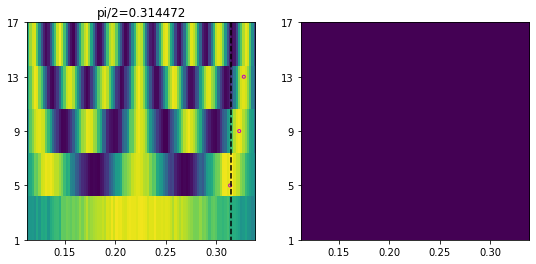

In [83]:
q_target, nwave, wavlen = q2, 5, 101
tag = q_target.q_name
optwhich = 'amp'
job = Job(mrw.pipulseOpt, (measure,nwave,wavlen,optwhich,[q_target.q_name],'vbroadcast'), tags=[tag], max=nwave)
n_pi, t_pi, s_pi = await job.done()
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,4))
x, y, s = n_pi[:,0],t_pi[0][:,0], np.abs(s_pi[:,:,0])
index = y[np.argmax(np.abs(s),axis=1)[0]]
extent = [np.min(y),np.max(y),np.min(x),np.max(x)]
axes[0].set_yticks(x)
axes[0].imshow(np.abs(s),extent=extent,origin='lower',aspect='auto')
yop = np.array([op.RowToRipe().firstMax(y,z,num=0.6,peakpercent=0.9,insitu=True) for z in s])
axes[0].scatter(yop[1:-1],x[1:-1],marker='.',c='',edgecolors='m')
axes[0].vlines(np.mean(yop),np.max(x),np.min(x),'k','--')
axes[0].set_title('pi/2=%f'%np.mean(yop))
axes[1].set_yticks(x)
axes[1].imshow(np.angle(s),extent=extent,origin='lower',aspect='auto')
plt.show()

In [84]:
q2.amp = 0.22337

In [44]:
bits = [q5,q6]
for j,i in enumerate(bits,start=0):
#     if i == 4 or i == 8:
#         print(i)
    await cww.RecoverInst(measure, state)
    await psg_ex1.setValue('Moutput','OFF')
    q_target = [i.q_name]
    nwave, wavlen = 5, 101
    optwhich = 'amp'
    job = Job(mrw.pipulseOpt, (measure,nwave,wavlen,optwhich,q_target,'vbroadcast'), tags=q_target, max=nwave)
    n_pi, t_pi, s_pi = await job.done()
#     x, y = v_rp[:,j], np.abs(s_rp[:,j])
#     pi = op.RowToRipe().firstMax(x,y,num=0,peakpercent=0.8)
#     measure.qubits[f'q{i+1}'].amp = pi
    for q in q_target:
        for ch in measure.qubits[q].inst['ex_ch']:
            await measure.awg[measure.qubits[q].inst['ex_awg']].output_off(ch=ch)
    clear_output()
#     else:
#         continue
await psg_ex1.setValue('Moutput','ON')

In [187]:
q6.amp

0.44

In [705]:
q10.pi_len=20e-9

In [172]:
q10.amp = 0.27372
q9.amp = 0.24129
q8.amp = 0.23765
q2.amp = 0.22303
q1.amp = 0.18984     #0.19841
q3.amp = 0.16268
q7.amp = 0.96756
q4.amp = 0.1949
q5.amp = 0.16465
q6.amp = 0.44443

In [213]:
q7.envelopename

['gaussian', 2]

# 2态优化pi脉冲

In [146]:
q_target, nwave, wavlen = q8, 5, 101
tag = q_target.q_name
optwhich = 'amp'
job = Job(mrw.pipulseOpt2, (measure,nwave,wavlen,optwhich,[q_target.q_name],'vbroadcast'), tags=[tag], max=nwave)
n_pi, t_pi, s_pi = await job.done()
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,4))
num = eval(q_target.q_name[1:]) - 1
x, y, s = n_pi[:,num],t_pi[0][:,num], np.abs(s_pi[:,:,num])
index = y[np.argmax(np.abs(s),axis=1)[0]]
extent = [np.min(y),np.max(y),np.min(x),np.max(x)]
axes[0].set_yticks(x)
axes[0].imshow(np.abs(s),extent=extent,origin='lower',aspect='auto')
yop = np.array([op.RowToRipe().firstMax(y,z,num=0.6,peakpercent=0.9,insitu=True) for z in s])
axes[0].scatter(yop[1:-1],x[1:-1],marker='.',c='',edgecolors='m')
axes[0].vlines(np.mean(yop),np.max(x),np.min(x),'k','--')
axes[0].set_title('pi/2=%f'%np.mean(yop))
axes[1].set_yticks(x)
axes[1].imshow(np.angle(s),extent=extent,origin='lower',aspect='auto')
plt.show()

Output()

IndexError: index 7 is out of bounds for axis 1 with size 1

In [147]:
q8.amp2 = 0.1482

In [216]:
bits = [q1,q2,q3,q4,q5,q6,q7,q8,q9,q10]
# await psg_ex1.setValue('Moutput','OFF')
for j,i in enumerate(bits,start=0):
#     if i == 4 or i == 8:
#         print(i)
    await cww.RecoverInst(measure, state)
    q_target = [i.q_name]
    nwave, wavlen = 5, 101
    optwhich = 'amp'
    job = Job(mrw.pipulseOpt2, (measure,nwave,wavlen,optwhich,q_target,'vbroadcast'), tags=q_target, max=nwave)
    n_pi, t_pi, s_pi = await job.done()
#     x, y = v_rp[:,j], np.abs(s_rp[:,j])
#     pi = op.RowToRipe().firstMax(x,y,num=0,peakpercent=0.8)
#     measure.qubits[f'q{i+1}'].amp = pi
    await cww.InitInst(measure,psgdc=True,awgch=True,clearwaveseq=[])
    clear_output()
#     else:
#         continue
# await psg_ex1.setValue('Moutput','ON')

# AllXY dragdetune

Output()

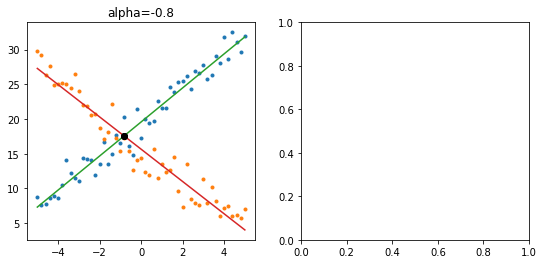

In [85]:
q_target = q2
which = 0
#alpha = q_target.alpha
#await psg[q_target.inst['ex_lo']].setValue('Frequency',(q_target.f_ex+q_target.delta_ex))
job = Job(mrw.AllXYdragdetune, (measure,which,[q_target.q_name]), tags=[q_target.q_name], max=102)
fall, sall = await job.done()
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,4))
l = np.shape(fall)[0]//2
f1, f2, s1, s2 = fall[:l,0], fall[l:,0], np.abs(sall[:l,0]), np.abs(sall[l:,0])
z1 = np.poly1d(np.polyfit(f1,s1,1))(f1)
z2 = np.poly1d(np.polyfit(f2,s2,1))(f2)
index = np.argmin(np.abs(z1-z2))
axes[0].plot(np.array([f1,f2]).T,np.array([s1,s2]).T,'.')
axes[0].plot(np.array([f1,f2]).T,np.array([z1,z2]).T)
# axes[0].plot(fall[l:,:],np.abs(sall[l:,:]))
axes[0].plot([f1[index],f2[index]],[z1[index],z2[index]],'ko')
axes[0].set_title(f'alpha={round(f1[index],3)}')
plt.show()

In [26]:
for j,i in enumerate(range(10),start=0):

    await cww.RecoverInst(measure, state)
    q_target = measure.qubits[f'q{i+1}']
    which = 0
    job = Job(mrw.AllXYdragdetune, (measure,which,[q_target.q_name]), tags=[q_target.q_name], max=82)
    fall, sall = await job.done()
    await cww.InitInst(measure,psgdc=True,awgch=True,clearwaveseq=[])
    clear_output()

In [845]:
q6.DRAGScaling

In [86]:
# q9.DRAGScaling = -0/(q9.alpha*2*np.pi)
# q2.DRAGScaling = -0.4/(q2.alpha*2*np.pi)
# q1.DRAGScaling = -0.1/(q1.alpha*2*np.pi)
# q3.DRAGScaling = -0.4/(q3.alpha*2*np.pi)
# q8.DRAGScaling = 0.5/(q8.alpha*2*np.pi)
q7.DRAGScaling = -0.8/(q7.alpha*2*np.pi)
# q4.DRAGScaling = 0/(q4.alpha*2*np.pi)
# q5.DRAGScaling = -1.3/(q5.alpha*2*np.pi)

## 微波失真类型

In [102]:
bit = [q6]
auxqubit = None
await cww.RecoverInst(measure, state)
await psg_ex1.setValue('Moutput','OFF')
for i in bit:
    q_target = i
    job = Job(mrw.AllXY_kind, (measure,auxqubit,[q_target.q_name]), tags=[q_target.q_name], max=21)
    f, pop = await job.done()
    for ch in q_target.inst['ex_ch']:
        await measure.awg[q_target.inst['ex_awg']].output_off(ch=ch)
    clear_output()
await psg_ex1.setValue('Moutput','ON')

In [88]:
np.shape(pop)

(21, 2)

## 自动优化

In [98]:
pop_kind = np.array([1]*5+[0.5]*12+[0]*4)
async def findfidelity(phi,drag):
    q_target.DRAGScaling = drag/(q_target.alpha*2*np.pi)
    ref={'I':'I','X':['pi',0],'Xhalf':['half',0],'Y':['pi',phi],'Yhalf':['half',phi]}

    job = Job(mrw.AllXY_auto,(measure,auxqubit,[q_target.q_name],ref),\
              tags=([q_target.q_name]+[str(q_target.DRAGScaling)]+[str(phi)]),title='AllXY_test',max=21)
    td, pd = await job.done()
    pd /= np.max(pd)
    res = np.sum((pd[:,target_num]-pop_kind)**2)

    return res

In [99]:
q_target = q6
target_num = 1
start = [np.pi/2,(q_target.alpha*2*np.pi)*q_target.DRAGScaling]
senstive = [np.pi/20,0.5]
high = [np.pi/2,3]
low = [-np.pi/2,-3]
ret = opt.optimize(findfidelity,start,senstive,[4,2],high=high,low=low,print_info=True)

Output()

.o
[ 1.57079633 -0.42      ] 0.01441506507531021   .

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.o
[ 1.57079633 -0.29      ] 0.013112816490275429   

Output()

.

Output()

.o
[ 1.57079633 -0.39      ] 0.010239475423305363   

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

..

Output()

.

Output()

..

Output()

..

Output()

..................................
 CacheInfo(hits=37, misses=18, maxsize=128, currsize=18)


In [100]:
ret.x

array([ 1.57079633, -0.39      ])

# 优化失谐

In [854]:
q_target = q6
job = Job(mrw.optPidetune, (measure,[q_target.q_name]), tags=[q_target.q_name], max=201)
f, pop = await job.done()

Output()

In [158]:
bit = [q1,q2,q3,q4,q5,q6,q7,q8,q9,q10]
for i in bit:
    q_target = i
    job = Job(mrw.optPidetune, (measure,[q_target.q_name]), tags=[q_target.q_name], max=201)
    f, pop = await job.done()
    for ch in q_target.inst['ex_ch']:
        await measure.awg[q_target.inst['ex_awg']].output_off(ch=ch)
    clear_output()

In [508]:
index = np.argmax(pop[:,0])
f[index,0]

4246600000.0

In [159]:
detune_opt = {'q1':-0.24e6,
             'q2':0.08e6,
             'q3':-0.16e6,
             'q4':0e6,
             'q5':0.44e6,
             'q6':-0.04e6,
             'q7':0.08e6,
             'q8':-0.16e6,
             'q9':0.04e6,
             'q10':0.52e6}

In [160]:
for i in range(10):
    measure.qubits[f'q{i+1}'].f_ex += detune_opt[f'q{i+1}']

In [126]:
f_ex = {}
for i in range(10):
    f_ex[f'q{i+1}']=measure.qubits[f'q{i+1}'].f_ex
f_ex

{'q1': 4452818181.818182,
 'q2': 5456388429.752067,
 'q3': 4690264462.809917,
 'q4': 5017272727.272727,
 'q5': 4521247933.884297,
 'q6': 5329669421.487603,
 'q7': 4945619834.710744,
 'q8': 5553198347.107438,
 'q9': 5185413223.140496,
 'q10': 4819314049.586777}

In [108]:
f_ex = {'q1': 4453793388.429752,
 'q2': 5456768595.041323,
 'q3': 4689256198.347108,
 'q4': 5017652892.561983,
 'q5': 4519644628.099174,
 'q6': 5329652892.561983,
 'q7': 4945008264.46281,
 'q8': 5555760330.578512,
 'q9': 5185396694.214876,
 'q10': 4820884297.520661}
for i in range(10):
    measure.qubits[f'q{i+1}'].f_ex = f_ex[f'q{i+1}']

# 优化Drag因子

In [51]:
bit = [q5,q6]
await cww.RecoverInst(measure, state)
await psg_ex1.setValue('Moutput','OFF')
for i in bit:
    q_target = i
    job = Job(mrw.optDragalpha, (measure,[q_target.q_name]), tags=[q_target.q_name], max=61)
    f, pop = await job.done()
    for ch in q_target.inst['ex_ch']:
        await measure.awg[q_target.inst['ex_awg']].output_off(ch=ch)
    clear_output()
await psg_ex1.setValue('Moutput','ON')

In [101]:
# q5.DRAGScaling = 0.2332/(q5.alpha*2*np.pi)
q6.DRAGScaling = -0.39/(q6.alpha*2*np.pi)

In [173]:
q1.DRAGScaling = -0.1953/(q1.alpha*2*np.pi)
q2.DRAGScaling = -0.6995/(q2.alpha*2*np.pi)
q3.DRAGScaling = -0.5659/(q3.alpha*2*np.pi)
q4.DRAGScaling = 0.152/(q4.alpha*2*np.pi)
q5.DRAGScaling = 0/(q5.alpha*2*np.pi)
q6.DRAGScaling = -0.6694/(q6.alpha*2*np.pi)
q7.DRAGScaling = -0.596/(q7.alpha*2*np.pi)
q8.DRAGScaling = -0.8728/(q8.alpha*2*np.pi)
q9.DRAGScaling = -0.8198/(q9.alpha*2*np.pi)
q10.DRAGScaling = -0.701/(q10.alpha*2*np.pi)

In [180]:
async def findalpha(x1,x2,x3,x4,x5):
    x = x1,x2,x3,x4,x5
    
    p_target = np.array([1]*10)
    for j,i in enumerate(exstate):
        measure.qubits[i].DRAGScaling = x[j]/measure.qubits[i].alpha/2/np.pi
    job = Job(mrw.optDragalpha_many, (measure,exstate), tags=exstate, no_bar=True)
    pop = await job.done()
    res = np.sum((pop-p_target)**2)
    return res

In [181]:
await cww.couldRun(measure,measure.awg['awgread'],[1,5],['Readout_I','Readout_Q'])
await measure.psg['psg_lo'].setValue('Output','ON')
await cww.ats_setup(measure.ats,measure.delta,l=measure.readlen,repeats=3000)
exstate = ['q2','q4','q6','q8','q10']
dragcoef = np.linspace(-3,3,61)
N = 5
start = [measure.qubits[i].DRAGScaling*measure.qubits[i].alpha*2*np.pi for i in exstate]
senstive = [1]*N
high = np.array(start)+5
low = np.array(start)-5
ret = opt.optimize(findalpha,start,senstive,[4]*N,high=high,low=low,print_info=True)
# ret = opt_sa.optimize(findalpha,start,senstive,[4]*N,high=high,low=low,print_info=True,algorithm='SA')

Output()

.o
[-0.841  0.1   -0.5   -1.    -1.   ] 0.4086387983108873   

Output()

.o
[-0.341  0.1   -0.5   -1.    -1.   ] 0.3889145788535536   

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.o
[-0.641  0.3   -0.3   -0.8   -1.5  ] 0.3054340685477026   

Output()

.o
[-0.541  0.4   -0.2   -0.7   -2.   ] 0.08907319842123136   

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.o
[-0.4117  0.7013 -0.3395 -1.0787 -2.3766] 0.08023020173155272   

Output()

.o
[-0.5107  0.9284 -0.5729 -1.0956 -2.6729] 0.05565245780754865   

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.o
[-0.5664  0.7924 -0.3663 -1.1222 -2.7535] 0.04130331085191262   

Output()

.o
[-0.6652  0.7423 -0.3866 -1.1398 -2.8702] 0.03869999151199636   

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

..

Output()

...

Output()

.

Output()

.

Output()

.

Output()

...

Output()

.

Output()

...

Output()

.............................
 CacheInfo(hits=35, misses=151, maxsize=128, currsize=128)


In [183]:
ret.x

array([-0.6652,  0.7423, -0.3866, -1.1398, -2.8702])

In [91]:
q1.DRAGScaling = -0.641/(q1.alpha*2*np.pi)
q2.DRAGScaling = -0.6652/(q2.alpha*2*np.pi)
q3.DRAGScaling = -0.316/(q3.alpha*2*np.pi)
q4.DRAGScaling = 0.7423/(q4.alpha*2*np.pi)
q5.DRAGScaling = -0.07/(q5.alpha*2*np.pi)
q6.DRAGScaling = -0.3866/(q6.alpha*2*np.pi)
q7.DRAGScaling = -0.426/(q7.alpha*2*np.pi)
q8.DRAGScaling = -1.1398/(q8.alpha*2*np.pi)
q9.DRAGScaling = -0.917/(q9.alpha*2*np.pi)
q10.DRAGScaling = -2.8702/(q10.alpha*2*np.pi)

In [90]:
q1.DRAGScaling

-4.807125098777403e-10

In [40]:
for i in measure.qubits:
    measure.qubits[i].DRAGScaling = None

# AC_Stark

In [53]:
#波形尾部在 87 us处， 波形宽度为 50 ns
q1.replace(envelopename=['hanning',2],nwave=1,amp=1,shift=0e-9,phase=0,phaseDiff=0,delta_ex=110e6,pi_len=5.6e-9,\
         seqtype='PDD',detune=3e6)

In [199]:
q1.timing["read>xy"]=10e-9

## 单条

In [145]:
q10.timing = {'read>xy':0,'z>xy':0}

In [46]:
q_target = q10
task = await mrw.executeZwave(measure,cww.zWave,dcstate={},qnum=10,output=True,during=0/1e9,shift=3000e-9)
mrw.concurrence(task)
measure.delta,measure.base,measure.readlen = q_target.state[1:]
await cww.RecoverInst(measure,state=q_target.state[0])
# await cww.modulation_read(measure,measure.delta,measure.readlen)
# await awg133.run()

Output()

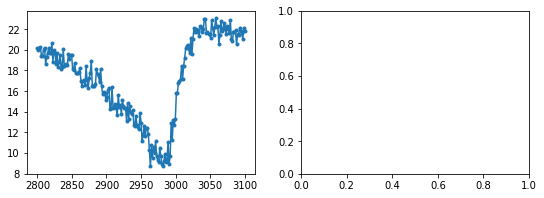

In [47]:
q_target = q10
t_rabi = np.linspace(2800,3100,201)
power = 0.15
tag = q_target.q_name
job = Job(mrw.singleacStark, (measure,t_rabi,power,[q_target.q_name]), tags=[tag], no_bar=True)
t_shift, s_ac = await job.done()
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,3))
for i in range(np.shape(s_ac)[1]):
    x, y = t_shift[:,i], np.abs(s_ac[:,i])
    axes[0].plot(x,y,'-o',markersize=3)
plt.show()

In [48]:
3001-3050

-49

In [24]:
q1.timing['read>xy'] = -52e-9 + 150e-9
q2.timing['read>xy'] = -59e-9 + 150e-9
q3.timing['read>xy'] = -48e-9 + 150e-9
q4.timing['read>xy'] = -59e-9 + 150e-9
q5.timing['read>xy'] = -50e-9 + 150e-9
q6.timing['read>xy'] = -52e-9 + 150e-9
q7.timing['read>xy'] = -62e-9 + 150e-9
q8.timing['read>xy'] = -59e-9 + 150e-9
q9.timing['read>xy'] = -60e-9 + 150e-9
q10.timing['read>xy'] = -49e-9 + 150e-9

## 二维

In [210]:
q1.f_ex = 4.643e9

In [129]:
q_target = q2
t_rabi = np.linspace(2000,5000,201)
power = 0.2
tag = q_target.q_name
job = Job(mrw.acStark, (measure,t_rabi,power,[q_target.q_name]), tags=[tag],max=51)
freq, t_shift, s_ac = await job.done()

Output()

TypeError: cannot unpack non-iterable NoneType object

# 腔内光子数

In [30]:
q2.f_ex = 4811430000.0

In [171]:
q_target = q2
power = np.linspace(0,0.1,101)
end = 3000
tag = q_target.q_name
job = Job(mrw.photonNum, (measure,power,end,[q_target.q_name]), tags=[tag],max=51)
freq, t_shift, s_ac = await job.done()

Output()

# Z脉冲

## 单条

In [35]:
#波形尾部在 87 us处， 波形宽度为 30ns, 最低点应为3015

In [357]:
measure.qubits['q1'].zCali = None

In [302]:
q8.timing['z>xy']  

0

Output()

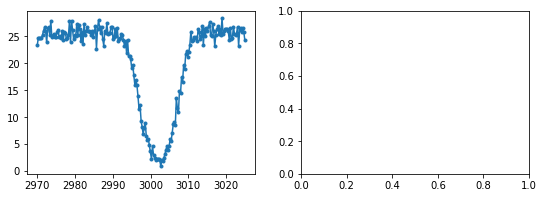

In [147]:
q_target = q10
t_rabi = np.linspace(2970,3025,201)
att_single = 30
tag = q_target.q_name
job = Job(mrw.singleZpulse, (measure,t_rabi,[q_target.q_name]), tags=[tag],no_bar=True)
t_shift, s_z = await job.done()
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,3))
for i in range(np.shape(s_z)[1]):
    x, y = t_shift[:,i], np.abs(s_z[:,i])
    res, func = op.Erf_fit().fitErf(x, y)
    paras = res.x
    axes[0].plot(x,y,'-o',markersize=3)
    axes[0].plot(x,func(x,paras))
    axes[0].vlines((paras[2]+paras[3])/2,np.min(y),np.max(y)) 
    print((paras[2]+paras[3])/2)
plt.show()

In [148]:
# 3003-3005+(q_target.pi_len*q_target.envelopename[1])/2e-9

8.0

In [19]:
# q1.timing['z>xy'] = 8e-9 
# q2.timing['z>xy'] = -1e-9 
# q3.timing['z>xy'] = -3e-9 
# q4.timing['z>xy'] = 7e-9 
# q5.timing['z>xy'] = -11e-9 
# q6.timing['z>xy'] = 9e-9 
# q7.timing['z>xy'] = 1e-9 
q8.timing['z>xy'] = 2e-9 
q9.timing['z>xy'] = -2e-9 
# q10.timing['z>xy'] = 8e-9 

In [17]:
q9.timing

{'read>xy': 0.0, 'z>xy': -9.148240569091286e-09}

## 二维

In [97]:
q_target = q2
t_rabi = np.linspace(2895,2985,201)
att_single = 30
tag = q_target.q_name
# await psg[q_target.inst['ex_lo']].setValuez('Frequency',(q_target.f_ex+q_target.delta_ex))
job = Job(mrw.zPulse, (measure,t_rabi,[q_target.q_name]), tags=[tag],max=40)
freq, t_shift, s_z = await job.done()

Output()

## 二维Population

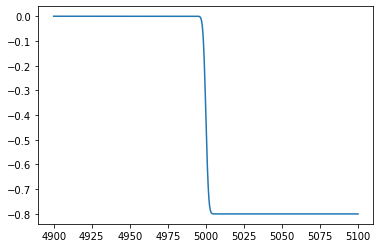

In [694]:
t = np.linspace(4900,5100,1001)
func_test = lambda t: -(scipy.special.erf((t-5000)/2)+1)/2*0.8
plt.figure()
plt.plot(t,func_test(t))

In [149]:
measure.qubits['q5'].zCali 

{'1st': {'pexp': array([ 0.        , -0.0075575 ,  0.0022273 , -0.08730499,  0.03367004]),
  'ppoly': array([ 1.66217950e+03,  1.49992693e-01,  1.73231351e-38,  1.42395540e-37,
         -2.40754529e-34,  2.23310247e-35,  8.44454631e-31,  3.28997985e-29,
         -1.19772993e-27, -1.66046714e-25, -4.87503045e-24,  3.83000842e-22,
          3.04259150e-20, -2.95377616e-19, -8.79206271e-17, -8.45677416e-16,
          2.39452580e-13, -2.13229839e-12, -3.26329343e-10,  1.32691629e-08,
         -2.32161746e-07,  2.12926746e-06, -1.00312760e-05,  2.26703498e-05,
         -2.51236048e-05,  5.37285665e-06]),
  'time': [55, 0, 0.40000000004511094, 0.4]},
 '2nd': {'pexp': array([ 0.        ,  0.05062464,  0.06477292, -0.09107672,  0.11511769]),
  'ppoly': array([-9.57991821e+03,  1.43816558e-01, -1.10290216e-46,  2.53890581e-44,
          1.14158671e-42, -4.96147778e-40,  2.31625820e-37, -2.76476283e-35,
         -1.05068121e-32,  1.34162869e-31,  4.51978024e-28,  3.67105956e-26,
         -1.8234

In [51]:
q_target = q3
t_end = 5000-q_target.pi_len*q_target.envelopename[1]/2e-9 
t_rabi = np.append(np.arange(2900,4900,50),np.append(np.arange(4900,4940,2),np.arange(4940,t_end,1)))
# t_rabi = np.arange(4986,5005,2)
# t_rabi = np.append(np.append(np.arange(2000,4900,50),np.arange(4900,4940,5)),np.arange(4940,t_end,1))
height = 0.4
tag = q_target.q_name
# await cww.ats_setup(measure.ats,measure.delta,l=measure.readlen,repeats=1000,weight=weight)
job = Job(mrw.zPulse_pop, (measure,t_rabi,height,[q_target.q_name]), tags=[tag,str(height)],max=len(t_rabi))
freq, t_shift, s_z = await job.done()

Output()

TypeError: cannot unpack non-iterable NoneType object

In [304]:
len(t_rabi)

78

In [311]:
np.max([1,1,1,2,2])

2

In [119]:
np.array(np.mat(measure.readmatrix['q7']).I*np.mat([1,0.5]).T)

array([[0.99138293],
       [0.50861707]])

In [125]:
np.array([[1,2],[3,4]])[:,1]

array([2, 4])

In [ ]:
bits = [q5,q8]
for i in bits:
    q_target = i
    await cww.InitInst(measure,psgdc=True,awgch=True,clearwaveseq=[])
    task = await mrw.executeZwave(measure,cww.zWave,dcstate={},output=True,during=0/1e9,shift=0e-9)
    task_ex = await mrw.executeEXwave(measure,cww.rabiWave,exstate=[q_target.q_name],output=True)
    mrw.concurrence([{**task[0],**task_ex[0]},{**task[1],**task_ex[1]}])
    measure.delta,measure.base,measure.readlen = q_target.state[1:]
    await cww.RecoverInst(measure,state=q_target.state[0])
    measure.qubitToread = [q_target.q_name]
    measure.readamp = q_target.readamp
    measure.ringup = q_target.ringup
    measure.ringupamp = q_target.ringupamp
    pulse = await cww.modulation_read(measure,measure.delta,readlen=1200,weight=q_target.weight)

    t_end = 5000-q_target.pi_len*q_target.envelopename[1]/2e-9 + 10
    # t_rabi = np.append(np.arange(2000,4900,40),np.arange(4940,t_end,2))
    # t_rabi = np.arange(4986,5005,2)
    t_rabi = np.append(np.append(np.arange(2000,4900,40),np.arange(4900,4940,5)),np.arange(4940,t_end,1))
    height = 0.4
    tag = q_target.q_name
    await cww.ats_setup(measure.ats,measure.delta,l=measure.readlen,repeats=600,weight=weight)
    job = Job(mrw.zPulse_pop, (measure,t_rabi,height,[q_target.q_name]), tags=[tag,str(height)],max=len(t_rabi))
    freq, t_shift, s_z = await job.done()
    clear_output()

Output()

In [189]:
q4.asdict()

{'q_name': 'q4',
 'inst': {'z_awg': 'awg132',
  'z_ch': [6],
  'ex_awg': 'awg133',
  'ex_ch': [4, 8],
  'ex_lo': 'psg_ex1',
  'com': 'com3'},
 'T_bias': [2.674, 0.19],
 'T_z': [1.693, 0.128],
 'specinterp': [array([4.18522651, 4.18523392, 4.18524133, ..., 5.0963504 , 5.09635058,
         5.09635076]),
  array([-4.40000000e-01, -4.39998240e-01, -4.39996480e-01, ...,
         -3.52001408e-06, -1.76000704e-06,  0.00000000e+00])],
 'specfunc': 0.392922207235296*(0.260687322777235*tan(1.16146693007348*x - 0.195126444252345)**2 + 1)**(1/4)*sqrt(Abs(cos(1.16146693007348*x - 0.195126444252345))) - 0.207651457817498,
 'specfuncz': [5.23649435077076*(2.44129621681596e-5*tan(1.81602720319208*x - 0.0211271599327831)**2 + 1)**(1/4)*sqrt(Abs(cos(1.81602720319208*x - 0.0211271599327831))) - 0.139559260563361,
  0.01163372437133506,
  1.7299259879299895,
  24.560241447758198,
  0.13955926056336138,
  -0.004940947497004958],
 'specfunc_cavity': sqrt((0.392922207235296*(0.260687322777235*tan(1.161466930

In [190]:
measure.qubits["q4"].asdict()

{'q_name': 'q4',
 'inst': {'z_awg': 'awg132',
  'z_ch': [6],
  'ex_awg': 'awg133',
  'ex_ch': [4, 8],
  'ex_lo': 'psg_ex1',
  'com': 'com3'},
 'T_bias': [2.674, 0.19],
 'T_z': [1.693, 0.128],
 'specinterp': [array([4.18522651, 4.18523392, 4.18524133, ..., 5.0963504 , 5.09635058,
         5.09635076]),
  array([-4.40000000e-01, -4.39998240e-01, -4.39996480e-01, ...,
         -3.52001408e-06, -1.76000704e-06,  0.00000000e+00])],
 'specfunc': 0.392922207235296*(0.260687322777235*tan(1.16146693007348*x - 0.195126444252345)**2 + 1)**(1/4)*sqrt(Abs(cos(1.16146693007348*x - 0.195126444252345))) - 0.207651457817498,
 'specfuncz': [5.23649435077076*(2.44129621681596e-5*tan(1.81602720319208*x - 0.0211271599327831)**2 + 1)**(1/4)*sqrt(Abs(cos(1.81602720319208*x - 0.0211271599327831))) - 0.139559260563361,
  0.01163372437133506,
  1.7299259879299895,
  24.560241447758198,
  0.13955926056336138,
  -0.004940947497004958],
 'specfunc_cavity': sqrt((0.392922207235296*(0.260687322777235*tan(1.161466930

### sequence

In [167]:
# q_target = q3
# t_end = 5000-q_target.pi_len*q_target.envelopename[1]/2e-9 +1
# t_rabi = np.append(np.arange(2200,4900,50),np.append(np.arange(4900,4940,2),np.arange(4940,t_end,1)))
# # t_rabi = np.append(np.arange(4790,4940,1.2),np.arange(4940,t_end,0.4))
# np.shape(t_rabi)
# # volt = np.append(np.linspace(-0.02,0.02,81),np.linspace(0.02,0.06,21))
# volt = np.linspace(-0.02,0.03,61)
# height = -0.4
# tag = q_target.q_name
# # await cww.ats_setup(measure.ats,measure.delta,l=measure.readlen,repeats=1000,weight=weight)
# job = Job(mrw.zPulse_pop, (measure,t_rabi,volt,height,[q_target.q_name]), tags=[tag,str(height)],max=len(volt))
# freq, t_shift, s_z = await job.done()

In [169]:
t_rabi = np.append(np.arange(1800,4900,30),np.append(np.arange(4900,4940,2),np.arange(4940,t_end,0.4)))
np.shape(t_rabi)

(252,)

In [209]:
q2.zCali,q8.zCali = z2,z8

In [120]:
bits = [q8]
for i in bits:
    q_target = i
    await cww.InitInst(measure,psgdc=True,awgch=True,clearwaveseq=[])
    task = await mrw.executeZwave(measure,cww.zWave,dcstate={},output=True,during=0/1e9,shift=0e-9,offset=0)
    task_ex = await mrw.executeEXwave(measure,cww.rabiWave,exstate=[q_target.q_name],output=True)
    await mrw.concurrence([{**task[0],**task_ex[0]},{**task[1],**task_ex[1]}])
    measure.delta,measure.base,measure.readlen = q_target.state[1:]
    await cww.RecoverInst(measure,state=q_target.state[0])
    measure.qubitToread = [q_target.q_name]
    measure.readamp = q_target.readamp
    measure.ringup = q_target.ringup
    measure.ringupamp = q_target.ringupamp
    pulse = await cww.modulation_read(measure,measure.delta,readlen=measure.readlen,weight=q_target.weight)

    t_end = 5000-q_target.pi_len*q_target.envelopename[1]/2e-9 +10
#     t_rabi = np.append(np.arange(1800,4900,30),np.append(np.arange(4900,4940,2),np.arange(4940,t_end,0.4)))
#     t_rabi = np.append(np.arange(4790,4940,1.2),np.arange(4940,t_end,0.4))
    t_rabi = np.append(np.arange(4790,4900,5),np.arange(4900,t_end,1))
    
#     volt = np.linspace(-0.05,0.015,71)
    volt = np.linspace(-0.015,0.015,61)
    height = 0.5
    tag = q_target.q_name
    # await cww.ats_setup(measure.ats,measure.delta,l=measure.readlen,repeats=1000,weight=weight)
    await psg_ex1.setValue('Moutput','ON')
    job = Job(mrw.zPulse_pop, (measure,t_rabi,volt,height,[q_target.q_name]), tags=[tag,str(height)],max=len(volt))
    freq, t_shift, s_z = await job.done()
    clear_output()

In [61]:
len(np.append(np.arange(4790,4920,3),np.arange(4920,t_end,0.4)))

244

In [151]:
q_target = q5
t_end = 5000-q_target.pi_len*q_target.envelopename[1]/2e-9 +10

In [90]:
t_rabi = np.append(np.arange(4790,4900,5),np.arange(4900,t_end,1))
np.shape(t_rabi)

NameError: name 't_end' is not defined

# qubit-qubit时序

## 单比特XY-Z时序

In [31]:

fpath = r'D:\skzhao\file_name\wave\2021\0321\QubitState_20210321193910.npz'
data = np.load(fpath,allow_pickle=True)
def dict2tuple(q):
    for i,k in enumerate(q):
        attr = {}
        for j in mrw.qubit().asdict():
            if j in k:
                attr[j] = k[j]
            else:
                attr[j] = None
        globals()[k['q_name']] = mrw.qubit(**attr)

dict2tuple(data['state'])
qubitlist = [q1,q2,q3,q4,q5,q6,q7,q8,q9,q10]
measure.qubits= {i.q_name:i for i in qubitlist}

In [32]:
bits = [q1,q2,q3,q4,q5,q6,q7,q8,q9,q10]

measure.readamp = [0.03]*10
measure.ringup = [100]*10
measure.ringupamp = [0.1]*10
await psg_ex1.setValue('Moutput','OFF')
for i, j in enumerate(bits,start=0):
    
    await mrw.jpa_switch(measure,state='ON')
    q_target = j
    q_target.timing={'read>xy':100e-9,'z>xy':0e-9}
    
    await mrw.dcManage(measure,dcstate={},readstate=[q_target.q_name],calimatrix=None)
    task = await mrw.executeZwave(measure,cww.zWave,dcstate={},qnum=10,output=True,offset=0,during=0/1e9,shift=0e-9)
    await mrw.concurrence(task)

    measure.delta,measure.base,measure.readlen = q_target.state[1:]
    await cww.RecoverInst(measure,state=q_target.state[0])
    
    processlist = [mrw.singleZpulse]
    para4 = {'t_shift':np.linspace(2900,3100,121),'exstate':[q_target.q_name],'comwave':True,'updatez':True,'readseq':True}
    paraslist = [para4]
    maxlist = [300]
    avg = [False]
    update_state = [False]

    whichexe = [0]
    await mrw.dispatcher(measure,whichexe,processlist,paraslist,tags=[q_target.q_name],\
                         maxlist=maxlist,avg=avg,update_state=update_state)
    await cww.InitInst(measure,psgdc=True,awgch=True,clearwaveseq=[])
    clear_output()
await psg_ex1.setValue('Moutput','ON')
timing = {measure.qubits[i].q_name:measure.qubits[i].timing for i in measure.qubits}
print(timing)

{'q1': {'read>xy': 1e-07, 'z>xy': 4.575104611556526e-09}, 'q2': {'read>xy': 1e-07, 'z>xy': -1.3983980505272485e-09}, 'q3': {'read>xy': 1e-07, 'z>xy': 3.4785973855873638e-09}, 'q4': {'read>xy': 1e-07, 'z>xy': 2.0940137105880695e-08}, 'q5': {'read>xy': 1e-07, 'z>xy': 5.506060808088023e-09}, 'q6': {'read>xy': 1e-07, 'z>xy': 2.1809861131459914e-09}, 'q7': {'read>xy': 1e-07, 'z>xy': 3.880685839807484e-09}, 'q8': {'read>xy': 1e-07, 'z>xy': 1.2886941419492815e-08}, 'q9': {'read>xy': 1e-07, 'z>xy': 7.1659771333424945e-09}, 'q10': {'read>xy': 1e-07, 'z>xy': 9.214090078867231e-10}}


In [51]:
timing = {'q1': {'read>xy': 1e-07, 'z>xy': -7.902097434817734e-09}, 'q2': {'read>xy': 1e-07, 'z>xy': -2.6307629499997347e-09}, 'q3': {'read>xy': 1e-07, 'z>xy': -7.569923584829668e-09}, 'q4': {'read>xy': 1e-07, 'z>xy': 1.6035124849588102e-08}, 'q5': {'read>xy': 1e-07, 'z>xy': -5.107050051378793e-09}, 'q6': {'read>xy': 1e-07, 'z>xy': 1.9794364272070197e-09}, 'q7': {'read>xy': 1e-07, 'z>xy': 1.6965873703588842e-09}, 'q8': {'read>xy': 1e-07, 'z>xy': 1.523640571805754e-08}, 'q9': {'read>xy': 1e-07, 'z>xy': 1.1860002832074316e-08}, 'q10': {'read>xy': 1e-07, 'z>xy': -8.779856126080176e-09}}

## 比特间时序

In [33]:

fpath = r'D:\skzhao\file_name\wave\2021\0321\QubitState_20210321210400.npz'
data = np.load(fpath,allow_pickle=True)
def dict2tuple(q):
    for i,k in enumerate(q):
        attr = {}
        for j in mrw.qubit().asdict():
            if j in k:
                attr[j] = k[j]
            else:
                attr[j] = None
        globals()[k['q_name']] = mrw.qubit(**attr)

dict2tuple(data['state'])
qubitlist = [q1,q2,q3,q4,q5,q6,q7,q8,q9,q10]
measure.qubits= {i.q_name:i for i in qubitlist}
for j in measure.qubits:
    measure.qubits[j].timing = timing[j]

In [34]:
bits = [q1,q2,q3,q4,q5,q6,q7,q8,q9,q10]
measure.readamp = [0.03]*10
measure.ringup = [100]*10
measure.ringupamp = [0.1]*10
await psg_ex1.setValue('Moutput','OFF')
await psg_trans.setValue('Power',4)
for i, j in enumerate(bits,start=0):
    if i+1>=len(bits):
        break
    await mrw.jpa_switch(measure,state='ON')
    q_target = j
    q_bias = bits[i+1]
    
    
    await mrw.dcManage(measure,dcstate={},readstate=[q_target.q_name,q_bias.q_name],calimatrix=None)
    task = await mrw.executeZwave(measure,cww.zWave,dcstate={},qnum=10,output=True,offset=0,during=0/1e9,shift=0e-9)
    await mrw.concurrence(task)
    measure.delta,measure.base,measure.readlen = q_target.state[1:]
    await cww.RecoverInst(measure,state=q_target.state[0])
    
    processlist = [mrw.singlespec,mrw.qqTiming]
    para1 = {'freq':np.arange(4.2,5.1,0.002)*1e9,'modulation':True,'f_read':measure.f_lo,'readponit':True,'exstate':[q_target.q_name]}
    para4 = {'v_rabi':np.linspace(900,1100,121),'exstate':[q_target.q_name],'dcstate':[q_bias.q_name],'comwave':True}
    paraslist = [para1,para4]
    maxlist = [len(para1['freq']),300]
    avg = [False,True]
    update_state = [False,False]

    whichexe = [0,1]
    await mrw.dispatcher(measure,whichexe,processlist,paraslist,tags=[q_target.q_name],\
                         maxlist=maxlist,avg=avg,update_state=update_state)
    await cww.InitInst(measure,psgdc=True,awgch=True,clearwaveseq=[])
    clear_output()
await psg_ex1.setValue('Moutput','ON')
timing = {measure.qubits[i].q_name:measure.qubits[i].timing for i in measure.qubits}
print(timing)

{'q1': {'read>xy': 1e-07, 'z>xy': 4.575104611556526e-09}, 'q2': {'read>xy': 9.440983265543831e-08, 'z>xy': -1.3983980505272485e-09}, 'q3': {'read>xy': 9.676429424793013e-08, 'z>xy': 3.4785973855873638e-09}, 'q4': {'read>xy': 1.1438248805231569e-07, 'z>xy': 2.0940137105880695e-08}, 'q5': {'read>xy': 9.902342343291024e-08, 'z>xy': 5.506060808088023e-09}, 'q6': {'read>xy': 9.546867336863101e-08, 'z>xy': 2.1809861131459914e-09}, 'q7': {'read>xy': 9.767853814905913e-08, 'z>xy': 3.880685839807484e-09}, 'q8': {'read>xy': 1.06381222972332e-07, 'z>xy': 1.2886941419492815e-08}, 'q9': {'read>xy': 1.0557282775451085e-07, 'z>xy': 7.1659771333424945e-09}, 'q10': {'read>xy': 9.970722495992436e-08, 'z>xy': 9.214090078867231e-10}}


In [202]:
timing = {'q1': {'read>xy': 1e-07, 'z>xy': 6.561234510299528e-09},
 'q2': {'read>xy': 6.643539814935434e-08, 'z>xy': -2.69394618054248e-08},
 'q3': {'read>xy': 9.815197381708742e-08, 'z>xy': 7.659266964956715e-09},
 'q4': {'read>xy': 8.959790906514877e-08, 'z>xy': -9.57041999539797e-10},
 'q5': {'read>xy': 9.753833332209841e-08, 'z>xy': 6.819418030745511e-09},
 'q6': {'read>xy': 6.894913359552765e-08, 'z>xy': -2.162336960964558e-08},
 'q7': {'read>xy': 7.104832892830745e-08, 'z>xy': -1.995719225656194e-08},
 'q8': {'read>xy': 9.001111888551338e-08, 'z>xy': -8.88556313982008e-10},
 'q9': {'read>xy': 9.106802623564272e-08, 'z>xy': 1.9965183123636055e-08},
 'q10': {'read>xy': 9.960443541054314e-08, 'z>xy': 2.860674356327036e-08}}

In [100]:
q10.timing

{'read>xy': 9.849261932368802e-08, 'z>xy': -4.948006006329251e-09}

In [203]:

for j in measure.qubits:
    measure.qubits[j].timing = timing[j]

# T1

In [55]:
q6.pi_len = 16e-9

Output()

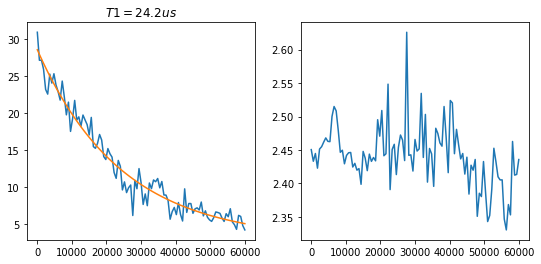

In [56]:
t_T1, q_target = np.linspace(0,60000,101,endpoint=True), ['q6']
job = Job(mrw.rabi, (measure,t_T1,'shift',q_target), tags=q_target, max=len(t_T1))
t_t, s_t = await job.done()
A, B, T1 = op.Exp_Fit().fitExp(t_t[:,0],np.abs(s_t[:,0]))
z = A * np.exp(-t_t[:,0]*T1) + B
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,4))
axes[0].plot(t_t,np.abs(s_t))
axes[0].plot(t_t[:,0],z)
axes[0].set_title('$T1=%.1fus$'%(1/T1/1000))
axes[1].plot(t_t,np.angle(s_t))
plt.show()

# T1_seq

In [139]:
q1.replace(pi_len=10.6e-9)

In [114]:
q10.timing['read>xy'] = 100e-9

Output()

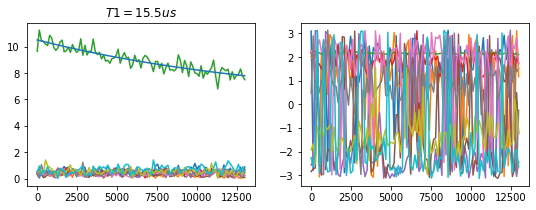

In [55]:
q_target = ['q3']
amp = np.linspace(0,13000,101)
arg = 'shift'
num = eval(q_target[0][1:])-1
comwave, readseq, mode = True, True, 'vbroadcast'

numrepeat, avg, measure.repeat = (len(amp),False,500) if mode == 'hbroadcast' else (300,True,len(amp))
job = Job(mrw.rabi_seq, (measure,amp,arg,q_target,comwave,readseq,mode), tags=q_target, max=numrepeat,avg=avg,title='T1')
t_t, s_t = await job.done()
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,3))
A, B, T1 = op.Exp_Fit().fitExp(t_t[:,num],np.abs(s_t[:,num]))
z = A * np.exp(-t_t[:,num]*T1) + B
axes[0].plot(t_t,np.abs(s_t))
axes[0].plot(t_t[:,num],z)
axes[0].set_title('$T1=%.1fus$'%(1/T1/1000))
axes[1].plot(t_t,np.angle(s_t))
plt.show()

In [15]:
bits = [q9,q10]
amp = np.linspace(0,43000,201)
for i, j in enumerate(bits):
    q_target = j
    arg = 'shift'
    comwave, readseq, mode = True, True, 'vbroadcast'

    numrepeat, avg, measure.repeat = (len(amp),False,500) if mode == 'hbroadcast' else (300,True,len(amp))
    job = Job(mrw.rabi_seq, (measure,amp,arg,[q_target.q_name],comwave,readseq,mode),title='T1_seq',\
              tags=[q_target.q_name],max=numrepeat,avg=avg)
    t_t, s_t = await job.done()
    
    for ch in q_target.inst['ex_ch']:
        await measure.awg[q_target.inst['ex_awg']].output_off(ch=ch)
    
    num = i
    x, y = t_t[:,num], np.abs(s_t[:,num])
    fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,3))
    A, B, T1 = op.Exp_Fit().fitExp(x,y)
    z = A * np.exp(-x*T1) + B
    axes[0].plot(t_t,np.abs(s_t))
    axes[0].plot(x,z)
    axes[0].set_title('$T1=%.1fus$'%(1/T1/1000))

    plt.savefig(r'\\QND-SERVER2\skzhao\fig\%s.png'%(''.join((q_target.q_name,'_',str(q_target.f_ex/1e9),'_','T1_seq'))))
    plt.close()
    clear_output()
    gc.collect()

In [14]:
q9.f_ex

5185636815.920398

# Ramsey

In [69]:
q1.replace(nwave=0,seqtype='PDD',detune=2e6)

Output()

(27.678096420331716, -69.25510484251407, 30000, 26397.890093965696, 0.0015841584158415843, 0)


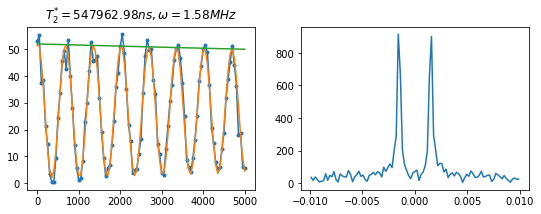

In [112]:
t_Ramsey, q_target = np.linspace(0,5000,101), ['q2']
# await psg[q_target.inst['ex_lo']].setValue('Frequency',(q_target.f_ex+q_target.delta_ex))

job = Job(mrw.Ramsey, (measure,t_Ramsey,q_target), tags=q_target, max=len(t_Ramsey))
t_ram, s_ram = await job.done()
x, y = t_ram[:,0], (s_ram[:,0])
A,B,T1,T2,w,phi,out = op.T2_Fit(T1=30000,funcname='gauss',envelopemethod='hilbert').fitT2(x,np.abs(y))
z = A*np.exp(-(x/T2)**2-x/T1/2)*np.cos(2*np.pi*w*x+phi) + B
z_env = A*np.exp(-(x/T2)**2-x/T1/2) + B
w,yt,amp = op.RowToRipe().fourier(x,y)
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,3))
axes[0].plot(t_ram,np.abs(s_ram),'-o',markersize=3)
axes[0].plot(x,z)
axes[0].plot(x,z_env)
axes[0].set_title('$T_{2}^{*}=%.2fns,\omega=%.2fMHz$'%(T2,w*1e3))
axes[1].plot(yt[yt!=0],np.abs(amp[yt!=0]))
plt.show()

In [194]:
f = await  psg_ex1.getValue('Frequency')
await psg_ex1.setValue('Frequency',(f-w*1e9+2e6))
print(f)

4943000000.0


In [195]:
q1.f_ex = f - q1.delta_ex

In [113]:
q1.asdict()

{'q_name': 'q1',
 'inst': {'z_awg': 'awg132',
  'z_ch': [1],
  'ex_awg': 'awg134',
  'ex_ch': [4, 8],
  'ex_lo': 'psg_ex1',
  'com': 'com3'},
 'T_bias': [3.319, -0.284],
 'T_z': [2.101, -0.194],
 'specfunc': 5.25149015598707*(0.942356245310643*tan(0.934656305237647*x + 0.218709575425609)**2 + 1)**(1/4)*sqrt(Abs(cos(0.934656305237647*x + 0.218709575425609))) - 0.81966338969257,
 'specfunc_cavity': sqrt((5.25149015598707*(0.942356245310643*tan(0.934656305237647*x + 0.218709575425609)**2 + 1)**(1/4)*sqrt(Abs(cos(0.934656305237647*x + 0.218709575425609))) - 7.33303642022885)**2 + 0.268557160758026)/2 + 2.62574507799353*(0.942356245310643*tan(0.934656305237647*x + 0.218709575425609)**2 + 1)**(1/4)*sqrt(Abs(cos(0.934656305237647*x + 0.218709575425609))) + 2.84685482042185,
 'photonnum_func': None,
 'bias': 0,
 'zpulse': None,
 'f_lo': array([6.535e+09]),
 'delta': array([50000000.]),
 'f_ex': 5308400000.0,
 'delta_ex': 300000000.0,
 'alpha': 212000000.0,
 'power_ex': 60,
 'power_rabi': 30,
 

# ramsey_seq

In [384]:
q1.replace(nwave=0,seqtype='PDD',detune=2e6)
# await cww.clearSeq(measure,['awg133','awg134'])

In [26]:
await cww.RecoverInst(measure,state)
await psg_ex1.setValue('Moutput','OFF')

Output()

(16.533570964769677, -24.52384253994734, 30000, 5749.637057634929, 0.0039603960396039604, 0)


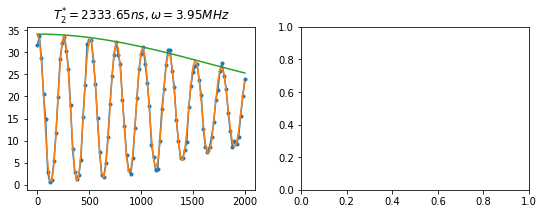

In [82]:
q_target = ['q2']
t_Ramsey = np.linspace(0,2000,101)
comwave, readseq, mode = True, True, 'vbroadcast'

numrepeat, avg = (len(t_Ramsey),False) if mode == 'hbroadcast' else (300,True)
job = Job(mrw.Ramsey_seq, (measure,t_Ramsey,q_target,comwave,readseq,mode), tags=q_target, max=numrepeat,avg=avg)
t_ram, s_ram = await job.done()
# num = eval(q_target[0][1:])-1
num = 0
x, y = t_ram[:,num], np.abs(s_ram[:,num])
res, func = op.T2_Fit(T1=30000,funcname='gauss',envelopemethod='hilbert').fitT2(x,np.abs(y))
A,B,T1,T2,w,phi = res.x
z = func(x,res.x)
z_env = A*np.exp(-(x/T2)**2-x/T1/2) + B
# w,yt,amp = op.RowToRipe().fourier(x,y)
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,3))
axes[0].plot(t_ram,np.abs(s_ram),'-o',markersize=3)
axes[0].plot(x,z)
axes[0].plot(x,z_env)
axes[0].set_title('$T_{2}^{*}=%.2fns,\omega=%.2fMHz$'%(T2,w*1e3))
# axes[1].plot(yt[yt!=0],np.abs(amp[yt!=0]))
plt.show()
q_target = measure.qubits[q_target[0]]
q_target.f_ex = q_target.f_ex -w*1e9+q_target.detune

In [106]:
w

0.0039603960396039604

In [43]:
bits = [q5,q6]
t_Ramsey = np.linspace(0,5000,121)
await cww.RecoverInst(measure,state)
await psg_ex1.setValue('Moutput','OFF')
for i, j in enumerate(bits):
    q_target = j
    comwave, readseq, mode = True, True, 'vbroadcast'

    numrepeat, avg = (len(t_Ramsey),False) if mode == 'hbroadcast' else (300,True)
    job = Job(mrw.Ramsey_seq, (measure,t_Ramsey,[q_target.q_name],comwave,readseq,mode), tags=[q_target.q_name], max=numrepeat,avg=avg)
    t_ram, s_ram = await job.done()

    for ch in q_target.inst['ex_ch']:
        await measure.awg[q_target.inst['ex_awg']].output_off(ch=ch)
    
    num = i
    x, y = t_ram[:,num], np.abs(s_ram[:,num])
    res, func = op.T2_Fit(T1=30000,funcname='gauss',envelopemethod='hilbert').fitT2(x,np.abs(y))
    A,B,T1,T2,w,phi = res.x
    z = func(x,res.x)
    z_env = A*np.exp(-(x/T2)**2-x/T1/2) + B
    w_f,yt,amp = op.RowToRipe().fourier(x,np.abs(y))
    w = w if np.abs(w-w_f)<0.5e6 else w_f
    fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,3))
    axes[0].plot(t_ram,np.abs(s_ram),'-o',markersize=3)
    axes[0].plot(x,z)
    axes[0].plot(x,z_env)
    axes[0].set_title('$T_{2}^{*}=%.2fns,\omega=%.2fMHz$'%(T2,w*1e3))
    axes[1].plot(yt[yt!=0],np.abs(amp[yt!=0]))
    plt.savefig(r'\\QND-SERVER2\skzhao\fig\%s.png'%(''.join((q_target.q_name,'_',str(q_target.f_ex/1e9),'_','Ramsey_seq'))))
    plt.close()
    q_target.f_ex = q_target.f_ex -w*1e9+q_target.detune
    clear_output()
    gc.collect()
await psg_ex1.setValue('Moutput','ON')

In [93]:
q10.amp =0.289

In [84]:
f_ex = {}
for i in measure.qubits:
    f_ex[i] = measure.qubits[i].f_ex
f_ex

{'q1': 4453793388.429752,
 'q2': 5456768595.041323,
 'q3': 4689256198.347108,
 'q4': 5017652892.561983,
 'q5': 4519644628.099174,
 'q6': 5329652892.561983,
 'q7': 4945008264.46281,
 'q8': 5555760330.578512,
 'q9': 5185396694.214876,
 'q10': 4820884297.520661}

In [19]:
q1.delta_ex

100000000.0

In [427]:
w*1e9

2574257.4257425745

In [415]:
f = await  psg['psg_ex1'].getValue('Frequency')
# await psg['psg_ex1'].setValue('Frequency',(f-w*1e9+2e6))
print(f)

4558996237.624


In [112]:
q5.f_ex

4519000000.0

In [113]:
q = q5
q.f_ex = f-w*1e6+2e6 - q.delta_ex
q.replace(nwave=1,seqtype='PDD',detune=2e6)

In [ ]:
dcstate = {}
dcstate['q1'] = -0.433
dcstate['q2'] = 0
dcstate['q3'] = 0
dcstate['q4'] = 0
dcstate['q5'] = 0
dcstate['q6'] = 0
dcstate['q7'] = 0
dcstate['q8'] = 0
dcstate['q9'] = 0
dcstate['q10'] = 0
task = await mrw.executeZwave(measure,cww.zWave,dcstate=dcstate,\
    calimatrix=calimatrix,output=True,during=(len(measure.t_new)/2.5/2e9+2000e-9),offset=0,shift=0e-9)
mrw.concurrence(task)

In [ ]:
q2.volt = -0.249606
q3.volt = -0.07998
q4.volt = -0.2735
q5.volt = -0.0464
q6.volt = -0.47641073
q7.volt = -0.18375
q8.volt = -0.36065573
q9.volt = -0.25029
q10.volt = -0.1055

In [35]:
q_target = q6
t_Ramsey = np.linspace(0,13000,125)
await psg_ex1.setValue('Moutput','OFF')
data_r = []
for i in range(100):
    comwave = True if i == 0 else False
    readseq, mode = True, 'vbroadcast'

    numrepeat, avg = (len(t_Ramsey),False) if mode == 'hbroadcast' else (300,True)
    job = Job(mrw.Ramsey_seq, (measure,t_Ramsey,[q_target.q_name],comwave,readseq,mode), tags=[q_target.q_name], max=numrepeat,avg=avg)
    t_ram, s_ram = await job.done()
    data_r.append(s_ram)

await psg_ex1.setValue('Moutput','ON')

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

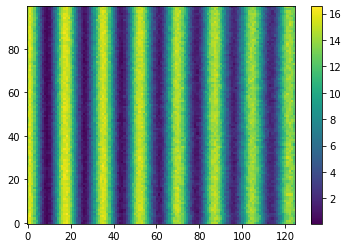

In [36]:
plt.figure()
plt.imshow(np.abs(data_r)[:,:,5],aspect='auto',origin='lower')
plt.colorbar()

# 2态Ramsey

Output()

(27.56418283846052, -7.183439002032259, 30000, 59852.73814970353, 0.0014851485148514852, 0)


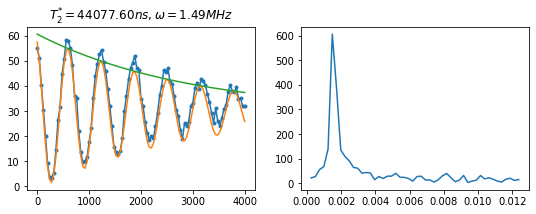

In [145]:
q_target = q8
t_Ramsey = np.linspace(0,4000,101)
att_single = 30
comwave, readseq, mode = True, True, 'vbroadcast'

numrepeat, avg = (len(t_Ramsey),False) if mode == 'hbroadcast' else (300,True)
job = Job(mrw.Ramsey2_seq, (measure,t_Ramsey,[q_target.q_name],comwave,readseq,mode), tags=[q_target.q_name], max=numrepeat,avg=avg)
t_ram, s_ram = await job.done()
num = eval(q_target.q_name[1:]) - 1
num = 0
x, y = t_ram[:,num], (s_ram[:,num])
res, func = op.T2_Fit(T1=30000,funcname='gauss',envelopemethod='hilbert').fitT2(x,np.abs(y))
A,B,T1,T2,w,phi = res.x
z = func(x,res.x)
z_env = A*np.exp(-(x/T2)**2-x/T1/2) + B
w,yt,amp = op.RowToRipe().fourier(x,y)
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,3))
axes[0].plot(t_ram,np.abs(s_ram),'-o',markersize=3)
axes[0].plot(x,z)
axes[0].plot(x,z_env)
axes[0].set_title('$T_{2}^{*}=%.2fns,\omega=%.2fMHz$'%(T2,w*1e3))
axes[1].plot(yt[yt!=0],np.abs(amp[yt!=0]))
plt.show()
q_target.alpha = q_target.alpha -w*1e9+q_target.detune

In [589]:
q_target = q10
q_target.alpha = q_target.alpha -w*1e9+q_target.detune

In [604]:
q10.alpha/1e6

263.33003300330034

In [208]:
q3.alpha = 210e6

In [215]:
bits = [q8]
t_Ramsey = np.linspace(0,5000,121)
await cww.RecoverInst(measure,state)
# await psg_ex1.setValue('Moutput','OFF')
for i, j in enumerate(bits,start=0):
    q_target = j
    comwave, readseq, mode = True, True, 'vbroadcast'

    numrepeat, avg = (len(t_Ramsey),False) if mode == 'hbroadcast' else (300,True)
    job = Job(mrw.Ramsey2_seq, (measure,t_Ramsey,[q_target.q_name],comwave,readseq,mode), tags=[q_target.q_name], max=numrepeat,avg=avg)
    t_ram, s_ram = await job.done()

    for ch in q_target.inst['ex_ch']:
        await measure.awg[q_target.inst['ex_awg']].output_off(ch=ch)
    
    num = i
    x, y = t_ram[:,num], np.abs(s_ram[:,num])
    res, func = op.T2_Fit(T1=30000,funcname='gauss',envelopemethod='hilbert').fitT2(x,np.abs(y))
    A,B,T1,T2,w,phi = res.x
    z = func(x,res.x)
    z_env = A*np.exp(-(x/T2)**2-x/T1/2) + B
    w,yt,amp = op.RowToRipe().fourier(x,y)
    fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,3))
    axes[0].plot(t_ram,np.abs(s_ram),'-o',markersize=3)
    axes[0].plot(x,z)
    axes[0].plot(x,z_env)
    axes[0].set_title('$T_{2}^{*}=%.2fns,\omega=%.2fMHz$'%(T2,w*1e3))
    axes[1].plot(yt[yt!=0],np.abs(amp[yt!=0]))
    plt.savefig(r'\\QND-SERVER2\skzhao\fig\%s.png'%(''.join((q_target.q_name,'_',str(q_target.alpha/1e6),'_','Ramsey_seq'))))
    plt.close()
    q_target.alpha = q_target.alpha -w*1e9+q_target.detune
    clear_output()
    gc.collect()
# await psg_ex1.setValue('Moutput','ON')

# ZZ coupling

In [144]:
q_target = ['q3']
q_control = ['q5']
t_Ramsey = np.linspace(0,5000,101)
comwave, readseq, mode = True, False, 'vbroadcast'

await psg_ex1.setValue('Moutput','OFF')
omega = {}
for switch in ['ON','OFF']:
    job = Job(mrw.ZZ_coupling, (measure,t_Ramsey,q_target,q_control,comwave,readseq,mode), tags=q_target,no_bar=True)
    t_ram, s_ram = await job.done()
    if switch == 'ON':
        comwave, readseq, mode = False, False, 'vbroadcast'
        for ch in measure.qubits[q_control[0]].inst['ex_ch']:
                await measure.awg[measure.qubits[q_control[0]].inst['ex_awg']].output_off(ch=ch)

    num = eval(q_target[0][1:]) - 1
    x, y = t_ram[:,num], np.abs(s_ram[:,num])
    res, func = op.T2_Fit(T1=30000,funcname='gauss',envelopemethod='hilbert').fitT2(x,np.abs(y))
    A,B,T1,T2,w,phi = res.x
    z = func(x,res.x)
    z_env = A*np.exp(-(x/T2)**2-x/T1/2) + B
    w,yt,amp = op.RowToRipe().fourier(x,y)
    omega[switch] = w
    fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,3))
    axes[0].plot(t_ram,np.abs(s_ram),'-o',markersize=3)
    axes[0].plot(x,z)
    axes[0].plot(x,z_env)
    axes[0].set_title('$T_{2}^{*}=%.2fns,\omega=%.2fMHz$'%(T2,w*1e3))
    axes[1].plot(yt[yt!=0],np.abs(amp[yt!=0]))
    plt.savefig(r'\\QND-SERVER2\skzhao\fig\%s.png'%(q_target[0]+q_control[0]+switch))
    plt.close()
#     clear_output()
# await psg_ex1.setValue('Moutput','ON')

Output()

(7.73135985966932, 9.39478314952971, 30000, 2076.4642735990037, 0.0021782178217821784, 0)


Output()

(7.810808562541749, -9.713931826243089, 30000, 1147.0, 0.0021782178217821784, 0)


In [127]:
omega['OFF']*1e3-omega['ON']*1e3

-0.15021645255007354

In [135]:
omega['OFF']*1e3-omega['ON']*1e3

-0.7920792079207919

In [140]:
omega['OFF']*1e3-omega['ON']*1e3

0.0

In [145]:
omega['OFF']*1e3-omega['ON']*1e3

0.0

# Phase_Gate

In [58]:
bits = [q1,q2,q3,q4,q5,q7,q8,q9,q10]
v_2pi = {'q1':-0.0044,'q2':0.0074,'q3':0.0146,'q4':-0.0566,'q5':0.0174,'q6':-0.1176,'q7':0.007,'q8':0.0476,\
          'q9':0.0036,'q10':0.0048}
t_col = 1/0.12
for q in bits:
    q_target = q
    print(q_target.q_name)
    v_rabi = np.linspace(-0.05,0.05,251) 
    v_cali = v_2pi[q_target.q_name]
#     v_cali = q_target.volt
#     v_cali = 
    task = await mrw.executeZwave(measure,cww.zWave,dcstate={},offset=0,qnum=10,output=True,during=0/1e9,shift=0e-9)
    await mrw.concurrence(task)
    job = Job(mrw.Phase_gate, (measure,v_rabi,t_col,'volt',v_cali,1,[q_target.q_name],[q_target.q_name],None,True), \
              tags=[q_target.q_name],avg=True, max=500)
    v_ex, s_sc = await job.done()
    for ch in q_target.inst['ex_ch']:
        await measure.awg[q_target.inst['ex_awg']].output_off(ch=ch)

q1


Output()

In [155]:
q1.during

In [78]:
bits = [q10]
t_col = 1/0.12
num_gate = 5
for q in bits:
    q_target = q
    print(q_target.q_name)
    v_cali = np.linspace(-0.05,0.05,251) 
    task = await mrw.executeZwave(measure,cww.zWave,dcstate={},offset=0,qnum=10,output=True,during=0/1e9,shift=0e-9)
    await mrw.concurrence(task)   
    job = Job(mrw.Phase_gate_2d, (measure,v_cali,t_col,'volt',num_gate,[q_target.q_name],[q_target.q_name],None,True), \
                  tags=[q_target.q_name], max=num_gate)
    num_pg, v_ex, s_sc = await job.done()
    for ch in q_target.inst['ex_ch']:
        await measure.awg[q_target.inst['ex_awg']].output_off(ch=ch)

q10


Output()

In [77]:
q10.volt_zgate

0.0114

In [40]:
for i in measure.qubits:
    measure.qubits[i].volt_zgate = 0

In [206]:
q = q1
q.volt_zgate = -0.02317-q.volt

In [84]:
q1.volt_zgate = -0.0157
q2.volt_zgate =-0.008
q3.volt_zgate = 0.0108
q4.volt_zgate = -0.0236
q5.volt_zgate = -0.0044
q6.volt_zgate = -0.13
q7.volt_zgate = -0.0196
q8.volt_zgate = -0.0068
q9.volt_zgate = -0.0056
q10.volt_zgate = 0.0064
# q10.volt_zgate = -0.45

In [ ]:
bits = [q1,q2,q3,q4,q5,q7,q8,q9,q10]
v_2pi = {'q1':-0.0044,'q2':0.0074,'q3':0.0146,'q4':-0.0566,'q5':0.0174,'q6':-0.1176,'q7':0.007,'q8':0.0476,\
          'q9':0.0036,'q10':0.0048}
t_col = 1/0.12
for q in bits:
    q_target = q
    print(q_target.q_name)
    v_cali = np.linspace(-0.01,0.01,21)
#     v_cali = q_target.volt
#     v_cali = 
    task = await mrw.executeZwave(measure,cww.zWave,dcstate={},offset=0,qnum=10,output=True,during=0/1e9,shift=0e-9)
    mrw.concurrence(task)
    job = Job(mrw.Phase_gate_tomo, (measure,t_col,v_cali,[q_target.q_name],[q_target.q_name],None,True), \
              tags=[q_target.q_name], max=len(v_cali))
    v_ex, s_sc, _ = await job.done()
    for ch in q_target.inst['ex_ch']:
        await measure.awg[q_target.inst['ex_awg']].output_off(ch=ch)

# SpinEcho

In [47]:
q6.replace(nwave=1,seqtype='CPMG',detune=1e6)

In [36]:
t_spin, q_target = np.linspace(0,15000,101), ['q6']

job = Job(mrw.SpinEcho, (measure,t_spin,q_target), tags=q_target, max=len(t_spin))
t_sp, s_sp = await job.done()
x, y = t_sp[:,0], s_sp[:,0]
A,B,T1,T2,w,phi,out = op.T2_Fit(T1=100000,funcname='gauss',envelopemethod='hilbert').fitT2(x,np.abs(y))
z = A*np.exp(-(x/T2)**2-x/T1/2)*np.cos(2*np.pi*w*x+phi) + B
z_env = A*np.exp(-(x/T2)**2-x/T1/2) + B
w,yt,amp = op.RowToRipe().fourier(x,y)
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,4))
axes[0].plot(x,np.abs(y),'-o',markersize=3)
axes[0].plot(x,z)
axes[0].plot(x,z_env)
axes[0].set_title('$T_{2}=%.2fus,w=%fMHz$'%(np.abs(T2/1000),w*1e3))
axes[1].plot(yt[yt!=0],np.abs(amp[yt!=0]))
plt.show()

Output()

TypeError: cannot unpack non-iterable NoneType object

# SpinEcho_seq

In [200]:
q8.replace(nwave=1,seqtype='CPMG',detune=1e6)

In [201]:
t_spin, q_target = np.linspace(0,10000,201), ['q8']
# await psg[q_target.inst['ex_lo']].setValue('Frequency',(q_target.f_ex+q_target.delta_ex))

job = Job(mrw.SpinEcho_seq, (measure,t_spin,q_target,True), tags=q_target, max=500, avg=True)
t_sp, s_sp = await job.done()
x, y = t_sp[:,0], (s_sp[:,0])
A,B,T1,T2,w,phi,out = op.T2_Fit(T1=50000,funcname='gauss',envelopemethod='hilbert').fitT2(x,np.abs(y))
z = A*np.exp(-(x/T2)**2-x/T1/2)*np.cos(2*np.pi*w*x+phi) + B
z_env = A*np.exp(-(x/T2)**2-x/T1/2) + B
w,yt,amp = op.RowToRipe().fourier(x,y)
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,3))
axes[0].plot(x,np.abs(y),'-o',markersize=3)
axes[0].plot(x,z)
axes[0].plot(x,z_env)
axes[0].set_title('$T_{2}^{*}=%.2fus,\omega=%.2fMHz$'%(T2/1e3,w*1e3))
axes[1].plot(yt[yt!=0],np.abs(amp[yt!=0]))
plt.show()

Output()

(8.201217000586256, 10.801613471916212, 50000, 1178.4574319708129, 0.0009950248756218905, 0)


ValueError: not enough values to unpack (expected 7, got 2)

In [111]:
np.shape(t_sp)

(201, 1)

# Spec2d_awg

In [183]:
q1.replace(envelopename=['square',1],nwave=1,amp=1,shift=0e-9,phase=0,phaseDiff=0,delta_ex=120e6,pi_len=23e-9,\
         seqtype='CPMG',detune=3e6)

In [121]:
freq = np.arange(3.7,4.7,0.001)*1e9
bits = [q1]
await psg_trans.setValue('Power',0)
# await measure.attinst['com8'].set_att(20)
for k, i in enumerate(bits):
#     await measure.attinst['com9'].set_att(25)
    await mrw.jpa_switch(measure,'ON')
    print(i.q_name)
    job = Job(mrw.spec2d_awg, (i,measure,freq,None), tags=[i.q_name], max=61)
    v_s2, f_s2, s_s2 = await job.done()

q1


Output()

TypeError: cannot unpack non-iterable NoneType object

# OPTweight

In [78]:
q_target = ['q8']
job = Job(mrw.readOpweight, (measure,q_target), tags=q_target, max=2)
ampop= await job.done()
amp_off, amp_on = ampop[0][0,:], ampop[0][1,:]
ampdiff = np.abs(amp_on-amp_off)
weight = (ampdiff/np.mean(ampdiff))
# weight /= np.max(np.abs(weight))
measure.qubits[q_target[0]].weight = weight
plt.figure()
# plt.plot(np.abs(amp_off))
# plt.plot(np.abs(amp_on))
# plt.plot(ampdiff)
plt.plot(weight)

Output()

# 优化读出点

In [42]:
await cww.RecoverInst(measure,state)
await cww.ats_setup(measure.ats,measure.delta,l=measure.readlen,repeats=300)

Output()

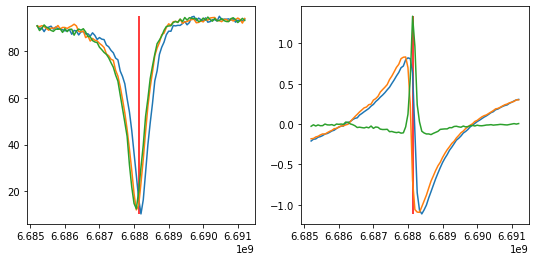

In [107]:
q_target = ['q8']
# await measure.attinst['com8'].set_att(30)
# await measure.attinst[q_target.inst['com']].set_att(q_target.power_rabi)
await mrw.jpa_switch(measure,state='ON')
# await psg[q_target.inst['ex_lo']].setValue('Frequency',(q_target.f_ex+q_target.delta_ex))
job = Job(mrw.readOp, (measure,q_target), tags=q_target, max=2)
st, f_op, s_op= await job.done()
f_lo_m = []
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,4))
for i in range(measure.n):
    f, s_off, s_on, s_on2 = f_op[:,:,i][0], s_op[:,:,i][0], s_op[:,:,i][1], s_op[:,:,i][2]
    if i == eval(q_target[0][1:])-1:
        f_off = f[np.argmin(np.abs(s_off))]
        f_on = f[np.argmin(np.abs(s_on))]
        f_on2 = f[np.argmin(np.abs(s_on2))]
    f_lo1 = (f[np.argmin(np.abs(s_off))] + f[np.argmin(np.abs(s_on))])/2
    x_off, y_off = op.RowToRipe().deductPhase(f,s_off)
    x_on, y_on = op.RowToRipe().deductPhase(f,s_on)
    anglediff = (np.angle(y_off[0])-np.angle(y_on[0]))
    index = np.abs(anglediff).argmax(axis=0)
    #index = np.abs(s_off).argmin(axis=0)
    f_lo_m.append(f[index] if np.abs(f[index]-f_lo1)<0.1e6 else f_lo1)
    axes[0].plot(f_op[:,:,i].T,np.abs(s_op[:,:,i].T))
    axes[0].vlines(f_lo_m,np.max(np.abs(s_op[:,:,i].T)),np.min(np.abs(s_op[:,:,i].T)),'r')
    axes[1].plot(x_off,np.angle(y_off[0]))
    axes[1].plot(x_on,np.angle(y_on[0]))
    axes[1].plot(x_off,anglediff)
    axes[1].vlines(f_lo_m,np.max(anglediff),np.min(np.angle(y_off[0])),'r')
plt.show()
f_lo, delta, n = await mrw.resn(np.array(f_lo_m))
measure.f_lo, measure.delta, measure.n = f_lo, delta, n
axes[0].set_title(f'fread={f_lo-measure.delta}')
await psg['psg_lo'].setValue('Frequency',f_lo)
for q in q_target:
    for ch in measure.qubits[q].inst['ex_ch']:
        await measure.awg[measure.qubits[q].inst['ex_awg']].output_off(ch=ch)

In [17]:
q2.DRAGScaling

-4.922108144183855e-10

In [262]:
f_off, f_on, f_on2

(6729266666.666667, 6729066666.666667, 6728933333.333334)

In [274]:
freqall = np.array([6544533333.333333, 6562733333.333333, 6587333333.333334, 6607600000.0, 6630066666.666667, \
                    6648533333.333333, 6642000000.0, 6688900000.0, 6709466666.666666, 6729266666.666667])
# freqall = freqall[::-1]
f_cavity = {'q%d'%(i):j for i, j in enumerate(freqall,start=1)}
measure.freqall = f_cavity

In [13]:
freqall = np.array([6544333333.333333, 6562266666.666666, 6587133333.333334, 6607333333.333333, 6629866666.666667,\
                    6648200000.0, 6641733333.333333, 6688433333.333333, 6709199999.999999, 6729066666.666667])
# freqall = freqall[::-1]
f_cavity = {'q%d'%(i):j for i, j in enumerate(freqall,start=1)}
measure.freqall = f_cavity

In [31]:
freqall = np.array([6544266666.666666, 6562000000.0, 6587000000.000001, 6607200000.0, 6629800000.0, \
                    6647933333.333333, 6641666666.666666, 6688433333.333333, 6708999999.999999, 6728933333.333334])+\
np.array([6544333333.333333, 6562266666.666666, 6587133333.333334, 6607333333.333333, 6629866666.666667,\
                    6648200000.0, 6641733333.333333, 6688433333.333333, 6709199999.999999, 6729066666.666667])
# freqall = freqall[::-1]
f_cavity = {'q%d'%(i):j/2 for i, j in enumerate(freqall,start=1)}
measure.freqall = f_cavity

In [210]:
await psg['psg_lo'].setValue('Frequency',6.729e9)

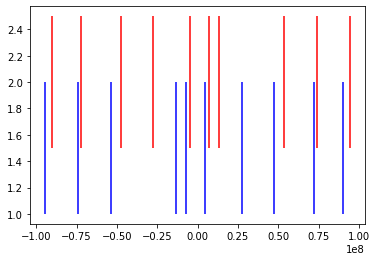

In [123]:
plt.figure()
delta = measure.delta
delta_n = -delta
h = [1]*10
plt.vlines(delta,h,np.array(h)+1,color='b')
plt.vlines(delta_n,np.array(h)+0.5,np.array(h)+1.5,color='r')

# 临界判断

In [58]:
measure.readamp = [0.06,0.03,0.058,0.05,0.05,0.04,0.049,0.035,0.035,0.04][4:]
measure.ringup = [100,100,100,100,100,100,100,100,100,200][4:]
measure.ringupamp = [0.1]*10
# measure.readamp = [0.05][:]
# measure.ringup = [100][:]
# measure.ringupamp = [0.18]
pulse = await cww.modulation_read(measure,measure.delta,readlen=1500,weight=None)

In [81]:
q8.replace(readamp=measure.readamp,ringup=measure.ringup,ringupamp=measure.ringupamp)

Output()

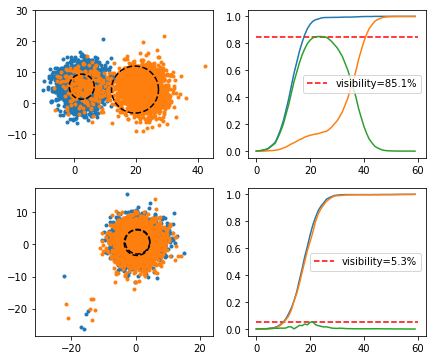

0.43408203125


Output()

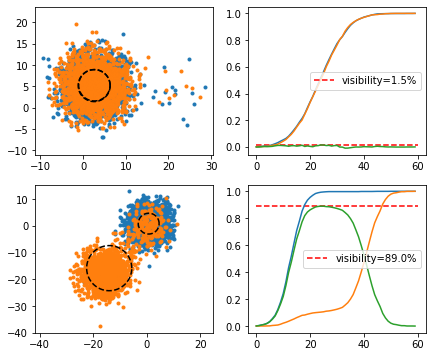

0.554931640625


In [67]:
bits = [q5,q6]
# await cww.RecoverInst(measure,state)
for qnum,q in enumerate(bits):
    q_target = [q.q_name]
    # await measure.attinst['com8'].set_att(29)
    await mrw.jpa_switch(measure,'ON')
    job = Job(mrw.threshHold, (measure,q_target), tags=q_target, max=3)
    st, s_st, s_st_Q = await job.done()

    for qu in q_target:
        for ch in measure.qubits[qu].inst['ex_ch']:
            await measure.awg[measure.qubits[qu].inst['ex_awg']].output_off(ch=ch)

    num = measure.n
    fig, axes = plt.subplots(ncols=2,nrows=num,figsize=(7,3*num))
    for i in range(measure.n):
        s_off, s_on, s_on2 = s_st[0,:,i], s_st[1,:,i], s_st[2,:,i]
        data = await mrw.visibility(1,s_off,s_on)
        ax0 = axes[i][0] if num>1 else axes[i]
        ax0.plot(np.real(s_off),np.imag(s_off),'.')
        ax0.plot(np.real(s_on),np.imag(s_on),'.',alpha=1)
    #     if np.shape(s_st)[0] == 3:
    #         ax0.plot(np.real(s_on2),np.imag(s_on2),'.',alpha=0.6)
    #     ax0.plot(np.real(s_on2),np.imag(s_on2),'.',alpha=0.6)
        ax0.plot(*(data[0][3]),'k--')
        ax0.plot(*(data[0][4]),'k--')
        ax0.axis('equal')
        ax1 = axes[i][1] if num>1 else axes[i+1]
        for j in data[0][:3]:
            ax1.plot(j)
        maxdata = np.max(data[0][2])
        ax1.hlines(maxdata,0,60,'r','--',label=f'visibility={round(maxdata*100,1)}%')
        ax1.legend(loc='high left')
    #     ax1.vlines([0],10,-100)
    #     ax1.hlines([0],-10,100)

    plt.show()
#     num = eval(q_target[0][1:])-1
    num=qnum
#     para0, para1 = await dtl.find_circle(measure,s_st,num)
    dtl.classify(measure,s_st,target=num,predictexe=True,n_cluster=2)

In [31]:
jpa.power_ex=5.54

In [68]:
await psg_ex1.setValue('Moutput','OFF')

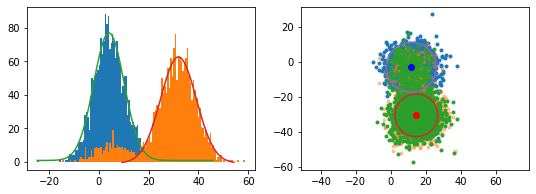

0.442138671875


In [98]:
num = 9
para0, para1 = await find_circle(measure,s_st,num)
dtl.classify(measure,s_st,target=num,predictexe=True,n_cluster=2)

In [181]:
measure.f_lo -= 0.25e6
await psg['psg_lo'].setValue('Frequency',measure.f_lo)

In [63]:
q2.delta_ex

-100000000.0

In [356]:
measure.delta[7] = -1.96766667e+07 

In [346]:
measure.delta

array([ 1.24423333e+08,  1.06490000e+08,  8.16233333e+07,  6.14233333e+07,
        3.88900000e+07,  2.05566667e+07,  2.70233333e+07, -1.96766667e+07,
       -4.04433333e+07, -6.03100000e+07])

In [ ]:
4.455, 5.457, 4.688, 5.019, 4.52 , 5.331, 4.944, 5.555, 5.186,4.82 

In [30]:
async def find_circle(measure,s_st,target=0):
    s_off, s_on, s_on2 = s_st[0,:,target], s_st[1,:,target], s_st[2,:,target]
    S = list(s_off) + list(s_on)
    x,z = np.real(S), np.imag(S)
    d = list(zip(x,z))
    kmeans = KMeans(n_clusters=2,max_iter=1000,tol=0.0001)
    kmeans.fit(d)
    c0, c1 = kmeans.cluster_centers_[0,:], kmeans.cluster_centers_[1,:]
    center0 = np.array([np.real(np.mean(s_off)),np.imag(np.mean(s_off))]) 
    center1 = np.array([np.real(np.mean(s_on)),np.imag(np.mean(s_on))])
    center0, center1 = (c0,c1) if np.sum((center0-c0)**2)<np.sum((center0-c1)**2) else (c1,c0)
    sdiff = np.complex(*(center1-center0))
    s0 = s_off / (sdiff/np.abs(sdiff))
    s1 = s_on / (sdiff/np.abs(sdiff))
    s0 = np.real(s0)
    s1 = np.real(s1)
    bins = 120
    mu = np.complex(*center1)/ (sdiff/np.abs(sdiff))
    x0 = np.linspace(min(s0),max(s0),bins)
    x1_old = np.linspace(min(s1),max(s1),bins)
    lower, high = np.real(mu)-2*np.std(s1), np.real(mu)+2*np.std(s1)
    x1 = x1_old[x1_old>lower]

    fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,3))
    bin0 = axes[0].hist(s0,bins=bins)
    bin1 = axes[0].hist(s1,bins=bins)
    para0, func0 = op.Gaussian_Fit().fitGaussian(x0,bin0[0])
    axes[0].plot(x0,func0(x0,para0.x))
    b1 = bin1[0][x1_old>lower]
    b1 = b1[x1<high]
    x1 = x1[x1<high]
    para1, func1 = op.Gaussian_Fit().fitGaussian(x1,b1)
    axes[0].plot(x1,func1(x1,para1.x))
#     axes[0].set_title(f'center={center0,center1}')

    offstd, onstd = para0.x[2], para1.x[2]
    theta = np.arange(0, 2*np.pi, 0.01)
    roff = c0[0] + 2*offstd * np.cos(theta)
    ioff = c0[1] + 2*offstd * np.sin(theta)
    ron = c1[0] + 2*onstd * np.cos(theta)
    ion = c1[1] + 2*onstd * np.sin(theta)
    axes[1].plot(np.real(s_off),np.imag(s_off),'.')
    axes[1].plot(np.real(s_on2),np.imag(s_on2),'.',alpha=0.4)
    axes[1].plot(np.real(s_on),np.imag(s_on),'.')
    axes[1].plot(*c1,'bo')
    axes[1].plot(*c0,'ro')
    axes[1].plot(roff,ioff)
    axes[1].plot(ron,ion)
    axes[1].axis('equal')
#     axes[1].set_title(f'sigma={para0.x[2],para1.x[2]}')
    plt.savefig(r'\\QND-SERVER2\skzhao\fig\%s.png'%(f'q{target+1}'+'postSle'))
    plt.show()
    measure.postSle[f'q{target+1}'] = [(center0,para0.x[2]), (center1,para1.x[2])]
    return (center0,para0.x[2]), (center1,para1.x[2])
# num = eval(q_target[0][1:])-1
# # num=0
# para0, para1 = await find_circle(measure,s_st,num)
# # num = eval(q_target[0][1:])-1
# dtl.classify(measure,s_st,target=num,predictexe=True,n_cluster=2)

In [113]:
def post_selection(measure,s,sigma_num=2):
    center0,center1 = [], []
    radius0, radius1 = [], []
    for i in measure.postSle:
        center0.append(np.complex(*(measure.postSle[i][0][0])))
        radius0.append(measure.postSle[i][0][1])
        center1.append(np.complex(*(measure.postSle[i][1][0])))
        radius1.append(measure.postSle[i][1][1])
    pop = []
    for i in range(np.shape(s)[1]):
        x0 = (np.abs(s[:,i,:]-np.array(center0))<np.array(radius0)*sigma_num)*1.0
        x1 = (np.abs(s[:,i,:]-np.array(center1))<np.array(radius1)*sigma_num)*1.0
#         y = x0 + x1
#         c = np.sum((y == np.array([1]*10))*1,axis=1)
#         x0, x1 = x0[c==10,:], x1[c==10,:]
        pop_sum1 = np.sum(x1,axis=1)
#         pop_sum0 = np.sum(x0,axis=1)
        pop_q = x1[pop_sum1==5,:]
#         print(pop_q[:,8])
#         print(np.shape(pop_q))
        pop.append((np.count_nonzero(pop_q,axis=0)/len(pop_q)))
    return np.array(pop)

In [85]:
data = np.load(r'D:\skzhao\Vmodulation\2021\0308\oToc_q246810_20210308112101.npz')
s = data['value']
np.shape(s)

(30000, 30, 10)

In [87]:
s1,s2,s3,s4,s5,s6,s7,s8,s9,s10 = s[:3000,:,:],s[3000:6000,:,:],s[6000:9000,:,:],s[9000:12000,:,:],s[12000:15000,:,:],s[15000:18000,:,:],s[18000:21000,:,:],s[21000:24000,:,:],s[24000:27000,:,:],s[27000:30000,:,:]

In [91]:
s_data = [s1,s2,s3,s4,s5,s6,s7,s8,s9,s10]
pop = []
for j in s_data:
    pop_n = j
    pop_m = []
    for i in range(30):
        pop_m.append(np.array(mrw.readPop(measure,pop_n[:,i,:],readcali = True))[:,1])
    pop.append(pop_m)

In [92]:
np.shape(pop)

(10, 30, 10)

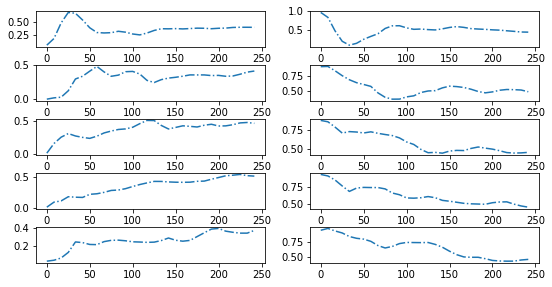

In [98]:
pop = np.array(pop)
num = 10
height = 1
dt = 1/0.12
x = np.arange(0,30*dt,dt)[0:]
n = num // 2 + num % 2
fig, axes = plt.subplots(ncols=2,nrows=n,figsize=(9,height*n))
fig.subplots_adjust(top=0.85,bottom=0.15,hspace=0.5)
v = []
for i in range(num): 
    f, res = x,np.mean(pop,axis=0)[:,i]
    axes[i//2][i%2].plot(f,res,'-.')

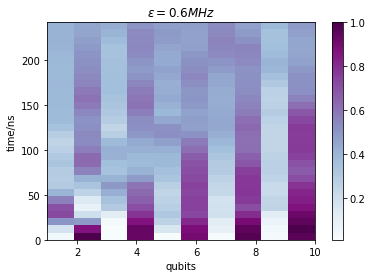

In [101]:
s = np.mean(pop,axis=0)
plt.figure()
extent = [1,10,min(x),max(x)]
plt.imshow(np.abs(s)/np.max(s),aspect='auto',extent=extent,origin='lower',cmap='BuPu')
plt.ylabel('time/ns')
plt.xlabel('qubits')
plt.title('$\epsilon=0.6MHz$')
plt.colorbar()
plt.savefig(r'D:\skzhao\fig\otoc.pdf',dpi=1200)

(-27.61575517945613,
 22.246971792024688,
 -12.98275168771914,
 61.688054807006594)

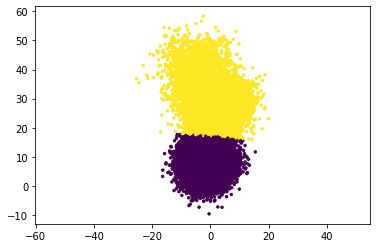

In [86]:
y = s[:,-1,8]
x,z = np.real(y), np.imag(y)
d = list(zip(x,z))
c = measure.predict['q9'](d)
plt.figure()
plt.scatter(np.real(y),np.imag(y),c=c,s=6)
plt.axis('equal')

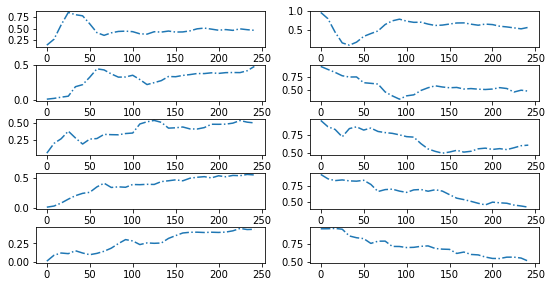

In [115]:
pop = post_selection(measure,s[:,0:,:])
pop = pop.T
num = 10
height = 1
dt = 1/0.12
x = np.arange(0,30*dt,dt)[0:]
n = num // 2 + num % 2
fig, axes = plt.subplots(ncols=2,nrows=n,figsize=(9,height*n))
fig.subplots_adjust(top=0.85,bottom=0.15,hspace=0.5)
v = []
for i in range(num): 
    f, res = x,np.array(pop)[i,:]
#     axes[i//2][i%2].plot(f[:15],res[:15],'-.')
# #     axes[i//2][i%2].plot(f[15],res[15],'o')
#     axes[i//2][i%2].plot(f[15:],res[15:],'r-.')
    axes[i//2][i%2].plot(f,res,'-.')

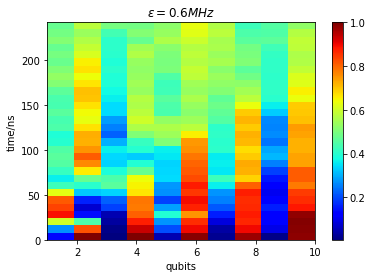

In [116]:
# x = value[0][0]
s = [np.array(pop)[i,:] for i in [0,1,2,3,4,5,6,7,8,9]]
plt.figure()
extent = [1,10,min(x),max(x)]
plt.imshow(np.abs(s).T/np.max(s),aspect='auto',extent=extent,origin='lower',cmap='jet')
plt.ylabel('time/ns')
plt.xlabel('qubits')
plt.title('$\epsilon=0.6MHz$')
plt.colorbar()

In [540]:
np.savez(r'mEcho_classify.npz',s = pop)

In [392]:
x0 = (np.abs(s[:,-1,8]-np.array(center0[8]))<2*np.array(radius0[8]))*1.0
x1 = (np.abs(s[:,-1,8]-np.array(center1[8]))<2*np.array(radius1[8]))*1.0
np.count_nonzero((x0+x1),axis=0)/10000
# pop_sum = np.sum(x1,axis=1)
# pop_q = x1[pop_sum==5,:]
# pop = np.count_nonzero(pop_q,axis=0)/len(pop_sum)
# pop

0.7711

In [366]:
np.shape(x0)

(30000, 10)

In [379]:
x0[0,:]

array([0., 1., 0., 1., 0., 1., 0., 1., 0., 1.])

In [380]:
x1[0,:]

array([1., 0., 0., 0., 1., 0., 1., 0., 1., 0.])

In [381]:
y = x0 + x1
c = np.sum((y == np.array([1]*10))*1,axis=1)
# np.shape(x0[index[:,:]])
np.shape(c[c==10])

(5685,)

In [301]:
np.count_nonzero(pop,axis=0)

array([ 8371,    55,  7089,   383,  9799, 11052,  7637,   855,  9879,
         190], dtype=int64)

In [388]:
center0,center1 = [], []
radius0, radius1 = [], []
for i in measure.postSle:
    center0.append(np.complex(*(measure.postSle[i][0][0])))
    radius0.append(measure.postSle[i][0][1])
    center1.append(np.complex(*(measure.postSle[i][1][0])))
    radius1.append(measure.postSle[i][1][1])

In [235]:
num = eval(q_target[0][1:])-1
# num=0
dt_copy.classify(measure,s_st,target=num,predictexe=True,n_cluster=2)

## seq

In [40]:
# q_target = ['q2']
# # await measure.attinst['com8'].set_att(29)
# await mrw.jpa_switch(measure,'ON')
# job = Job(mrw.threshHold_seq, (measure,q_target,121), tags=q_target, max=2)
# st, s_st_m = await job.done()
# s_st = s_st_m[:,:,0,:]
# num = measure.n
# fig, axes = plt.subplots(ncols=2,nrows=num,figsize=(7,3*num))
# for i in range(measure.n):
#     s_off, s_on = s_st[0,:,i], s_st[1,:,i]
#     data = await mrw.visibility(1,s_off,s_on)
#     ax0 = axes[i][0] if num>1 else axes[i]
#     ax0.plot(np.real(s_off),np.imag(s_off),'.')
#     ax0.plot(np.real(s_on),np.imag(s_on),'.',alpha=0.6)
# #     ax0.plot(np.real(s_on2),np.imag(s_on2),'.',alpha=0.6)
#     ax0.plot(*(data[0][3]),'k--')
#     ax0.plot(*(data[0][4]),'k--')
#     ax0.axis('equal')
#     ax1 = axes[i][1] if num>1 else axes[i+1]
#     for j in data[0][:3]:
#         ax1.plot(j)
#     maxdata = np.max(data[0][2])
#     ax1.hlines(maxdata,0,60,'r','--',label=f'visibility={round(maxdata*100,1)}%')
#     ax1.legend(loc='lower left')
# #     ax1.vlines([0],10,-100)
# #     ax1.hlines([0],-10,100)

# plt.show()

Output()

TypeError: cannot unpack non-iterable NoneType object

In [262]:
q1.delta_ex

-100000000.0

In [17]:
pop = s_st
pop_m = []
for i in range(121):
    pop_m.append(np.array(mrw.readPop(measure,pop[:,i,:]))[:,1])
np.array(pop_m)

array([[0.5, 0. , 0. , ..., 0. , 0. , 0. ],
       [0.5, 0. , 0. , ..., 0. , 0. , 0. ],
       [0.5, 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0.5, 0. , 0. , ..., 0. , 0. , 0. ],
       [0.5, 0. , 0.5, ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]])

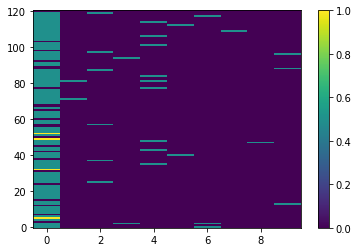

In [20]:
plt.figure()
plt.imshow(np.array(pop_m),aspect='auto',origin='lower')
plt.colorbar()

In [22]:
p = await mrw.seqReadpop(measure,121,repeats=100,classify=False)

In [23]:
np.shape(p)

(100, 121, 10)

## 分类

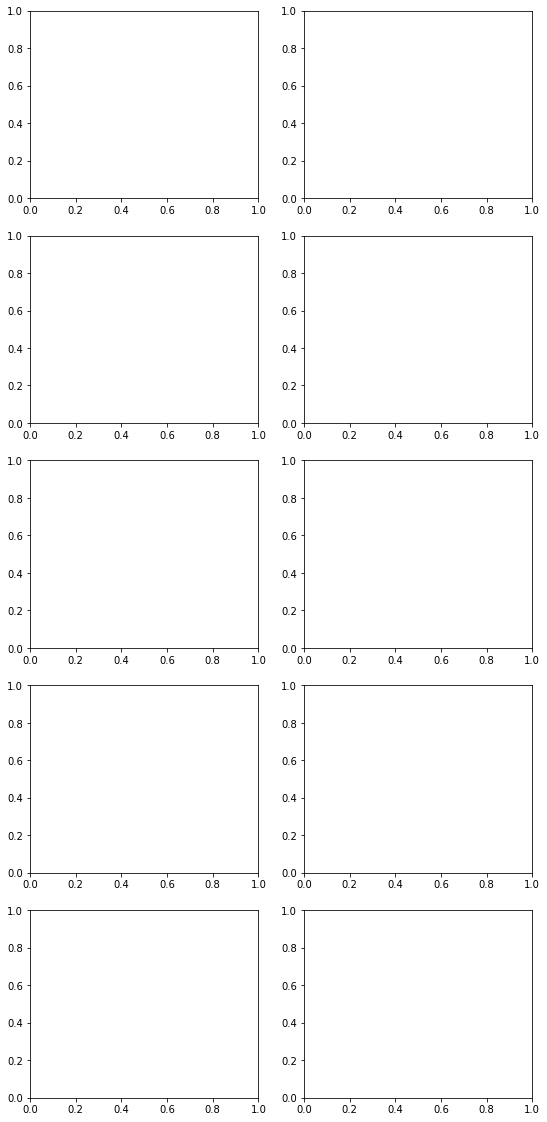

In [389]:
num = eval(q_target[0][1:])-1
num=None
dt.classify(measure,s_st,target=num,predictexe=False)

In [210]:
measure.readmatrix

{'q1': matrix([[0.97216797, 0.09619141],
         [0.02783203, 0.90380859]]), 'q2': matrix([[0.9921875 , 0.07421875],
         [0.0078125 , 0.92578125]]), 'q3': matrix([[0.99169922, 0.07617188],
         [0.00830078, 0.92382812]]), 'q4': matrix([[0.99707031, 0.09326172],
         [0.00292969, 0.90673828]]), 'q5': matrix([[0.98095703, 0.09667969],
         [0.01904297, 0.90332031]]), 'q6': matrix([[0.99365234, 0.08251953],
         [0.00634766, 0.91748047]]), 'q7': matrix([[0.99267578, 0.10058594],
         [0.00732422, 0.89941406]]), 'q8': matrix([[0.99365234, 0.08251953],
         [0.00634766, 0.91748047]]), 'q10': matrix([[0.99316406, 0.14355469],
         [0.00683594, 0.85644531]]), 'q9': matrix([[0.99316406, 0.07519531],
         [0.00683594, 0.92480469]])}

In [83]:
measure.predict

{'q2': <bound method KMeans.predict of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
        n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=None, tol=0.001, verbose=0)>,
 'q8': <bound method KMeans.predict of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
        n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=None, tol=0.001, verbose=0)>,
 'q10': <bound method KMeans.predict of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
        n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=None, tol=0.001, verbose=0)>}

In [205]:
pop = mrw.readPop(measure,s_st[:,:,0,:][1])
np.array(pop)

array([[0.162 , 0.838 ],
       [0.9905, 0.0095],
       [0.972 , 0.028 ],
       [0.981 , 0.019 ],
       [0.9525, 0.0475],
       [0.9895, 0.0105],
       [0.9905, 0.0095],
       [0.993 , 0.007 ],
       [0.9925, 0.0075],
       [0.986 , 0.014 ]])

In [151]:
q_target = q10
await cww.InitInst(measure,psgdc=True,awgch=True,clearwaveseq=[])
task = await mrw.executeZwave(measure,cww.zWave,dcstate={},output=True,during=0/1e9,shift=0e-9)
task_ex = await mrw.executeEXwave(measure,cww.rabiWave,exstate=[q_target.q_name],output=True)
mrw.concurrence([{**task[0],**task_ex[0]},{**task[1],**task_ex[1]}])
measure.delta,measure.base,measure.readlen = q_target.state[1:]
await cww.RecoverInst(measure,state=q_target.state[0])
measure.qubitToread = [q_target.q_name]
measure.readamp = q_target.readamp
measure.ringup = q_target.ringup
measure.ringupamp = q_target.ringupamp
pulse = await cww.modulation_read(measure,measure.delta,readlen=1200,weight=q_target.weight)

In [99]:
measure.f_lo = f_cavity['q5']+20e6

In [342]:
# pulselist = await cww.funcarg(cww.rabiWave,q9,shift=1000/1e9)
# await cww.writeWave(awg133,name=['ch2','ch6'],pulse=pulselist)
# await cww.couldRun(awg133)
pulse1 = await cww.funcarg(cww.zWave,q3,during=2000/1e9,volt=0.0,shift=5000e-9)
# pulse2 = await cww.funcarg(cww.zWave,q2,pi_len=10000/1e9,volt=0,shift=1500e-9)
# pulse = pulse1 + pulse2
# pulse = np.array(pulse1) + np.array(pulse2)
await cww.writeWave(measure,awg132,['ch5'],pulse1)
await cww.couldRun(measure,awg132)

In [821]:
measure.qubits['q1'].zCali = None

In [119]:
state = await cww.QueryInst(measure)
q8.replace(state=[state,measure.delta,measure.base,measure.readlen])
pd.DataFrame(state)

q8      q7      q3      q5      q4      q9      q2      q6  \
ch1         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
ch2         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
ch3         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
ch4         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
ch5         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
ch6         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
ch7         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
ch8         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
error        +0      +0      +0      +0      +0      +0      +0      +0   
freq        NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
load     high Z  high Z  high Z  high Z  high Z  high Z  high Z  high Z   
mform       NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
moutput     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
offset     -1.4   1.436   1.514   1.495   1.522   1.119   1.509   1.558   
output      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
power       NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

            jpa     q10      q1        psg_lo      psg_ex1    psg_trans  \
ch1         NaN     NaN     NaN           NaN          NaN          NaN   
ch2         NaN     NaN     NaN           NaN          NaN          NaN   
ch3         NaN     NaN     NaN           NaN          NaN          NaN   
ch4         NaN     NaN     NaN           NaN          NaN          NaN   
ch5         NaN     NaN     NaN           NaN          NaN          NaN   
ch6         NaN     NaN     NaN           NaN          NaN          NaN   
ch7         NaN     NaN     NaN           NaN          NaN          NaN   
ch8         NaN     NaN     NaN           NaN          NaN          NaN   
error        +0      +0      +0             0            0            0   
freq        NaN     NaN     NaN   6.708133GHz  4.587040GHz  4.599000GHz   
load     high Z  high Z  high Z           NaN          NaN          NaN   
mform       NaN     NaN     NaN           EXT          EXT          EXT   
moutput     NaN     NaN     NaN             0            0            1   
offset   -1.428   1.552   1.388           NaN          NaN          NaN   
output      NaN     NaN     NaN             1            1            0   
power       NaN     NaN     NaN  15.000000dBm  8.000000dBm  3.000000dBm   

             psg_pump awg131 awg132 awg133 awg134  
ch1               NaN     ON     ON     ON    OFF  
ch2               NaN    OFF     ON    OFF    OFF  
ch3               NaN    OFF     ON    OFF    OFF  
ch4               NaN    OFF     ON    OFF    OFF  
ch5               NaN     ON     ON     ON    OFF  
ch6               NaN    OFF     ON    OFF    OFF  
ch7               NaN    OFF     ON    OFF    OFF  
ch8               NaN    OFF     ON    OFF    OFF  
error               0      0      0      0      0  
freq     13.502000GHz    NaN    NaN    NaN    NaN  
load              NaN    NaN    NaN    NaN    NaN  
mform            EXT2    NaN    NaN    NaN    NaN  
moutput             0    NaN    NaN    NaN    NaN  
offset            NaN    NaN    NaN    NaN    NaN  
output              1    RUN    RUN    RUN    RUN  
power     5.240000dBm    NaN    NaN    NaN    NaN

# 优化JPA

In [370]:
q_target = q4
current = np.linspace(-20,20,41)*1e-3 + (-1.428)
pumppower = np.linspace(-20,20,41)*1e-3 + (5.24)
await mrw.jpa_switch(measure,'ON')
job = Job(mrw.optJpa, (measure,current,pumppower,[q_target.q_name]), tags=[q_target.q_name], max=len(current))
st, s_st, s_st_Q = await job.done()

Output()

In [379]:
np.argwhere(s_st_Q[:,:,0]==np.max(s_st_Q))

array([[ 9, 39]], dtype=int64)

In [383]:
current[9], pumppower[39]

(-0.275, 5.259)

# JPA饱和功率

In [260]:
async def SaturationPower(readamp):
    n = measure.n
    for k in readamp:
        measure.readamp = [k]
        await cww.modulation_read(measure,measure.delta,readlen=measure.readlen,repeats=500)
        await cww.couldRun(measure.awg['awgread'])
        sm = []
        for j in ['OFF','ON']:
            await psg_pump.setValue('Output',j)
#             x = await psg_pump.getValue('Output')
#             print(x)
#             time.sleep(0.5)
            ch_A, ch_B,I,Q = await ats.getIQ()
            Am, Bm = ch_A.mean(axis=0),ch_B.mean(axis=0)
            s = Am + 1j*Bm
#             print(j,np.abs(s))
            sm.append(s)
        yield [k]*n, sm[1]/sm[0]

Output()

<IPython.core.display.Javascript object>


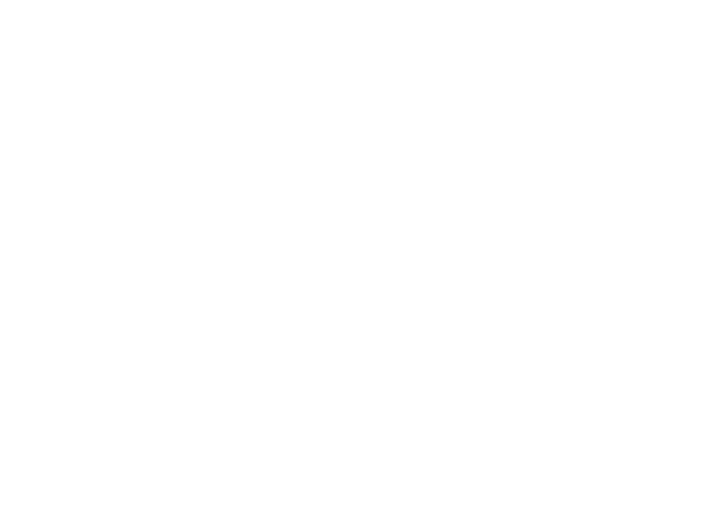

In [262]:
readamp = np.linspace(0.01,0.36,36)
await mrw.jpa_switch(measure,'ON')
await psg_ex1.setValue("Output",'OFF')
job = Job(SaturationPower, (readamp,), tags=['jpa'], max=len(readamp))
a_sp, s_sp = await job.done()
fig = plt.figure(num='jpa')
plt.plot(a_sp,20*np.log10(np.abs(s_sp)),'-o')
# plt.legend(loc=4,labels=['q%d'%(i+1) for i in range(10)])
plt.show()

<IPython.core.display.Javascript object>


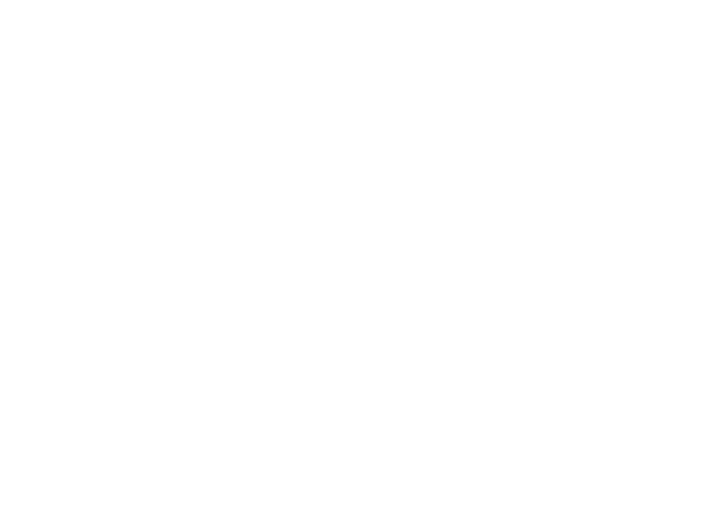

In [152]:
fig = plt.figure(num='jpa')
plt.plot(a_sp,20*np.log10(np.abs(s_sp)),'-.')
# plt.legend(loc=4,labels=['q%d'%(i+1) for i in range(10)])
plt.show()

In [956]:
measure.delta = np.array([30e6,70e6])

# JPA噪声

In [280]:
async def NoiseFreq(freq,Gi, Ga, Th):
    s_on, s_off = [], []
    for j, i in enumerate(freq):
        await psg_lo.setValue('Frequency',i)
        #JPA打开
        await mrw.jpa_switch(measure,'ON')
#         await psg_pump.setValue('Output','ON')
        time.sleep(0.1)
        ch_A, ch_B, I, Q = await ats.getIQ()
        son = ch_A + 1j*ch_B
        s_on.append(son)
#         son /= base[j,0]
        
        #JPA关上
        await mrw.jpa_switch(measure,'OFF')
#         await psg_pump.setValue('Output','OFF')
        time.sleep(0.1)
        ch_A, ch_B, I, Q = await ats.getIQ()
        soff = ch_A + 1j*ch_B
        s_off.append(soff)
#         print(np.shape(son))
#         soff /= base[j,0]
        
#         sigma_on = np.std(np.abs(son),axis=0)
#         sigma_off = np.std(np.abs(soff),axis=0)
        
        sigma_on_r = np.std(np.real(son),axis=0)
        sigma_on_i = np.std(np.imag(son),axis=0)
        sigma_on = np.sqrt(sigma_on_r**2+sigma_on_i**2)
        sigma_off_r = np.std(np.real(soff),axis=0)
        sigma_off_i = np.std(np.imag(soff),axis=0)
        sigma_off = np.sqrt(sigma_off_r**2+sigma_off_i**2)
        Gp = 20*np.log10(np.abs(son.mean(axis=0))/np.abs(soff.mean(axis=0)))
        Y = sigma_on**2 / sigma_off**2
#         print(Gp,Y)
        Tp = (Y - 1) / Gp / Gi / Ga * Th
#         print(Y,Gp)
        yield [i-20e6],Tp
    np.savez('yhs_jpa_cali_test.npz',son=s_on,soff=s_off)

Output()

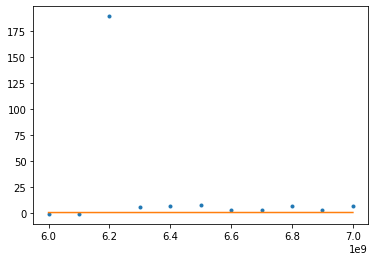

In [281]:
freq = np.linspace(6e9, 7e9, 11) + 20e6
Gi, Ga, Th = -1, -1, 3

await measure.dc['jpa'].DC(jpa.bias)
await psg_pump.setValue('Power',jpa.power_ex)
await psg_pump.setValue('Frequency',jpa.f_ex)
await psg_lo.setValue('Output','ON')
# await cww.modulation_read(measure,np.array([80e6]),tdelay=1500)
pulse = await cww.modulation_read(measure,np.array([20e6]),readlen=1500,weight=None)
await cww.ats_setup(ats,np.array([20e6]),l=1500,repeats=2000)
job = Job(NoiseFreq, (freq,Gi, Ga, Th), tags=['jpa'], max=len(freq))
f_nf, T_nf = await job.done()
from scipy import constants as const
fig  = plt.figure()
plt.plot(f_nf,T_nf,'.')
plt.plot(f_nf[:,0],const.h*f_nf[:,0]/const.k)
plt.show()

# 优化读出功率

In [197]:
data['son']

array([[[ 21.72976648  +5.57403878j],
        [ 10.04953822  -2.66565733j],
        [ 10.26070769  +3.07972038j],
        ...,
        [ 13.04659258 +20.91647659j],
        [ 17.97242963 +10.3860121j ],
        [ 12.49840931  +4.62151502j]],

       [[ 12.86843625  +5.45909662j],
        [ 13.44961209  +1.20597935j],
        [ 11.18475393  +6.4529191j ],
        ...,
        [ 12.63634305  +6.54768385j],
        [ 14.70268313  +8.77176458j],
        [ 11.68651042 +15.52494198j]],

       [[ -0.39461434 +19.44380192j],
        [  3.67662851 +18.93649112j],
        [ -3.4963058  +15.0107133j ],
        ...,
        [  9.75562665  +7.0103888j ],
        [ 10.42613404 +21.85142183j],
        [ 10.22552686  +7.96621396j]],

       ...,

       [[121.04081365  +0.66755347j],
        [101.07594956 +14.92366992j],
        [130.28038075 +16.6375639j ],
        ...,
        [129.17204234 -31.20918019j],
        [119.37463838 -30.95564075j],
        [116.76272187 -33.68715561j]],

       [[120.41

In [197]:
data['son']

array([[[ 21.72976648  +5.57403878j],
        [ 10.04953822  -2.66565733j],
        [ 10.26070769  +3.07972038j],
        ...,
        [ 13.04659258 +20.91647659j],
        [ 17.97242963 +10.3860121j ],
        [ 12.49840931  +4.62151502j]],

       [[ 12.86843625  +5.45909662j],
        [ 13.44961209  +1.20597935j],
        [ 11.18475393  +6.4529191j ],
        ...,
        [ 12.63634305  +6.54768385j],
        [ 14.70268313  +8.77176458j],
        [ 11.68651042 +15.52494198j]],

       [[ -0.39461434 +19.44380192j],
        [  3.67662851 +18.93649112j],
        [ -3.4963058  +15.0107133j ],
        ...,
        [  9.75562665  +7.0103888j ],
        [ 10.42613404 +21.85142183j],
        [ 10.22552686  +7.96621396j]],

       ...,

       [[121.04081365  +0.66755347j],
        [101.07594956 +14.92366992j],
        [130.28038075 +16.6375639j ],
        ...,
        [129.17204234 -31.20918019j],
        [119.37463838 -30.95564075j],
        [116.76272187 -33.68715561j]],

       [[120.41

In [115]:
fig = plt.figure(num='readamp')

<Figure size 432x288 with 0 Axes>

In [861]:
measure.delta

array([90750000., 50000000.])

In [114]:
q_target, which = q10, measure.onwhich
readamp = np.linspace(-0.5*measure.readamp,0.5*measure.readamp,51) + measure.readamp
# await measure.attinst['com8'].set_att(29)
await mrw.jpa_switch(measure,'ON')
for i in ['OFF','ON']:
    ex_lo_state = i
    await measure.psg[q_target.inst['ex_lo']].setValue('Output',ex_lo_state)
    job = Job(mrw.readpowerOpt, (measure,which,readamp), tags=[q_target.q_name], max=len(readamp))
    v_r, pop_r = await job.done()
    plt.figure(num='readamp')
    plt.plot(v_r,pop_r,'-.',label=ex_lo_state)
    plt.legend(loc='best')
    plt.show()

Output()

Output()

In [64]:
measure.readamp 

0.07500000000000001

In [319]:
readamp

array([0.1125, 0.117 , 0.1215, 0.126 , 0.1305, 0.135 , 0.1395, 0.144 ,
       0.1485, 0.153 , 0.1575, 0.162 , 0.1665, 0.171 , 0.1755, 0.18  ,
       0.1845, 0.189 , 0.1935, 0.198 , 0.2025, 0.207 , 0.2115, 0.216 ,
       0.2205, 0.225 , 0.2295, 0.234 , 0.2385, 0.243 , 0.2475, 0.252 ,
       0.2565, 0.261 , 0.2655, 0.27  , 0.2745, 0.279 , 0.2835, 0.288 ,
       0.2925, 0.297 , 0.3015, 0.306 , 0.3105, 0.315 , 0.3195, 0.324 ,
       0.3285, 0.333 , 0.3375])

# Crosstalk矫正

In [19]:
q2.state[1:]

[array([2.3465e+08, 2.1680e+08, 1.9200e+08, 1.7200e+08, 1.4930e+08,
        1.3745e+08, 1.3120e+08, 9.0750e+07, 7.0150e+07, 5.0000e+07]),
 array([-2.02791966+1.98358918j,  0.94964959+0.4076137j ,
         0.45040781-0.96442989j,  0.57294871+1.08435417j,
        -0.65608159+0.8892474j ,  1.49922606+0.18699409j,
         0.27348558-0.38805388j,  0.08288527+1.49532472j,
        -1.98253305+0.78429459j, -0.84952816-2.57848346j]),
 1500]

In [109]:
bits = [q1,q2,q3,q4,q5,q6,q7,q8,q9,q10]

v_rabi = np.linspace(-0.02,0.02,101)
measure.readamp = [0.03]
measure.ringup = [100]
measure.ringupamp = [0.1]
await psg_trans.setValue('Power',2)
for v, k in enumerate(bits[2:3],start=2):
    task = await mrw.executeZwave(measure,cww.zWave,dcstate={},qnum=10,output=True,offset=0,during=0/1e9,shift=3000e-9)
    mrw.concurrence(task)
    count = 0
    q_target = k
    measure.delta,measure.base,measure.readlen = q_target.state[1:]
    await cww.RecoverInst(measure,state=q_target.state[0])
#     measure.delta = measure.delta[v:(v+1)]
    #measure.readamp = 0.3
#     await cww.modulation_read(measure,measure.delta,measure.readlen)
#     await awg133.run()
    await psg[q_target.inst['ex_lo']].setValue('Output','OFF')
    for i,j in enumerate(bits):
        comwave = True if count == 0 else False
        q_bias = j
        if q_bias == q_target:
            continue
        else:
            tag = q_target.q_name + '_' + q_bias.q_name
            print(tag,f_list)
            job = Job(mrw.crosstalkSpec, (measure,v_rabi,[q_bias.q_name],[q_target.q_name],comwave), tags=[tag], max=11)
            v_ex, v_bias, s_sc = await job.done()
            await measure.awg[q_bias.inst['z_awg']].update_waveform(np.zeros((len(measure.t_new),)),f"ch{q_bias.inst['z_ch'][0]}")
            count += 1
            clear_output()
    await cww.InitInst(measure,psgdc=True,awgch=True)
    await measure.awg[q_target.inst['z_awg']].update_waveform(np.zeros((len(measure.t_new),)),f"ch{q_target.inst['z_ch'][0]}")                                                                

In [15]:
measure.n =1

In [60]:
# z_crosstalk = np.ones((10,10))
# z_crosstalk1 = np.ones((10,10))
z_crosstalk1 = np.load(r'crosstalk1.npz')['mat']
z_crosstalk = np.load(r'crosstalk.npz')['mat']

In [74]:
bits = [q1,q2,q3,q4,q5,q6,q7,q8,q9,q10]

# measure.readamp = [0.03]
# measure.ringup = [100]
# measure.ringupamp = [0.1]
for v, k in enumerate(bits[6:7],start=6):
    task = await mrw.executeZwave(measure,cww.zWave,dcstate={},qnum=10,output=True,during=0/1e9,shift=3000e-9)
    mrw.concurrence(task)
    count = 0
    q_target = k
    measure.delta,measure.base,measure.readlen = q_target.state[1:]
    await cww.RecoverInst(measure,state=q_target.state[0])

    await psg[q_target.inst['ex_lo']].setValue('Output','ON')
    for i,j in enumerate(bits[5:6]):
        comwave = True 
        q_bias = j
        t_rabi = np.linspace(0,1000,101)
        if q_bias == q_target:
            v_rabi = np.linspace(-0.01,0.01,251)
            t_col = 150
        else:
            v_rabi = np.linspace(-0.15,0.15,251)
            t_col = 500
        tag = q_target.q_name + '_' + q_bias.q_name
        print(tag)
        
        flux = {i:[0]*len(v_rabi) for i in measure.qubits}
        flux[q_bias.q_name] = v_rabi
        
        job = Job(mrw.Rcscali_single, (measure,v_rabi,t_col,'volt',[q_target.q_name],flux,calimatrix,comwave), tags=[tag],avg=True, max=300)
        v_ex, s_sc = await job.done()
        v, s = v_ex[:,0], np.abs(s_sc[:,0])
        s_smooth = op.RowToRipe().smooth(s,f0=0.2)
        res, func = op.Cos_Fit().fitCos(v[v>0], s[v>0])
        wfft,yt,amp = op.RowToRipe().fourier(v,s)
        paras = res.x
        fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,3))
        x = np.linspace(min(v),max(v),2001)
        bias0 = op.RowToRipe().firstMax(x,func(x,paras),num=0)
        bias1 = op.RowToRipe().firstMax(v,s_smooth,num=0,peakpercent=0.8,insitu=True)
        w = paras[2] if bias0 > 0 else -paras[2]
        wfft = wfft if bias1 > 0 else -wfft
        axes[0].plot(v,s)
        axes[0].plot(bias0,func(bias0,paras),'ro')
        axes[0].plot(bias1,s[dt.nearest(v,bias1)],'ro')
        axes[0].plot(x,func(x,paras))
        axes[0].set_title(f'w={w},bias0={bias0}')
        axes[1].plot(yt,np.abs(amp))
        axes[1].plot(wfft,np.max(np.abs(amp)),'ro')
        axes[1].set_title(f'w={wfft},bias1={bias1}')
        plt.savefig(r'\\QND-SERVER2\skzhao\fig\%s.png'%(tag))
        plt.close()

        row, col = eval(q_target.q_name[1:])-1, eval(q_bias.q_name[1:])-1
        z_crosstalk[row,col] = w
        z_crosstalk1[row,col] = wfft
        await measure.awg[q_bias.inst['z_awg']].update_waveform(np.zeros((len(measure.t_new),)),f"ch{q_bias.inst['z_ch'][0]}")
        count += 1
        clear_output()                                                      
    await cww.InitInst(measure,psgdc=True,awgch=True)

In [89]:
np.savez('crosstalk1.npz',mat=z_crosstalk1)

## 二遍校

In [19]:
bits = [q1,q2,q3,q4,q5,q6,q7,q8,q9,q10]

v_rabi = np.linspace(-0.03,0.03,63)
mat = calimatrix[5:7,5:7]
# mat = None
await psg_trans.setValue('Power',1)
for v, k in enumerate(bits[5:7],start=5):
    task = await mrw.executeZwave(measure,cww.zWave,dcstate={},qnum=10,output=True,offset=0,during=0/1e9,shift=0e-9)
    mrw.concurrence(task)
    count = 0
    q_target = k
    measure.delta,measure.base,measure.readlen = q_target.state[1:]
    await cww.RecoverInst(measure,state=q_target.state[0])
#     measure.delta = measure.delta[v:(v+1)]
    #measure.readamp = 0.3
#     await cww.modulation_read(measure,measure.delta,measure.readlen)
#     await awg133.run()
    await psg[q_target.inst['ex_lo']].setValue('Output','OFF')
    for i,j in enumerate(bits[5:7],start=5):
        comwave = True if count == 0 else False
        q_bias = j
        if q_bias == q_target:
            continue
        else:
            tag = q_target.q_name + '_' + q_bias.q_name
            print(tag,f_list)
            
            job = Job(mrw.crosstalkSpec_second, (measure,v_rabi,[q_bias.q_name],[q_target.q_name],comwave,mat), tags=[tag], max=11)
            v_ex, v_bias, s_sc = await job.done()
            await measure.awg[q_bias.inst['z_awg']].update_waveform(np.zeros((len(measure.t_new),)),f"ch{q_bias.inst['z_ch'][0]}")
            count += 1
            clear_output()
    await cww.InitInst(measure,psgdc=True,awgch=True)
    await measure.awg[q_target.inst['z_awg']].update_waveform(np.zeros((len(measure.t_new),)),f"ch{q_target.inst['z_ch'][0]}")                                                                

In [631]:
calimatrix[6:8,6:8]

matrix([[ 1.        , -0.01433692],
        [ 0.00714499,  1.        ]])

In [630]:
calimatrix[6,7] = -0.01433691756

# 真空拉比

In [203]:
q = q3
dt.biasshift(q.specfuncz,q.f_ex/1e9,(4.3469e9-q.f_ex)/1e9) 

-0.08064420696333174

In [ ]:
0.00313672]), 'q4': array([0.0069358

In [202]:
# q9.offset = 0.01889313
# q10.offset = -0.02147273
q3.offset = 0.00313672
q4.offset = 0.0069358

In [210]:
q4.volt = -0.274

In [185]:
t_rabi, v_rabi = np.linspace(0,200,125), np.linspace(-0.012,0.012,21) + (-0.269471)
# t_rabi = np.array([20])
# v_rabi = np.linspace(0.03,0.06,16)
mode = 'vbroadcast'
for i in [0]:
    imAmp = i
    # await psg[measure.qubits[q_target].inst['ex_lo']].setValue('Frequency',(q_target.f_ex+q_target.delta_ex))
                                                    #电压扫面注意匹配
    job = Job(mrw.T1_2d, (measure,t_rabi,v_rabi,mode,['q1'],['q2'],imAmp,calimatrix[0:2,0:2]), tags=['q1','q2'], max=len(v_rabi))
    vv, tv, sv = await job.done()
    clear_output()

In [442]:
q5.volt

-0.046

## 单条扫电压

In [534]:
q9.volt 

-0.24723061645448152

In [134]:
q1.offset

0

In [133]:
dcstate = {}
dcstate['q1'] = 0
dcstate['q2'] = 0
dcstate['q3'] = 0
dcstate['q4'] = 0
dcstate['q5'] = 0
dcstate['q6'] = 0
dcstate['q7'] = 0
dcstate['q8'] = 0
dcstate['q9'] = 0
dcstate['q10'] = 0

In [80]:
# mat = calimatrix
mat = None
mode = 'vbroadcast'
bits = [q5,q6]
# await cww.InitInst(measure,psgdc=False,awgch=True,clearwaveseq=[])

for k,l in enumerate(bits):
    if k+1 >= len(bits):
        break
    task = await mrw.executeZwave(measure,cww.zWave,dcstate={},\
    calimatrix=calimatrix,output=True,during=0,offset=0,shift=0e-9)
    await mrw.concurrence(task)
    
    qubit_z = l
    qubit_ex = bits[k+1]
    
    t_rabi, v_rabi = 20e-9, np.linspace(-0.02,0.02,101) + qubit_ex.volt
    v_mean, v_big = [], []
    for j in [0]:
#         qubit_ex = measure.qubits[qubit_ex_q_name]   #还是把激励换成调制比特，记得关掉激励
#         qubit_z = measure.qubits[qubit_z.q_name]
        
        volt_offset = j
        flux = {qubit_z.q_name:np.array([qubit_z.volt]*101),qubit_ex.q_name:v_rabi}
#         for i in measure.qubits:
# #             if i == 'q1':
# #                 continue
#             if measure.qubits[i] != qubit_ex and measure.qubits[i] != qubit_z:
#                 flux[i] = np.array([measure.qubits[i].volt + volt_offset]*101)

        task = await mrw.executeEXwave(measure,cww.rabiWave,exstate=[qubit_ex.q_name],shift=t_rabi)
        await mrw.concurrence(task)

        job = Job(mrw.singleVrabi, (measure,v_rabi,t_rabi,mode,flux,[qubit_ex.q_name],mat,2), tags=[qubit_z.q_name,qubit_ex.q_name],avg=True, max=300)
        vv, sv = await job.done()
        num = eval(qubit_z.q_name[1:])-1
        v_big.append(vv[:,num][np.argmax(np.abs(sv[:,num]))])
        num_z = eval(qubit_z.q_name[1:])-1
        num_ex = eval(qubit_ex.q_name[1:])-1
        loc, cost = [], []
        for m in [num_ex,num_z]:
            x, y = vv[:,m], np.abs(sv[:,m])
            func = scipy.interpolate.interp1d(x,y)
            x = np.linspace(min(x),max(x),1001)
            y = func(x)
            y0 = op.RowToRipe().smooth(y,f0=0.2)
            res, func = op.Gaussian_Fit().fitGaussian(x, y0)
            paras = res.x
            loc.append((paras[-1]))
            cost.append(res.fun)
            plt.plot(x,y,'-o',markersize=3)
            plt.plot(x,func(x,paras))
        volt_op = loc[np.argmin(cost)]
        v_mean.append(volt_op)
        plt.vlines(loc,[np.min(y)]*2,[np.max(y)]*2)
        plt.vlines(volt_op,np.min(y),np.max(y),color='r')
        plt.savefig(r'\\QND-SERVER2\skzhao\fig\%s.png'%(''.join((qubit_z.q_name,qubit_ex.q_name,str(volt_offset),'_','singleVrabi'))))
        plt.close()
    qubit_ex.volt = np.mean(v_mean) if np.abs(np.mean(v_mean)-qubit_ex.volt)<0.01 else np.mean(v_big)
    for ch in qubit_ex.inst['ex_ch']:
        await measure.awg[qubit_ex.inst['ex_awg']].output_off(ch=ch)
    clear_output()

In [138]:
volt_o = {}
for i in measure.qubits:
    volt_o[i] = measure.qubits[i].volt
volt_o

{'q1': -0.032518651675439825,
 'q2': -0.2511532821580229,
 'q3': -0.0816684974182772,
 'q4': -0.2772486007259128,
 'q5': -0.04860521701635315,
 'q6': -0.4779939142119326,
 'q7': -0.18471440004526352,
 'q8': -0.3603192063969736,
 'q9': -0.2496317334991085,
 'q10': -0.10620460902071899}

In [513]:
num = eval(qubit_z.q_name[1:])-1
vv[:,num][np.argmax(np.abs(sv[:,num]))]

-0.18210283668923052

In [547]:
volt_op

-0.2494415834927907

In [548]:
v_big = -0.24907743250173103
v_small = -0.2494415834927907
v = (v_big+v_small)/2
v

-0.24925950799726088

In [549]:
q2.volt = v

In [551]:

task = await mrw.executeZwave(measure,cww.zWave,dcstate=dcstate,\
    calimatrix=calimatrix,output=True,during=(len(measure.t_new)/2.5/2e9+2000e-9),offset=0,shift=0e-9)
mrw.concurrence(task)

In [259]:
volt_ovolt_o = {}
for i in measure.qubits:
    volt_o[i] = measure.qubits[i].volt
volt_o
# for i in measure.qubits:
#     measure.qubits[i].volt = volt_o[i] 

{'q1': -0.0308442,
 'q2': -0.24930775971091107,
 'q3': -0.07905155153064314,
 'q4': -0.27348824090293206,
 'q5': -0.045279852474836346,
 'q6': -0.4749874885915557,
 'q7': -0.18190283668923055,
 'q8': -0.35834377443212395,
 'q9': -0.24796067985225587,
 'q10': -0.10453645059112582}

In [53]:
volt_o = {}
for i in measure.qubits:
    volt_o[i] = measure.qubits[i].volt
volt_o

{'q1': -0.0308442,
 'q2': -0.24936207548012956,
 'q3': -0.07940877170107705,
 'q4': -0.27435644948023763,
 'q5': -0.04610772964848461,
 'q6': -0.4757874885915559,
 'q7': -0.1819939823765367,
 'q8': -0.35807541721873976,
 'q9': -0.2473487706999513,
 'q10': -0.10439848502721466}

In [433]:
volt_o = {}
for i in measure.qubits:
    volt_o[i] = measure.qubits[i].volt
volt_o

-0.045079852474836354

In [29]:
volt_o = {'q1': -0.0308442,
 'q2': -0.24930775971091107,
 'q3': -0.07985155153064334,
 'q4': -0.27308824090293216,
 'q5': -0.046079852474836314,
 'q6': -0.4757874885915559,
 'q7': -0.18310283668923083,
 'q8': -0.3599437744321241,
 'q9': -0.24996067985225573,
 'q10': -0.10493645059112588}

In [30]:
for i in measure.qubits:
    measure.qubits[i].volt = volt_o[i] 

In [21]:
x = ['1','2']
x.index('1')

0

## 单条扫时间

In [ ]:
t_rabi, v_rabi = np.linspace(0,100,101), -0.061

mode = 'vbroadcast'
imAmp = 0
dcstate, exstate = ['q10'], ['q9']

task_z = await executeZseq(measure,cww.Z_sequence,len_data,True,mode=mode,dcstate=dcstate,\
    v_or_t=t_rabi/1e9,arg='during',volt=j,delta_im=0e6,imAmp=imAmp)
concurrence(task_z)
job = Job(rabi_seq, (measure,t_rabi,'shift',exstate,True,True,mode), tags=exstate, max=300,avg=True)
t_t, s_t = await job.done()

## 根号iswap

In [178]:
t_rabi = np.arange(0,100,0.4)

dcstate, exstate = ['q5'], ['q6']
mat = None

task = await mrw.executeZwave(measure,cww.zWave,dcstate={},\
    calimatrix=None,output=True,during=0,offset=0,shift=0e-9)
await mrw.concurrence(task)
job = Job(mrw.iswap_sqrt, (measure,t_rabi,dcstate,exstate,mat,True,2000), tags=(exstate+dcstate),no_bar=True)
t_t, s_t = await job.done()

Output()

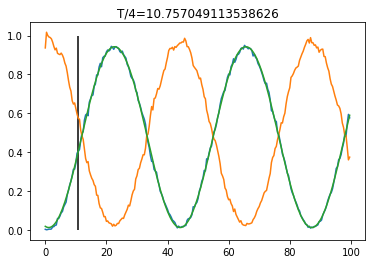

In [183]:
n0, n1 = eval(dcstate[0][1:])-1, eval(exstate[0][1:])-1
res, f = op.Cos_Fit(phi=phi).fitCos(t_t[:,0],s_t[:,0])
A, C, W, phi = res.x
plt.figure()
# plt.plot(t_t[:,n0],s_t[:,n0])
# plt.plot(t_t[:,n1],s_t[:,n1])
plt.plot(t_t,s_t)
plt.plot(t_t[:,0],f(t_t[:,0],res.x))
plt.vlines(1/W/4,0,1)
plt.title(f'T/4={1/W/4}')
plt.show()

In [143]:

q5.volt_swap, q6.volt_swap

(0.07390652281121662, -0.366761198495942)

In [128]:
q5.volt_swap = 0.07390652281121662
q6.volt_swap = -0.366761198495942

# 纵场调制

In [44]:
q3.phaseim = 0
q4.phaseim = 0
# q10.f_ex = q10.f_ex - 158.75e6

In [345]:
q4.f_ex - 288.67e6

4463330000.0

In [117]:
q4.f_ex - 693.1e6

4058900000.0

In [296]:
# q3.f_ex=4.5e9
q4.f_ex=4752000000.0

In [15]:
t_rabi, v_rabi = np.linspace(0,250,251), np.linspace(0,0.4,41)
mode = 'vbroadcast'
job = Job(mrw.vModulation, (measure,t_rabi,v_rabi,mode,['q10'],['q9'],calimatrix), tags=['dc-q10','ex-q9'], max=len(v_rabi))
vv, tv, sv = await job.done()
clear_output()

## population

In [ ]:
offset = {'q1':}
volt = {'q1':-0.0308442}
imAmp = {}
alpha = {'q1':}

In [ ]:
#临界判断，耦合比特的激励是否关掉

In [228]:
t_rabi, v_rabi = np.linspace(0,200,125), np.linspace(0,0.6,41)*2*np.pi
# t_rabi, v_rabi = np.linspace(0,200,121), np.linspace(-0.01,0.01,21) + (-0.19) + 0.00210173
caliM = calimatrix[2:4,2:4]
delta_im = 120e6
f_target = 4.3469e9                                          #第一个是辅助的，第二个是加纵场的
job = Job(mrw.vModulation_pop, (measure,f_target,t_rabi,v_rabi,['q4'],['q3'],caliM), tags=[f'{delta_im/1e6}MHz','dc-q3','ex-q3'], max=len(v_rabi))
vv, tv, sv = await job.done()
# clear_output()

Output()

In [108]:
q5.offset,q6.offset

(-0.01011432, 0.00264779)

In [109]:
q5.phaseim,q6.phaseim

(0, 0)

In [17]:
q6.dressenergy(0.6)

array(4.35828571)

In [111]:
q5.volt,q6.volt

(-0.046857240613031946, -0.476411)

In [84]:
dcstate = {}
# dcstate = {i: round(measure.qubits[i].T_bias[1]+measure.qubits[i].T_bias[0]/2,3) for i in measure.qubits}
dcstate['q1'] = -1.125    #-1.901
dcstate['q2'] = -0.285
dcstate['q3'] = -0.433
dcstate['q4'] = -0.02
dcstate['q5'] = -0.39
dcstate['q6'] = 0.233
dcstate['q7'] = -0.645
dcstate['q8'] = -0.818
dcstate['q9'] = -0.503
dcstate['q10'] = -0.671

In [17]:
for i in range(10):
    measure.qubits[f'q{i+1}'].imAmpn = 0

In [147]:
mat = calimatrix
mode = 'vbroadcast'
imAmp = 0
bits = [q1,q2,q3,q4,q5,q6,q7,q8,q9,q10]
await cww.InitInst(measure,psgdc=False,awgch=True,clearwaveseq=[])
await psg_ex1.setValue('Moutput','OFF')
for k,l in enumerate(bits):
    if k+1 >= len(bits):
        break
    if k%2 != 0 :
        continue
#     await mrw.dcManage(measure,dcstate=dcstate,readstate=[],calimatrix=calimatrix)
    task = await mrw.executeZwave(measure,cww.zWave,dcstate={},\
    calimatrix=calimatrix,output=True,during=(len(measure.t_new)/2.5/2e9),offset=0,shift=0e-9)
    await mrw.concurrence(task)
    
#     qubit_z = l
#     qubit_ex = bits[k+1]
    
    qubit_ex = l
    qubit_z = bits[k+1]     #qubit_z必须小
    
    t_rabi, v_rabi = 20e-9, np.linspace(-0.02,0.02,101) + qubit_ex.volt
    v_mean, v_big = [], []
    for j in [-0.4]:
        
        volt_offset = j
        flux = {qubit_z.q_name:np.array([qubit_z.volt]*101),qubit_ex.q_name:v_rabi}
        for i in measure.qubits:
            if measure.qubits[i] != qubit_ex and measure.qubits[i] != qubit_z:
                flux[i] = np.array([measure.qubits[i].volt + volt_offset]*101)

        task = await mrw.executeEXwave(measure,cww.rabiWave,exstate=[qubit_ex.q_name],shift=t_rabi)
        await mrw.concurrence(task)

        job = Job(mrw.singleVrabi, (measure,v_rabi,t_rabi,mode,flux,[qubit_ex.q_name],None), tags=[qubit_z.q_name,qubit_ex.q_name],avg=True, max=300)
        vv, sv = await job.done()
        num = eval(qubit_z.q_name[1:])-1
        v_big.append(vv[:,num][np.argmax(np.abs(sv[:,num]))])
        num_z = eval(qubit_z.q_name[1:])-1
        num_ex = eval(qubit_ex.q_name[1:])-1
        loc, cost = [], []
        for m in [num_ex,num_z]:
            x, y = vv[:,m], np.abs(sv[:,m])
            func = scipy.interpolate.interp1d(x,y)
            x = np.linspace(min(x),max(x),1001)
            y = func(x)
            y0 = op.RowToRipe().smooth(y,f0=0.2)
            res, func = op.Gaussian_Fit().fitGaussian(x, y0)
            paras = res.x
            loc.append((paras[-1]))
            cost.append(res.fun)
            plt.plot(x,y,'-o',markersize=3)
            plt.plot(x,func(x,paras))
        volt_op = loc[np.argmin(cost)]
        v_mean.append(volt_op)
        plt.vlines(loc,[np.min(y)]*2,[np.max(y)]*2)
        plt.vlines(volt_op,np.min(y),np.max(y),color='r')
        plt.savefig(r'\\QND-SERVER2\skzhao\fig\%s.png'%(''.join((qubit_z.q_name,qubit_ex.q_name,str(volt_offset),'_','singleVrabi'))))
        plt.close()
    qubit_ex.volt = np.mean(v_mean) if np.abs(np.mean(v_mean)-qubit_ex.volt)<0.01 else np.mean(v_big)
    task = await mrw.executeZwave(measure,cww.zWave,dcstate={i:-0.5 for i in measure.qubits},\
    calimatrix=calimatrix,output=True,during=(len(measure.t_new)/2.5/2e9),offset=0,shift=0e-9)
    await mrw.concurrence(task)
    
    t_rabi, v_rabi = np.linspace(0,200,125), np.linspace(0,0.6,31)*2*np.pi
    row,col = eval(qubit_z.q_name[1:])-1, eval(qubit_ex.q_name[1:])
#     caliM = calimatrix[row:col,row:col]
    caliM = calimatrix[row::2,row::2][0:2,0:2]
#     print(caliM)
    delta_im = 120e6
    f_target = 4.3469e9                                          #第一个是辅助的，第二个是加纵场的
    job = Job(mrw.vModulation_pop, (measure,f_target,t_rabi,v_rabi,[qubit_z.q_name],[qubit_ex.q_name],caliM),\
              tags=[f'{delta_im/1e6}MHz',qubit_z.q_name,qubit_ex.q_name], max=len(v_rabi))
    vv, tv, sv = await job.done()
    
    for ch in qubit_ex.inst['ex_ch']:
        await measure.awg[qubit_ex.inst['ex_awg']].output_off(ch=ch)
#     clear_output()
await psg_ex1.setValue('Moutput','ON')

{'shift': 1.1547507639928379e-07, 'pi_len': 1e-05}


Output()

(-0.3441917466384247, 1.770364228280827, 0.0072000000000000675, -0.24726000000000012)
(0.3441917466384247, 1.770364228280827, 0.0072000000000000675, -0.24726000000000012)
(-0.3441917466384247, 1.770364228280827, 0.0072000000000000675, -0.24726000000000012)
(0.3441917466384247, 1.770364228280827, 0.0072000000000000675, -0.24726000000000012)
(-0.3401681482166058, 1.770364228280827, 0.007160000000000055, -0.2472800000000002)
(0.3401681482166058, 1.770364228280827, 0.007160000000000055, -0.2472800000000002)
(0.27139074106695094, 0.9752423189713898, 0.006720000000000087, -0.24742000000000017)
(-0.27139074106695094, 0.9752423189713898, 0.006720000000000087, -0.24742000000000017)
(0.27139074106695094, 0.9752423189713898, 0.006720000000000087, -0.24742000000000017)
(-0.27139074106695094, 0.9752423189713898, 0.006720000000000087, -0.24742000000000017)
(0.27139074106695094, 0.9752423189713898, 0.006720000000000087, -0.24742000000000017)
(-0.27139074106695094, 0.9752423189713898, 0.00672000000000

Output()

In [60]:
qname = [f'q{i+1}' for i in range(10)]
pd.DataFrame(calimatrix,columns=qname,index=qname)

q1        q2        q3        q4        q5        q6        q7  \
q1   1.000000  0.001435  0.023069  0.004969 -0.001232 -0.006000 -0.006000   
q2  -0.004953  1.000000 -0.018141 -0.007228 -0.000870  0.005108  0.006264   
q3  -0.004272 -0.016736  1.000000 -0.006661 -0.001728  0.003721  0.005729   
q4  -0.004688 -0.009825 -0.024868  1.000000 -0.002780  0.003121  0.005715   
q5  -0.004117 -0.007450 -0.013711 -0.018912  1.000000  0.001267  0.005946   
q6  -0.004773 -0.007309 -0.012000 -0.010616 -0.017743  1.000000  0.012252   
q7   0.004213  0.005755  0.008748  0.007327  0.007841  0.013468  1.000000   
q8   0.004409  0.005715  0.007837  0.006580  0.006504  0.007145  0.003268   
q9   0.004000  0.005087  0.006788  0.005752  0.005709  0.006532  0.004533   
q10 -0.003923 -0.004530 -0.006309 -0.005327 -0.006114 -0.007640 -0.006476   

           q8        q9       q10  
q1  -0.003465 -0.005134 -0.003624  
q2   0.003556  0.005729  0.004000  
q3   0.003708  0.006282  0.004271  
q4   0.004412  0.007709  0.004759  
q5   0.004836  0.008369  0.004489  
q6   0.007197  0.011316  0.005498  
q7  -0.014320 -0.014597 -0.006114  
q8   1.000000 -0.026362 -0.006966  
q9  -0.002082  1.000000 -0.007683  
q10  0.001364  0.020969  1.000000

# 矫正相位

In [113]:
q8.phaseim 

0

In [121]:
phase = np.linspace(0,2*np.pi,101)
caliM = calimatrix[2:4,2:4]
delta_im = 120e6
f_target = 4.3469e9  
t_rabi = np.linspace(0,200,125)
imAmp = 2*np.pi*0.35                                                 #第二个加纵场，扫其相位，第一个的相位默认
job = Job(mrw.phaseCali,(measure,f_target,t_rabi,imAmp,phase,['q10'],['q9'],caliM),tags=[f'{delta_im/1e6}MHz','dc-q4','ex-q93'],max=300,avg=True)
pv,tv, sv = await job.done()

Output()

# 扫台阶高度看频率失真

In [843]:
caliM = calimatrix[6:8,6:8]
delta_im = 120e6
f_target = 4.3469e9  
t_rabi = np.linspace(0,200,125)
imAmp = 2*np.pi*0.35                                         #第二个加纵场

job = Job(mrw.scanZ_pop,(measure,f_target,imAmp,t_rabi,['q8'],['q7'],caliM),tags=[f'{delta_im/1e6}MHz','dc-q7','ex-q7'],max=7)
pv,tv, sv = await job.done()

Output()

In [844]:
q7.volt,q8.volt

(array(-0.161), -0.3572)

In [553]:
measure.qubits['q5'].volt

-0.0474

# 矫正频率

In [115]:
q4.replace(nwave=1,seqtype='PDD',detune=2e6)

In [114]:
# -0.0654
t_run = np.linspace(0,50,101) 
job = Job(mrw.freqCali,(measure,t_run,'vbroadcast',['q3'],['q4'],caliM),tags=['dc-q4','ex-q4'],max=300,avg=True)
pv, sv = await job.done()

Output()

In [113]:
q3.volt = 0

In [195]:
bias

array([1.32968163e-06, 1.32968163e-06, 1.32968163e-06, ...,
       1.32968163e-06, 1.32968163e-06, 1.32968163e-06])

In [201]:
dt.biasshift(q10.specfuncz,fc,0)

1.3296816263608235e-06

In [203]:
0.32882

3.0517578125e-05

In [79]:
0.337695/0.12*0.878779

2.4080009231666666

# 动力学局域化

In [136]:
def func_b(x,paras):
    alpha, a = paras
    return a*np.abs(scipy.special.jv(0,alpha*x))

In [332]:
amp = {'q3':0.931741,'q5':0.883307,'q7':0.921462,'q9':0.908394}

In [182]:
for i in range(10):
    measure.qubits[f'q{i+1}'].imAmp = 0
    measure.qubits[f'q{i+1}'].imAmpn = 0
    measure.qubits[f'q{i+1}'].imAmp_off = 0

In [11]:
q1.imAmp/2/np.pi

0.23157044219870773

In [222]:
q = q9
value_bessel = 0.4/q.bessel[0]
v_m = func_b(value_bessel/0.12,(q.bessel[0],q.bessel[1]))
q.imAmp  = 2*np.pi*value_bessel
v_m,value_bessel

(3.775413391763258, 0.44074309715612947)

In [365]:
q = q10
q.imAmp  = 2*np.pi*value_bessel

In [218]:
q=q10
q.imAmpn = q.imAmp

In [67]:
q = q9
q.imAmp_off = 2*np.pi*q.bessel[-1]

In [108]:
for i in measure.qubits:
    print(i,measure.qubits[i].imAmp,measure.qubits[i].imAmpn,measure.qubits[i].imAmp_off)

q1 1.455 2.8794 0
q2 0 0 0
q3 -1.4132 -2.7826 0
q4 0 0 0
q5 1.4899 2.9453 0
q6 0 0 0
q7 -1.4363 -2.8147 0
q8 0 0 0
q9 1.4491 2.8638 0
q10 0 0 0


In [42]:
volt_o = {}
for i in measure.qubits:
    volt_o[i] = measure.qubits[i].volt
volt_o

{'q1': -0.0314,
 'q2': -0.2508,
 'q3': -0.0819,
 'q4': -0.2759,
 'q5': -0.0486,
 'q6': -0.4775,
 'q7': -0.1849,
 'q8': -0.359,
 'q9': -0.2499,
 'q10': -0.1065}

In [24]:
flux_im = {f'q{i+1}':0 for i in range(10)}
flux_im['q1'] = -0.5
f_o = await mrw.zManage(measure,flux_im,calimatrix=calimatrix,qnum=10)

In [191]:
[-0.0316, -0.2514, -0.0816, -0.2762, -0.0482, -0.4783, -0.184 ,
       -0.3604, -0.2507, -0.1064]

-0.0022144949263532034

In [127]:
q1.volt = 0.1

In [143]:
q5.volt= -0.0482

In [144]:
q6.volt = -0.4783

In [ ]:
f_target = 4.3469e9
t_rabi = np.linspace(0,200,61)
dcstate = ['q2','q3','q4','q5','q6','q7','q8','q9','q10']
exstate = ['q6']
center = np.max(t_rabi)
caliM = calimatrix[0:10,0:10]
v_res = np.linspace(-0.005,0.005,11) + measure.qubits[exstate[0]].volt
imAmp_res = [measure.qubits[exstate[0]].imAmp]
for i in imAmp_res[:1]:
    measure.qubits[exstate[0]].imAmp = i
    job = Job(mrw.dLocalization_check,(measure,f_target,center,t_rabi,dcstate,exstate,caliM,True,v_res),\
              tags=(exstate+[str(i)]+[str(measure.qubits[i].volt) for i in measure.qubits]),max=len(v_res))
    v, td, pop_d = await job.done()
    clear_output()

Output()

In [26]:
q1.volt = -0.3

In [236]:
f_target = 4.3469e9
t_rabi = np.linspace(0,200,121)
dcstate = ['q1','q2','q3','q4','q5','q6','q7','q8','q9','q10']
exstate = ['q6']
center = np.max(t_rabi)
caliM = calimatrix[0:10,0:10]
job = Job(mrw.dLocalization,(measure,f_target,center,t_rabi,dcstate,exstate,caliM,True),\
          tags=(['ex-q6','400MHz','600']+[str(measure.qubits[i].volt) for i in measure.qubits]),no_bar=True)
td, pop_d = await job.done()
gc.collect()

Output()

0

In [272]:
imAmp = np.arange(0,0.45,0.04)
f_target = 4.3469e9
t_rabi = np.linspace(0,300,121)
dcstate = ['q1','q2','q3','q4','q5','q6','q7','q8','q9','q10']
exstate = ['q6']
center = np.max(t_rabi)
caliM = calimatrix[0:10,0:10]
for i in imAmp:
    for q in [q3,q5,q7,q9]:
        value_bessel = i/q.bessel[0]
        v_m = func_b(value_bessel/0.12,(q.bessel[0],q.bessel[1]))
        q.imAmp  = 2*np.pi*value_bessel
    print(i)
    job = Job(mrw.dLocalization,(measure,f_target,center,t_rabi,dcstate,exstate,caliM,True),title='dLocalization_imAmp',\
              tags=(['ex-q6']+[str(i),'3000']+[str(measure.qubits[i].volt) for i in measure.qubits]),no_bar=True)
    td, pop_d = await job.done()
    gc.collect()

0.0


Output()

0.04


Output()

0.08


Output()

0.12


Output()

0.16


Output()

TypeError: cannot unpack non-iterable NoneType object

In [74]:
q1.delta_ex = -100e6

In [24]:
f_target = 4.3469e9 + np.linspace(-4,10,15)*1e6
t_rabi = np.linspace(0,300,121)
dcstate = ['q1','q2','q3','q4','q5','q6','q7','q8','q9','q10']
exstate = ['q1']
center = np.max(t_rabi)
caliM = calimatrix[0:10,0:10]
for i in f_target:
    
    print(i)
    job = Job(mrw.dLocalization,(measure,i,center,t_rabi,dcstate,exstate,caliM,True),title='dLocalization_ftarget',\
              tags=(['ex-q1','240MHz']+[str(i/1e9)]+[str(measure.qubits[i].volt) for i in measure.qubits]),no_bar=True)
    td, pop_d = await job.done()
    gc.collect()

4342900000.0


Output()

4343900000.0


Output()

4344900000.0


Output()

4345900000.0


Output()

4346900000.0


Output()

4347900000.0


Output()

4348900000.0


Output()

4349900000.0


Output()

4350900000.0


Output()

4351900000.0


Output()

4352900000.0


Output()

4353900000.0


Output()

4354900000.0


Output()

4355900000.0


Output()

4356900000.0


Output()

In [257]:
q1.delta_ex = -100e6

In [123]:
# v = [ '-0.0319', '-0.2511', '-0.0816', '-0.2765', '-0.0485', '-0.4787', '-0.1846', '-0.3608', '-0.2504', '-0.1058']
v=[-0.0316, -0.2514, -0.0816, -0.2762, -0.0482, -0.4783, -0.184 ,
       -0.3604, -0.2507, -0.1064]      #10bit quantum walk
for j,i in enumerate(measure.qubits):
    measure.qubits[i].volt = v[j]

In [236]:
ret.x

array([-0.2509, -0.0818, -0.2765, -0.0478, -0.4777, -0.1845, -0.361 ,
       -0.25  , -0.1067])

In [89]:
ret.x

array([-0.2507, -0.082 , -0.2766, -0.0478, -0.4774, -0.1844, -0.3607,
       -0.2501, -0.1066])

In [90]:
v=[-0.3, -0.2507, -0.082 , -0.2766, -0.0478, -0.4774, -0.1844, -0.3607,
       -0.2501, -0.1066]         #q2-q10   120Mhz
for j,i in enumerate(measure.qubits):
    measure.qubits[i].volt = v[j]

In [234]:
ret.x

array([-0.2509, -0.082 , -0.2762, -0.0479, -0.4774, -0.1846, -0.3598,
       -0.2502, -0.1069])

In [227]:
v=[-0.3, -0.2509, -0.0816, -0.2764, -0.0478, -0.4777, -0.1846, -0.361 ,
       -0.2501, -0.1065]          #q2-q10  240Mhz
for j,i in enumerate(measure.qubits):
    measure.qubits[i].volt = v[j]

In [235]:
v=[-0.3,-0.2509, -0.082 , -0.2762, -0.0479, -0.4774, -0.1846, -0.3598,
       -0.2502, -0.1069]          #q2-q10  400Mhz
for j,i in enumerate(measure.qubits):
    measure.qubits[i].volt = v[j]

In [60]:
volt_o = {}
for i in measure.qubits:
    volt_o[i] = measure.qubits[i].volt
volt_o

{'q1': -0.0319,
 'q2': -0.2511,
 'q3': -0.0816,
 'q4': -0.2765,
 'q5': -0.0485,
 'q6': -0.4787,
 'q7': -0.1846,
 'q8': -0.3608,
 'q9': -0.2504,
 'q10': -0.1058}

## 自动优化1

In [230]:
s_dLocalization = np.load(r'D:\skzhao\Data\qWalk\q6_400.npz')['value']

In [231]:
np.shape(s_dLocalization)

(121, 9)

In [232]:
async def findResonator1(v2,v3,v4,v5,v6,v7,v8,v9,v10):
    paras = v2,v3,v4,v5,v6,v7,v8,v9,v10
    print(paras)
    for j,i in enumerate(range(9)):
        measure.qubits[f'q{i+2}'].volt = paras[j]
    job = Job(mrw.dLocalization,(measure,f_target,np.max(t_rabi),t_rabi,dcstate,exstate,caliM,True),title="d_test",\
              tags=(['ex-q6','400MHz']+[str(measure.qubits[i].volt) for i in measure.qubits]),no_bar=True)
    td, pop_d = await job.done()
    pop_d /= np.max(pop_d)
    res = np.sum((pop_d[:,1:]-s_dLocalization)**2)

    return res

In [233]:
t_rabi = np.linspace(0,200,121)
dcstate = ['q1','q2','q3','q4','q5','q6','q7','q8','q9','q10']
exstate = ['q6']
caliM = calimatrix[0:10,0:10]
f_target=4.3469e9
start = [measure.qubits[i].volt for i in measure.qubits]
del start[0]
senstive = [0.0005]*9
high = np.array(start)+0.005
low = np.array(start)-0.005
ret = opt.optimize(findResonator1,start,senstive,[4]*9,high=high,low=low,print_info=True)

(-0.2509, -0.0816, -0.2764, -0.0478, -0.4777, -0.1846, -0.361, -0.2501, -0.1065)


Output()

.o
[-0.2509 -0.0816 -0.2764 -0.0478 -0.4777 -0.1846 -0.361  -0.2501 -0.1065] 7.918182156050275   (-0.2504, -0.0816, -0.2764, -0.0478, -0.4777, -0.1846, -0.361, -0.2501, -0.1065)


Output()

.(-0.2509, -0.0811, -0.2764, -0.0478, -0.4777, -0.1846, -0.361, -0.2501, -0.1065)


Output()

.(-0.2509, -0.0816, -0.2759, -0.0478, -0.4777, -0.1846, -0.361, -0.2501, -0.1065)


Output()

.o
[-0.2509 -0.0816 -0.2759 -0.0478 -0.4777 -0.1846 -0.361  -0.2501 -0.1065] 5.038527577517631   (-0.2509, -0.0816, -0.2764, -0.0473, -0.4777, -0.1846, -0.361, -0.2501, -0.1065)


Output()

.(-0.2509, -0.0816, -0.2764, -0.0478, -0.4772, -0.1846, -0.361, -0.2501, -0.1065)


Output()

.(-0.2509, -0.0816, -0.2764, -0.0478, -0.4777, -0.1841, -0.361, -0.2501, -0.1065)


Output()

.(-0.2509, -0.0816, -0.2764, -0.0478, -0.4777, -0.1846, -0.3605, -0.2501, -0.1065)


Output()

.(-0.2509, -0.0816, -0.2764, -0.0478, -0.4777, -0.1846, -0.361, -0.2496, -0.1065)


Output()

.(-0.2509, -0.0816, -0.2764, -0.0478, -0.4777, -0.1846, -0.361, -0.2501, -0.106)


Output()

.(-0.2514, -0.0815, -0.2763, -0.0477, -0.4776, -0.1845, -0.3609, -0.25, -0.1064)


Output()

.(-0.2507, -0.0816, -0.2764, -0.0478, -0.4777, -0.1846, -0.361, -0.2501, -0.1065)


Output()

.(-0.2508, -0.0821, -0.2763, -0.0477, -0.4776, -0.1845, -0.3609, -0.25, -0.1064)


Output()

.(-0.2508, -0.0817, -0.2763, -0.0477, -0.4776, -0.1845, -0.3609, -0.2506, -0.1064)


Output()

.(-0.2511, -0.0818, -0.2763, -0.0477, -0.4776, -0.1845, -0.3609, -0.2502, -0.1064)


Output()

.(-0.2509, -0.0818, -0.2762, -0.0482, -0.4775, -0.1844, -0.3608, -0.2502, -0.1063)


Output()

.(-0.2509, -0.0818, -0.2762, -0.0478, -0.4775, -0.1844, -0.3608, -0.2502, -0.1063)


Output()

.(-0.2509, -0.0819, -0.2761, -0.0478, -0.4774, -0.1849, -0.3607, -0.2503, -0.1062)


Output()

.(-0.2509, -0.0819, -0.276, -0.0478, -0.4773, -0.1845, -0.3606, -0.2503, -0.1067)


Output()

.o
[-0.2509 -0.0819 -0.276  -0.0478 -0.4773 -0.1845 -0.3606 -0.2503 -0.1067] 4.223640593370339   (-0.251, -0.0821, -0.2759, -0.0478, -0.4772, -0.1844, -0.3605, -0.2504, -0.1071)


Output()

.(-0.2509, -0.082, -0.276, -0.0478, -0.4779, -0.1845, -0.3606, -0.2503, -0.1063)


Output()

.(-0.2507, -0.0819, -0.276, -0.048, -0.4776, -0.1846, -0.3606, -0.2502, -0.1064)


Output()

.(-0.2509, -0.082, -0.276, -0.0481, -0.4776, -0.1846, -0.3606, -0.2498, -0.1064)


Output()

.o
[-0.2509 -0.082  -0.276  -0.0481 -0.4776 -0.1846 -0.3606 -0.2498 -0.1064] 3.8726826797650604   (-0.251, -0.0821, -0.2758, -0.0482, -0.4776, -0.1847, -0.3604, -0.2494, -0.1065)


Output()

.(-0.2509, -0.0819, -0.276, -0.0475, -0.4777, -0.1847, -0.3606, -0.2501, -0.1065)


Output()

.(-0.2509, -0.0816, -0.2758, -0.0479, -0.4776, -0.1847, -0.3604, -0.2503, -0.1065)


Output()

.(-0.2509, -0.0818, -0.2759, -0.0479, -0.4777, -0.1849, -0.3605, -0.2501, -0.1067)


Output()

.(-0.2508, -0.0818, -0.2759, -0.0479, -0.4779, -0.1844, -0.3605, -0.2501, -0.1068)


Output()

.(-0.2509, -0.082, -0.2755, -0.0479, -0.4776, -0.1846, -0.3607, -0.2502, -0.1066)


Output()

.(-0.2509, -0.0821, -0.2759, -0.0479, -0.4776, -0.1846, -0.3601, -0.2502, -0.1066)


Output()

.o
[-0.2509 -0.0821 -0.2759 -0.0479 -0.4776 -0.1846 -0.3601 -0.2502 -0.1066] 3.318470933126538   (-0.2508, -0.0824, -0.2759, -0.0479, -0.4775, -0.1846, -0.3597, -0.2503, -0.1067)


Output()

.o
[-0.2508 -0.0824 -0.2759 -0.0479 -0.4775 -0.1846 -0.3597 -0.2503 -0.1067] 3.19650350900824   (-0.2509, -0.0821, -0.2759, -0.0479, -0.4773, -0.1849, -0.3605, -0.2503, -0.1063)


Output()

.(-0.2509, -0.0818, -0.2759, -0.0479, -0.4777, -0.1845, -0.3605, -0.2501, -0.1067)


Output()

.(-0.2509, -0.0818, -0.2764, -0.0478, -0.4776, -0.1846, -0.3602, -0.2502, -0.1065)


Output()

.(-0.2511, -0.082, -0.2759, -0.0477, -0.4777, -0.1847, -0.3602, -0.2501, -0.1067)


Output()

.(-0.2509, -0.0818, -0.276, -0.0478, -0.4774, -0.1849, -0.3602, -0.25, -0.1069)


Output()

.o
[-0.2509 -0.0818 -0.276  -0.0478 -0.4774 -0.1849 -0.3602 -0.25   -0.1069] 3.174354057473656   (-0.2509, -0.0818, -0.276, -0.0479, -0.4771, -0.1851, -0.36, -0.2498, -0.1072)


Output()

.(-0.2509, -0.0823, -0.2762, -0.0477, -0.4776, -0.1846, -0.3602, -0.2499, -0.1068)


Output()

.o
[-0.2509 -0.0823 -0.2762 -0.0477 -0.4776 -0.1846 -0.3602 -0.2499 -0.1068] 3.059870623333881   (-0.2508, -0.0827, -0.2763, -0.0476, -0.4776, -0.1846, -0.3601, -0.2497, -0.107)


Output()

.(-0.251, -0.082, -0.2761, -0.0482, -0.4775, -0.1846, -0.36, -0.2501, -0.1068)


Output()

.(-0.2509, -0.0821, -0.276, -0.048, -0.4779, -0.1849, -0.3598, -0.2498, -0.1066)


Output()

.(-0.2509, -0.082, -0.276, -0.0478, -0.4775, -0.1846, -0.3604, -0.2502, -0.1067)


Output()

.(-0.251, -0.0822, -0.2762, -0.0479, -0.4774, -0.1844, -0.36, -0.25, -0.1067)


Output()

.(-0.2507, -0.0821, -0.2762, -0.0481, -0.4774, -0.1845, -0.3602, -0.25, -0.1067)


Output()

.(-0.2508, -0.0822, -0.2762, -0.0478, -0.4774, -0.1846, -0.3597, -0.2503, -0.107)


Output()

.o
[-0.2508 -0.0822 -0.2762 -0.0478 -0.4774 -0.1846 -0.3597 -0.2503 -0.107 ] 2.6271510652753176   (-0.2507, -0.0823, -0.2763, -0.0477, -0.4774, -0.1845, -0.3593, -0.2506, -0.1073)


Output()

.(-0.2511, -0.082, -0.276, -0.0476, -0.4777, -0.1847, -0.36, -0.2502, -0.1068)


Output()

.(-0.2509, -0.0824, -0.2757, -0.0479, -0.4774, -0.1846, -0.36, -0.2501, -0.1071)


Output()

.(-0.2509, -0.0819, -0.2762, -0.0478, -0.4776, -0.1846, -0.3601, -0.2501, -0.1067)


Output()

.o
[-0.2509 -0.0819 -0.2762 -0.0478 -0.4776 -0.1846 -0.3601 -0.2501 -0.1067] 2.602545382097025   (-0.2509, -0.0822, -0.2761, -0.0479, -0.4776, -0.1846, -0.3597, -0.2501, -0.1069)


Output()

.(-0.2507, -0.0822, -0.2762, -0.0481, -0.4774, -0.1845, -0.36, -0.25, -0.1068)


Output()

.(-0.2508, -0.0822, -0.2761, -0.048, -0.4775, -0.1846, -0.36, -0.25, -0.1068)


Output()

.(-0.2508, -0.082, -0.276, -0.0479, -0.4777, -0.1849, -0.3601, -0.2502, -0.1069)


Output()

.(-0.2509, -0.0822, -0.2761, -0.0479, -0.4775, -0.1845, -0.36, -0.2501, -0.1068)


Output()

.(-0.2509, -0.0824, -0.2763, -0.048, -0.4773, -0.1847, -0.3595, -0.2501, -0.1069)


Output()

.(-0.2509, -0.082, -0.276, -0.0479, -0.4776, -0.1846, -0.3602, -0.2501, -0.1067)


Output()

.(-0.2508, -0.0822, -0.2761, -0.0475, -0.4775, -0.1846, -0.36, -0.2501, -0.1068)


Output()

.(-0.2509, -0.0818, -0.2764, -0.0477, -0.4775, -0.1846, -0.3603, -0.2499, -0.107)


Output()

.(-0.2508, -0.0823, -0.276, -0.0479, -0.4775, -0.1846, -0.3599, -0.2502, -0.1067)


Output()

.(-0.251, -0.082, -0.2761, -0.0482, -0.4775, -0.1846, -0.3601, -0.2501, -0.1068)


Output()

.(-0.2508, -0.0822, -0.2761, -0.0477, -0.4775, -0.1846, -0.36, -0.2501, -0.1068)


Output()

.(-0.2508, -0.0825, -0.2762, -0.0478, -0.4777, -0.1843, -0.3598, -0.2502, -0.1067)


Output()

.(-0.2509, -0.082, -0.2761, -0.0478, -0.4774, -0.1847, -0.3601, -0.25, -0.1069)


Output()

.o
[-0.2509 -0.082  -0.2761 -0.0478 -0.4774 -0.1847 -0.3601 -0.25   -0.1069] 2.558371335043306   (-0.2508, -0.0819, -0.2761, -0.048, -0.4774, -0.1846, -0.3597, -0.2504, -0.1068)


Output()

.o
[-0.2508 -0.0819 -0.2761 -0.048  -0.4774 -0.1846 -0.3597 -0.2504 -0.1068] 2.5182347242541407   (-0.2508, -0.0817, -0.276, -0.0482, -0.4774, -0.1845, -0.3594, -0.2506, -0.1068)


Output()

.(-0.2509, -0.0819, -0.2762, -0.0479, -0.4775, -0.1846, -0.36, -0.2501, -0.1069)


Output()

.o
[-0.2509 -0.0819 -0.2762 -0.0479 -0.4775 -0.1846 -0.36   -0.2501 -0.1069] 2.5008726983583234   (-0.2509, -0.0817, -0.2763, -0.0479, -0.4775, -0.1845, -0.3601, -0.25, -0.1069)


Output()

.(-0.2509, -0.0819, -0.2761, -0.0477, -0.4776, -0.1846, -0.3599, -0.2503, -0.1068)


Output()

.(-0.2509, -0.0821, -0.2763, -0.0478, -0.4774, -0.1846, -0.3596, -0.2502, -0.1069)


Output()

.(-0.2509, -0.0821, -0.2762, -0.0478, -0.4774, -0.1846, -0.3598, -0.2502, -0.1069)


Output()

.o
[-0.2509 -0.0821 -0.2762 -0.0478 -0.4774 -0.1846 -0.3598 -0.2502 -0.1069] 2.40767566785638   (-0.2509, -0.0819, -0.2762, -0.048, -0.4775, -0.1846, -0.3598, -0.2502, -0.1069)


Output()

.(-0.2509, -0.0818, -0.2762, -0.0479, -0.4774, -0.1846, -0.3601, -0.2503, -0.1068)


Output()

.(-0.2509, -0.0819, -0.2762, -0.0479, -0.4774, -0.1846, -0.36, -0.2503, -0.1068)


Output()

.(-0.2508, -0.0818, -0.2762, -0.0478, -0.4775, -0.1847, -0.3598, -0.2504, -0.1069)


Output()

.(-0.2509, -0.0821, -0.2762, -0.0479, -0.4775, -0.1845, -0.36, -0.2501, -0.1068)


Output()

.o
[-0.2509 -0.0821 -0.2762 -0.0479 -0.4775 -0.1845 -0.36   -0.2501 -0.1068] 2.3665855091142367   (-0.2508, -0.082, -0.2762, -0.0481, -0.4774, -0.1846, -0.3599, -0.2501, -0.1068)


Output()

.(-0.2509, -0.082, -0.2762, -0.0478, -0.4775, -0.1846, -0.3599, -0.2502, -0.1068)


Output()

.(-0.251, -0.0818, -0.2761, -0.048, -0.4775, -0.1846, -0.3601, -0.25, -0.1066)


Output()

.(-0.2508, -0.0821, -0.2762, -0.0478, -0.4775, -0.1846, -0.3598, -0.2503, -0.1069)


Output()

.(-0.2509, -0.0821, -0.2762, -0.0479, -0.4775, -0.1846, -0.3599, -0.2502, -0.1068)


Output()

.o
[-0.2509 -0.0821 -0.2762 -0.0479 -0.4775 -0.1846 -0.3599 -0.2502 -0.1068] 2.3481754466674563   (-0.2509, -0.082, -0.2762, -0.0479, -0.4774, -0.1846, -0.36, -0.2502, -0.1068)


Output()

..(-0.2509, -0.082, -0.2762, -0.0479, -0.4775, -0.1846, -0.36, -0.2501, -0.1068)


Output()

.(-0.2509, -0.082, -0.2761, -0.048, -0.4775, -0.1846, -0.3598, -0.2503, -0.1068)


Output()

.(-0.2509, -0.082, -0.2762, -0.048, -0.4775, -0.1846, -0.3599, -0.2502, -0.1068)


Output()

.(-0.2509, -0.082, -0.2761, -0.0479, -0.4775, -0.1846, -0.36, -0.2501, -0.1068)


Output()

.(-0.2509, -0.082, -0.2762, -0.0479, -0.4775, -0.1846, -0.3601, -0.2501, -0.1067)


Output()

.(-0.2509, -0.0821, -0.2762, -0.0478, -0.4775, -0.1845, -0.3598, -0.2502, -0.1069)


Output()

.(-0.2509, -0.082, -0.2761, -0.0479, -0.4774, -0.1845, -0.3598, -0.2502, -0.1069)


Output()

.(-0.2509, -0.0821, -0.2762, -0.0478, -0.4775, -0.1846, -0.36, -0.2501, -0.1069)


Output()

.(-0.2509, -0.0821, -0.2762, -0.0478, -0.4774, -0.1846, -0.36, -0.2501, -0.1069)


Output()

.(-0.2509, -0.082, -0.2762, -0.0479, -0.4775, -0.1846, -0.3599, -0.2502, -0.1068)


Output()

.(-0.2509, -0.082, -0.2762, -0.0479, -0.4775, -0.1845, -0.3598, -0.2502, -0.1069)


Output()

..(-0.2509, -0.0821, -0.2762, -0.0479, -0.4774, -0.1845, -0.3598, -0.2502, -0.1069)


Output()

..(-0.2509, -0.0821, -0.2761, -0.0479, -0.4774, -0.1846, -0.36, -0.2501, -0.1068)


Output()

.(-0.2509, -0.082, -0.2762, -0.0479, -0.4775, -0.1845, -0.3599, -0.2502, -0.1069)


Output()

.(-0.2509, -0.082, -0.2762, -0.0479, -0.4775, -0.1846, -0.3599, -0.2501, -0.1068)


Output()

.(-0.2509, -0.0821, -0.2762, -0.0479, -0.4775, -0.1846, -0.3599, -0.2502, -0.1069)


Output()

.(-0.2509, -0.0821, -0.2762, -0.0478, -0.4775, -0.1846, -0.3599, -0.2501, -0.1069)


Output()

.(-0.2509, -0.0821, -0.2762, -0.0479, -0.4775, -0.1846, -0.3599, -0.2501, -0.1068)


Output()

...(-0.2509, -0.0821, -0.2762, -0.0479, -0.4774, -0.1846, -0.3598, -0.2502, -0.1069)


Output()

....(-0.2509, -0.0821, -0.2762, -0.0478, -0.4775, -0.1846, -0.3599, -0.2502, -0.1069)


Output()

.(-0.2509, -0.082, -0.2762, -0.0479, -0.4775, -0.1846, -0.3598, -0.2502, -0.1068)


Output()

..(-0.2509, -0.082, -0.2762, -0.0479, -0.4774, -0.1846, -0.3598, -0.2502, -0.1069)


Output()

.o
[-0.2509 -0.082  -0.2762 -0.0479 -0.4774 -0.1846 -0.3598 -0.2502 -0.1069] 2.33025339357011   (-0.2509, -0.082, -0.2762, -0.0479, -0.4774, -0.1846, -0.3598, -0.2503, -0.1069)


Output()

.(-0.2509, -0.082, -0.2762, -0.0479, -0.4774, -0.1846, -0.3599, -0.2502, -0.1068)


Output()

......(-0.2509, -0.082, -0.2762, -0.0478, -0.4775, -0.1846, -0.3599, -0.2501, -0.1068)


Output()

..(-0.2509, -0.082, -0.2762, -0.0479, -0.4775, -0.1846, -0.3598, -0.2502, -0.1069)


Output()

....(-0.2509, -0.082, -0.2762, -0.0479, -0.4774, -0.1846, -0.3598, -0.2502, -0.1068)


Output()

.......................
 CacheInfo(hits=40, misses=108, maxsize=128, currsize=108)


In [131]:
# imAmp_120 = {}
# for i in measure.qubits:
#     imAmp_120[i] = measure.qubits[i].imAmp
# imAmp_120

{'q1': 0.8345076636364814,
 'q2': 0,
 'q3': 0.8091120127234747,
 'q4': 0,
 'q5': 0.8474725124835553,
 'q6': 0,
 'q7': 0.8273146131408368,
 'q8': 0,
 'q9': 0.8253810881106954,
 'q10': 0}

In [130]:
q3.imAmp=0.8091120127234747

In [157]:
q.q_name

'q3'

In [470]:
# imAmp_240 = {}
# for i in measure.qubits:
#     imAmp_240[i] = measure.qubits[i].imAmp
# imAmp_240

{'q1': 0,
 'q2': 0,
 'q3': 1.6182240254469493,
 'q4': 0,
 'q5': 1.706759960473306,
 'q6': 0,
 'q7': 1.643137795524529,
 'q8': 0,
 'q9': 1.6608700137372572,
 'q10': 0}

In [79]:
# imAmp_400 = {}
# for i in measure.qubits:
#     imAmp_400[i] = measure.qubits[i].imAmp
# imAmp_400

{'q1': 0,
 'q2': 0,
 'q3': 2.6970400424115826,
 'q4': 0,
 'q5': 2.8540898421592815,
 'q6': 0,
 'q7': 2.7292148048217766,
 'q8': 0,
 'q9': 2.776193728672948,
 'q10': 0}

# SSH

In [498]:
ret.x

array([-0.0316, -0.2508, -0.0819, -0.2764, -0.048 , -0.478 , -0.1841,
       -0.3606, -0.2497, -0.1064])

In [499]:
v=[-0.0316, -0.2508, -0.0819, -0.2764, -0.048 , -0.478 , -0.1841,
       -0.3606, -0.2497, -0.1064]          #q-q10  Non
for j,i in enumerate(measure.qubits):
    measure.qubits[i].volt = v[j]

In [510]:
f_target = 4.3469e9
t_rabi = np.linspace(0,200,121)
dcstate = ['q1','q2','q3','q4','q5','q6','q7','q8','q9','q10']
exstate = ['q1']
center = np.max(t_rabi)
caliM = calimatrix[0:10,0:10]
job = Job(mrw.dLocalization,(measure,f_target,center,t_rabi,dcstate,exstate,caliM,True),title='SSH',\
          tags=(['ex-q1','120*1.3MHz']+[str(measure.qubits[i].volt) for i in measure.qubits]),no_bar=True)
td, pop_d = await job.done()
gc.collect()

Output()

0

# quantum walk

In [152]:
q5.volt = -0.049

In [268]:
t_rabi = np.linspace(0,200,121)
dcstate = ['q1','q2','q3','q4','q5','q6','q7','q8','q9','q10']
exstate = ['q6']
caliM = calimatrix[0:10,0:10]
job = Job(mrw.qWalk,(measure,t_rabi,dcstate,exstate,caliM,True),\
          tags=(['ex-q6','0MHz']+[str(measure.qubits[i].volt) for i in measure.qubits]),no_bar=True)
td, pop_q = await job.done()

Output()

In [82]:
q1.delta_ex = -300e6

In [188]:
ret.x

array([-0.0316, -0.2514, -0.0816, -0.2762, -0.0482, -0.4783, -0.184 ,
       -0.3604, -0.2507, -0.1064,  4.3469])

In [97]:
q1.amp

0.19841

In [101]:
q1.amp = 0.19841

In [275]:
volt_o = {}
for i in measure.qubits:
    volt_o[i] = measure.qubits[i].volt
volt_o 

{'q1': -0.0316,
 'q2': -0.2514,
 'q3': -0.0816,
 'q4': -0.2762,
 'q5': -0.0482,
 'q6': -0.4783,
 'q7': -0.184,
 'q8': -0.3604,
 'q9': -0.2507,
 'q10': -0.1064}

In [228]:
volt_o = {}
for i in measure.qubits:
    volt_o[i] = measure.qubits[i].volt
volt_o 

{'q1': -0.0323,
 'q2': -0.251,
 'q3': -0.0816,
 'q4': -0.2766,
 'q5': -0.0483,
 'q6': -0.4781,
 'q7': -0.1846,
 'q8': -0.3612,
 'q9': -0.2506,
 'q10': -0.1062}

In [46]:
volt_o = {}
for i in measure.qubits:
    volt_o[i] = measure.qubits[i].volt
volt_o

{'q1': -0.0319,
 'q2': -0.2511,
 'q3': -0.0816,
 'q4': -0.2765,
 'q5': -0.0485,
 'q6': -0.4787,
 'q7': -0.1846,
 'q8': -0.3608,
 'q9': -0.2504,
 'q10': -0.1058}

## 自动优化

In [35]:
s_qWalk = np.load(r'D:\skzhao\Data\qWalk\qWalk_q1_10.npz')['value']

In [36]:
np.shape(s_qWalk)

(121, 10)

In [31]:
volt_o = {}
for i in measure.qubits:
    volt_o[i] = measure.qubits[i].volt
volt_o 

{'q1': -0.0316,
 'q2': -0.2514,
 'q3': -0.0816,
 'q4': -0.2762,
 'q5': -0.0482,
 'q6': -0.4783,
 'q7': -0.184,
 'q8': -0.3604,
 'q9': -0.2507,
 'q10': -0.1064}

In [ ]:
 '-0.0308442', '-0.24936207548012956', '-0.07940877170107705', '-0.274', '-0.04610772964848461', '-0.4757874885915559',
    '-0.18245', '-0.3581', '-0.2484', '-0.10439848502721466'

In [138]:
v = [-0.0308442,-0.24936207548012956,-0.07940877170107705,-0.274,-0.04610772964848461,\
     -0.4757874885915559,-0.18245,-0.3581,-0.2484,-0.10439848502721466]

q1.volt = v[0]

In [37]:
async def findResonator(v1,v2,v3,v4,v5,v6,v7,v8,v9,v10):
    paras = v1,v2,v3,v4,v5,v6,v7,v8,v9,v10
    print(paras)
    for j,i in enumerate(range(10)):
        measure.qubits[f'q{i+1}'].volt = paras[j]
    job = Job(mrw.qWalk,(measure,t_rabi,dcstate,exstate,caliM,True),\
              tags=(['ex-q1','0MHz']+[str(measure.qubits[i].volt) for i in measure.qubits]),no_bar=True)
    td, pd = await job.done()
    pd /= np.max(pd)
    res = np.sum((pd[:,0:]-s_qWalk)**2)
#     res = 0
#     for i in range(9):
#         j=i+1
#         res += np.sum((pd[:,j]-s_qWalk[:,i])**2)
#     res = 0
#     for i in [1,2,3,4]:
#         j = 10 - i
#         res += np.sum((pd[:,i] - pd[:,j])**2)
    return res

In [106]:
q1.volt=-0.5

In [38]:
t_rabi = np.linspace(0,200,121)
dcstate = ['q1','q2','q3','q4','q5','q6','q7','q8','q9','q10']
exstate = ['q1']
caliM = calimatrix[0:10,0:10]
num = 10
start = [measure.qubits[i].volt for i in measure.qubits]
# del start[0]
senstive = [0.0005]*num
high = np.array(start)+0.005
low = np.array(start)-0.005
ret = opt.optimize(findResonator,start,senstive,[4]*num,high=high,low=low,print_info=True)

(-0.0316, -0.2514, -0.0816, -0.2762, -0.0482, -0.4783, -0.184, -0.3604, -0.2507, -0.1064)


Output()

.o
[-0.0316 -0.2514 -0.0816 -0.2762 -0.0482 -0.4783 -0.184  -0.3604 -0.2507
 -0.1064] 7.724831608379679   (-0.0311, -0.2514, -0.0816, -0.2762, -0.0482, -0.4783, -0.184, -0.3604, -0.2507, -0.1064)


Output()

.o
[-0.0311 -0.2514 -0.0816 -0.2762 -0.0482 -0.4783 -0.184  -0.3604 -0.2507
 -0.1064] 7.302743888993161   (-0.0316, -0.2509, -0.0816, -0.2762, -0.0482, -0.4783, -0.184, -0.3604, -0.2507, -0.1064)


Output()

.o
[-0.0316 -0.2509 -0.0816 -0.2762 -0.0482 -0.4783 -0.184  -0.3604 -0.2507
 -0.1064] 6.597422909649428   (-0.0316, -0.2514, -0.0811, -0.2762, -0.0482, -0.4783, -0.184, -0.3604, -0.2507, -0.1064)


Output()

.(-0.0316, -0.2514, -0.0816, -0.2757, -0.0482, -0.4783, -0.184, -0.3604, -0.2507, -0.1064)


Output()

.(-0.0316, -0.2514, -0.0816, -0.2762, -0.0477, -0.4783, -0.184, -0.3604, -0.2507, -0.1064)


Output()

.(-0.0316, -0.2514, -0.0816, -0.2762, -0.0482, -0.4778, -0.184, -0.3604, -0.2507, -0.1064)


Output()

.(-0.0316, -0.2514, -0.0816, -0.2762, -0.0482, -0.4783, -0.1835, -0.3604, -0.2507, -0.1064)


Output()

.(-0.0316, -0.2514, -0.0816, -0.2762, -0.0482, -0.4783, -0.184, -0.3599, -0.2507, -0.1064)


Output()

.(-0.0316, -0.2514, -0.0816, -0.2762, -0.0482, -0.4783, -0.184, -0.3604, -0.2502, -0.1064)


Output()

.(-0.0316, -0.2514, -0.0816, -0.2762, -0.0482, -0.4783, -0.184, -0.3604, -0.2507, -0.1059)


Output()

.(-0.0315, -0.2513, -0.0815, -0.2761, -0.0481, -0.4782, -0.1845, -0.3603, -0.2506, -0.1063)


Output()

.(-0.0315, -0.2513, -0.0815, -0.2761, -0.0487, -0.4782, -0.1841, -0.3603, -0.2506, -0.1063)


Output()

.(-0.0315, -0.2513, -0.0815, -0.2761, -0.0483, -0.4788, -0.1841, -0.3603, -0.2506, -0.1063)


Output()

.(-0.0314, -0.2512, -0.0814, -0.2766, -0.0483, -0.4783, -0.1841, -0.3602, -0.2505, -0.1062)


Output()

.(-0.0315, -0.2513, -0.0815, -0.2763, -0.0484, -0.4785, -0.1836, -0.3603, -0.2506, -0.1063)


Output()

.(-0.0314, -0.2512, -0.0814, -0.2763, -0.0484, -0.4784, -0.184, -0.3602, -0.2511, -0.1062)


Output()

.(-0.0315, -0.2513, -0.0815, -0.2764, -0.0478, -0.4786, -0.1839, -0.3603, -0.2508, -0.1063)


Output()

.o
[-0.0315 -0.2513 -0.0815 -0.2764 -0.0478 -0.4786 -0.1839 -0.3603 -0.2508
 -0.1063] 6.136011998379146   (-0.0315, -0.2513, -0.0815, -0.2766, -0.0474, -0.4788, -0.1837, -0.3603, -0.2509, -0.1063)


Output()

.(-0.0314, -0.2512, -0.0814, -0.2763, -0.0482, -0.4785, -0.1839, -0.3602, -0.2507, -0.1062)


Output()

.(-0.0313, -0.2511, -0.0813, -0.2764, -0.0482, -0.4786, -0.1839, -0.3601, -0.2507, -0.1067)


Output()

.(-0.0313, -0.2511, -0.0813, -0.2764, -0.0483, -0.4786, -0.1839, -0.3607, -0.2507, -0.1063)


Output()

.o
[-0.0313 -0.2511 -0.0813 -0.2764 -0.0483 -0.4786 -0.1839 -0.3607 -0.2507
 -0.1063] 5.973550519147311   (-0.0311, -0.2509, -0.0811, -0.2765, -0.0483, -0.4788, -0.1839, -0.361, -0.2507, -0.1062)


Output()

.(-0.0318, -0.251, -0.0812, -0.2764, -0.0483, -0.4787, -0.1839, -0.3602, -0.2507, -0.1062)


Output()

.(-0.0313, -0.2509, -0.0817, -0.2765, -0.0483, -0.4787, -0.1839, -0.3602, -0.2507, -0.1062)


Output()

.(-0.0316, -0.2511, -0.0815, -0.2764, -0.0483, -0.4786, -0.1839, -0.3604, -0.2507, -0.1065)


Output()

.(-0.0314, -0.2511, -0.0814, -0.2763, -0.0482, -0.4785, -0.1839, -0.3602, -0.2507, -0.1062)


Output()

.(-0.0311, -0.2513, -0.0817, -0.2763, -0.0482, -0.4784, -0.184, -0.3604, -0.2507, -0.1064)


Output()

.(-0.0316, -0.2511, -0.0813, -0.2764, -0.0483, -0.4786, -0.1839, -0.3602, -0.2507, -0.1063)


Output()

.(-0.0314, -0.251, -0.0814, -0.2767, -0.0482, -0.4783, -0.1837, -0.3603, -0.2509, -0.1064)


Output()

.(-0.0316, -0.2511, -0.0816, -0.2765, -0.0482, -0.4784, -0.1839, -0.3605, -0.2508, -0.1059)


Output()

.(-0.0315, -0.2513, -0.0815, -0.2761, -0.0483, -0.4787, -0.1841, -0.3603, -0.2506, -0.1061)


Output()

.(-0.0314, -0.2509, -0.0814, -0.2764, -0.048, -0.4786, -0.1843, -0.3603, -0.2509, -0.1061)


Output()

.(-0.0315, -0.2512, -0.0815, -0.2763, -0.0483, -0.4785, -0.1838, -0.3603, -0.2507, -0.1063)


Output()

.(-0.0313, -0.2512, -0.0817, -0.2763, -0.0482, -0.4784, -0.184, -0.3604, -0.2507, -0.1061)


Output()

.(-0.0314, -0.2512, -0.0816, -0.2763, -0.0482, -0.4785, -0.184, -0.3604, -0.2507, -0.1062)


Output()

.(-0.0314, -0.2511, -0.0814, -0.2764, -0.0483, -0.4786, -0.1838, -0.3605, -0.2507, -0.1063)


Output()

.(-0.0314, -0.2512, -0.0814, -0.2764, -0.048, -0.4786, -0.1839, -0.3605, -0.2508, -0.1063)


Output()

.(-0.0314, -0.2511, -0.0814, -0.2764, -0.0482, -0.4785, -0.1839, -0.3606, -0.2508, -0.1061)


Output()

.(-0.0313, -0.2511, -0.0813, -0.2764, -0.0483, -0.4786, -0.1839, -0.3604, -0.2507, -0.1063)


Output()

.(-0.0313, -0.251, -0.0815, -0.2764, -0.0483, -0.4787, -0.1839, -0.3604, -0.2507, -0.1062)


Output()

.(-0.0314, -0.2512, -0.0814, -0.2762, -0.0483, -0.4787, -0.184, -0.3605, -0.2507, -0.1062)


Output()

.(-0.0314, -0.251, -0.0814, -0.2763, -0.0482, -0.4785, -0.184, -0.3605, -0.2507, -0.1063)


Output()

.o
[-0.0314 -0.251  -0.0814 -0.2763 -0.0482 -0.4785 -0.184  -0.3605 -0.2507
 -0.1063] 5.708726606185869   (-0.0313, -0.2511, -0.0813, -0.2763, -0.0483, -0.4785, -0.1839, -0.3604, -0.2509, -0.1062)


Output()

.(-0.0313, -0.2511, -0.0813, -0.2765, -0.0483, -0.4785, -0.184, -0.3604, -0.2506, -0.1062)


Output()

.(-0.0314, -0.2511, -0.0813, -0.2764, -0.0483, -0.4786, -0.1839, -0.3604, -0.2507, -0.1063)


Output()

.(-0.0313, -0.251, -0.0813, -0.2764, -0.0482, -0.4786, -0.184, -0.3605, -0.2508, -0.1062)


Output()

.(-0.0314, -0.2512, -0.0812, -0.2763, -0.0482, -0.4784, -0.184, -0.3606, -0.2507, -0.1062)


Output()

.(-0.0314, -0.2512, -0.0813, -0.2763, -0.0483, -0.4785, -0.1839, -0.3605, -0.2507, -0.1063)


Output()

.(-0.0314, -0.2511, -0.0813, -0.2764, -0.0482, -0.4786, -0.184, -0.3605, -0.2508, -0.1062)


Output()

.(-0.0314, -0.251, -0.0813, -0.2765, -0.0482, -0.4784, -0.1839, -0.3605, -0.2508, -0.1063)


Output()

.(-0.0313, -0.251, -0.0815, -0.2765, -0.0483, -0.4786, -0.1839, -0.3604, -0.2508, -0.1063)


Output()

TypeError: cannot unpack non-iterable NoneType object

In [108]:
ret.x

array([-0.2499, -0.0804, -0.275 , -0.047 , -0.4764, -0.1831, -0.3603,
       -0.2497, -0.1054])

In [ ]:
v = [-0.0323, -0.2515, -0.0817, -0.2771, -0.0485, -0.4781, -0.1846, -0.3603, -0.2496, -0.1062]

In [109]:
v = [-0.5, -0.2499, -0.0804, -0.275 , -0.047 , -0.4764, -0.1831, -0.3603,
       -0.2497, -0.1054]

In [110]:
# v = {'q1': -0.032518651675439825,
#  'q2': -0.2511532821580229,
#  'q3': -0.0816684974182772,
#  'q4': -0.2772486007259128,
#  'q5': -0.04860521701635315,
#  'q6': -0.4779939142119326,
#  'q7': -0.18471440004526352,
#  'q8': -0.3603192063969736,
#  'q9': -0.2496317334991085,
# #  'q10': -0.10620460902071899}
# v = {'q1': -0.0323,
#  'q2': -0.251,
#  'q3': -0.0816,
#  'q4': -0.2766,
#  'q5': -0.0483,
#  'q6': -0.4781,
#  'q7': -0.1846,
#  'q8': -0.3612,
#  'q9': -0.2506,
#  'q10': -0.1062}
for j,i in enumerate(measure.qubits):
    measure.qubits[i].volt = v[j]

In [150]:
volt_o = {}
for i in measure.qubits:
    volt_o[i] = measure.qubits[i].volt
volt_o 

{'q1': -0.0308442,
 'q2': -0.24936207548012956,
 'q3': -0.07940877170107705,
 'q4': -0.274,
 'q5': -0.04610772964848461,
 'q6': -0.4757874885915559,
 'q7': -0.18245,
 'q8': -0.3581,
 'q9': -0.2484,
 'q10': -0.10439848502721466}

In [170]:
q5.volt

-0.0483

In [78]:
volt_o = {}
for i in measure.qubits:
    volt_o[i] = measure.qubits[i].volt
volt_o

{'q1': -0.0308442,
 'q2': -0.24926,
 'q3': -0.07938,
 'q4': -0.27317,
 'q5': -0.04521,
 'q6': -0.47488,
 'q7': -0.18104,
 'q8': -0.35763,
 'q9': -0.24723,
 'q10': -0.10454}

In [210]:
volt_o = {}
for i in measure.qubits:
    volt_o[i] = measure.qubits[i].volt
volt_o

{'q1': -0.0323,
 'q2': -0.2515,
 'q3': -0.0817,
 'q4': -0.2771,
 'q5': -0.0485,
 'q6': -0.4781,
 'q7': -0.1846,
 'q8': -0.3603,
 'q9': -0.2496,
 'q10': -0.1062}

# 多体Echo

q9


array([0.20928, 0.41364, 0.50748])

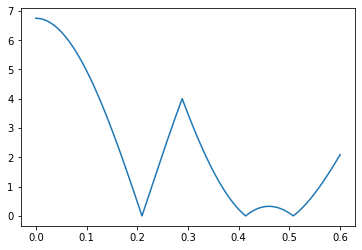

In [155]:
q = q9
# value_bessel = 0.156/q.bessel[0]
# v_m = func_b(value_bessel/0.12,(q.bessel[0],q.bessel[1]))
# v_m,value_bessel
print(q.q_name)
x = np.linspace(0,0.6,5001)
y=func_b(x/q.bessel[0]/0.12,(q.bessel[0],q.bessel[1]))-4
plt.figure()
plt.plot(x,np.abs(y))
z = x[scipy.signal.argrelmin(np.abs(y))[0]][:3]
z

In [156]:
# q = q5
value_bessel = z[0]/q.bessel[0]
v_m = func_b(value_bessel/0.12,(q.bessel[0],q.bessel[1]))
q.imAmp = 2*np.pi*value_bessel
v_m,value_bessel

(4.0019873231359675, 0.23059678843208692)

In [157]:
# q = q5
value_bessel = z[1]/q.bessel[0]
v_m = func_b(value_bessel/0.12,(q.bessel[0],q.bessel[1]))
q.imAmpn = 2*np.pi*value_bessel
v_m,value_bessel

(3.999250036207857, 0.4557724367691534)

In [464]:
x = {'q1': [0.23070142624637022, 0.23070142624637022],
 'q2': [0.0, -0.23289913542998786],
 'q3': [0.44736148860506797, 0.0],
 'q4': [0.22538488651551955, 0.4507697730310391],
 'q5': [-0.23611548138575325, 0.23611548138575325],
 'q6': [0.0, -0.23828558442972428],
 'q7': [0.4538329400342156, 0.0],
 'q8': [0.2386247913214429, 0.4772495826428858],
 'q9': [-0.22967122792805902, 0.22967122792805902],
 'q10': [0.0, -0.2392966814896171]}
for i in measure.qubits:
    measure.qubits[i].imAmp = 2*np.pi*x[i][0]
    measure.qubits[i].imAmpn = 2*np.pi*x[i][1]

In [204]:
ret.x

array([-0.0316, -0.251 , -0.0824, -0.2766, -0.048 , -0.4774, -0.1843,
       -0.3593, -0.2498])

In [187]:
v=[-0.0314, -0.251 , -0.0821, -0.2764, -0.0481, -0.4776, -0.1843,
       -0.3602, -0.2498, -0.1067]
for j,i in enumerate(measure.qubits):
    measure.qubits[i].volt = v[j]

In [237]:
ret.x

array([-0.0316, -0.2509, -0.0822, -0.2764, -0.0482, -0.4776, -0.1845,
       -0.3588, -0.2495, -0.1066])

In [238]:
v=[-0.0316, -0.2509, -0.0822, -0.2764, -0.0482, -0.4776, -0.1845,
       -0.3588, -0.2495, -0.1066]
for j,i in enumerate(measure.qubits):
    measure.qubits[i].volt = v[j]

In [187]:
v=[-0.0315, -0.2509, -0.0822, -0.2765, -0.0482, -0.4777, -0.1846,
       -0.3589, -0.2496, -0.1067]
for j,i in enumerate(measure.qubits):
    measure.qubits[i].volt = v[j]

In [230]:
q7.volt

-0.1846

In [53]:
for i in measure.qubits:
    print(i,measure.qubits[i].imAmp/2/np.pi,measure.qubits[i].imAmpn/2/np.pi)

q1 0.23157044219870773 0.45827074313880345
q2 0.0 0.0
q3 -0.2249177655774665 -0.44286454464750796
q4 0.0 0.0
q5 0.23712494971261486 0.4687590538885594
q6 0.0 0.0
q7 -0.22859424476288925 -0.4479734183207579
q8 0.0 0.0
q9 0.23063142803446554 0.45578792602656987
q10 0.0 0.0


In [57]:
q10.volt_zgate

0.0034

In [474]:
ret.x

array([-0.0314, -0.251 , -0.0821, -0.2764, -0.0481, -0.4776, -0.1843,
       -0.3602, -0.2498, -0.1067])

In [94]:
q1.imAmpn = 2.8794

In [55]:
f_target = 4.3478e9
dt = 1/0.12
t_rabi = np.arange(dt,30*dt,dt)
center = np.mean(t_rabi)

dcstate = ['q1','q2','q3','q4','q5','q6','q7','q8','q9','q10']
exstate = ['q2','q4','q6','q8','q10']
# exstate = ['q1']
caliM = calimatrix[0:10,0:10]
job = Job(mrw.mEcho,(measure,f_target,center,t_rabi,dcstate,exstate,caliM,True),\
          tags=(['ex-q246810','4MHz']+[str(measure.qubits[i].volt) for i in measure.qubits]),no_bar=True)
td, pop_d = await job.done()
gc.collect()

Output()

0

In [ ]:
f_target = 4.3469e9
dt = 1/0.12
dcstate = ['q1','q2','q3','q4','q5','q6','q7','q8','q9','q10']
exstate = ['q1','q3','q5','q7','q9']
caliM = calimatrix[0:10,0:10]
for i in np.linspace(11,51,41,dtype=int):
    t_rabi = np.linspace(0,i*dt,i)
    center = np.mean(t_rabi)
    job = Job(mrw.mEcho,(measure,f_target,center,t_rabi,dcstate,exstate,caliM,True),\
              tags=(['ex-q1','4MHz']+['count'+str(i)]+[str(measure.qubits[i].volt) for i in measure.qubits]),no_bar=True)
    td, pop_d = await job.done()
    gc.collect()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

In [345]:
q1.amp = 0.19841

In [344]:
q1.delta_ex = -100e6

In [ ]:
# imAmp_2074 = {}
# for i in measure.qubits:
#     imAmp_2074[i] = measure.qubits[i].imAmp
# imAmp_2074

In [ ]:
q9.imAmp = 1.4337898284492956

In [ ]:
# imAmp_2074_ = {}
# for i in measure.qubits:
#     imAmp_2074_[i] = measure.qubits[i].imAmp
# imAmp_2074_

In [234]:
np.shape(s_echo)

(29, 10)

In [49]:
s_echo = np.load(r'D:\skzhao\Data\qWalk\echo_q246810.npz')['data']

In [50]:
async def findResonator2(v1,v2,v3,v4,v5,v6,v7,v8,v9,v10):
    paras1 = v1,v2,v3,v4,v5,v6,v7,v8,v9,v10
#     print(paras1)
    for j,i in enumerate(range(10)):
        measure.qubits[f'q{i+1}'].volt = paras1[j]
    job = Job(mrw.mEcho,(measure,f_target,np.mean(t_rabi),t_rabi,dcstate,exstate,caliM,False,False),title="echo_test",\
              tags=(['ex-q246810','4MHz']+[str(measure.qubits[i].volt) for i in measure.qubits]),no_bar=True)
    td, pop_d = await job.done()
    pop_d /= np.max(pop_d)
    res = np.sum((pop_d[:,:10]-s_echo)**2)

    return res

In [51]:
dt = 1/0.12
t_rabi = np.arange(dt,30*dt,dt)
dcstate = ['q1','q2','q3','q4','q5','q6','q7','q8','q9','q10']
exstate = ['q1']
caliM = calimatrix[0:10,0:10]
center = np.mean(t_rabi)

start = [measure.qubits[i].volt for i in measure.qubits]
# del start[-1]
senstive = [0.0005]*10
high = np.array(start)+0.01
low = np.array(start)-0.01
ret = opt.optimize(findResonator2,start,senstive,[5]*10,high=high,low=low,print_info=True)

Output()

.o
[-0.03047 -0.25072 -0.08155 -0.27577 -0.04796 -0.47743 -0.18453 -0.36017
 -0.2493  -0.10607] 7.797643207963889   

Output()

.

Output()

.o
[-0.03047 -0.25022 -0.08155 -0.27577 -0.04796 -0.47743 -0.18453 -0.36017
 -0.2493  -0.10607] 6.632119893046143   

Output()

.

Output()

.

Output()

.

Output()

.o
[-0.03047 -0.25072 -0.08155 -0.27577 -0.04796 -0.47693 -0.18453 -0.36017
 -0.2493  -0.10607] 6.187435066785916   

Output()

.

Output()

.o
[-0.03047 -0.25072 -0.08155 -0.27577 -0.04796 -0.47743 -0.18453 -0.35967
 -0.2493  -0.10607] 5.6730546908814246   

Output()

.

Output()

.

Output()

.o
[-0.03097 -0.25062 -0.08145 -0.27567 -0.04786 -0.47733 -0.18443 -0.36007
 -0.2492  -0.10597] 5.345330834710298   

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.o
[-0.03072 -0.25042 -0.08147 -0.27579 -0.04812 -0.47713 -0.1845  -0.35987
 -0.2496  -0.10577] 4.804334952435218   

Output()

.o
[-0.03084 -0.25027 -0.08143 -0.2758  -0.0482  -0.47698 -0.18448 -0.35972
 -0.25    -0.10562] 4.602571032778228   

Output()

.o
[-0.03079 -0.25033 -0.08145 -0.27579 -0.04816 -0.47704 -0.18449 -0.35978
 -0.24924 -0.10628] 4.052146307676853   

Output()

.o
[-0.03096 -0.25014 -0.0814  -0.27581 -0.04827 -0.47685 -0.18446 -0.35959
 -0.24921 -0.10664] 3.8365625375323242   

Output()

.

Output()

.

Output()

.

Output()

.o
[-0.03098 -0.25043 -0.08158 -0.27577 -0.04828 -0.47704 -0.18469 -0.35956
 -0.24943 -0.10603] 3.4402453984975967   

Output()

.o
[-0.03117 -0.25036 -0.08167 -0.27584 -0.0484  -0.47692 -0.18485 -0.35933
 -0.24957 -0.10609] 2.419270864580352   

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.o
[-0.03122 -0.25007 -0.08146 -0.27565 -0.04839 -0.47675 -0.18478 -0.3592
 -0.24976 -0.10626] 2.4076063695210856   

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.o
[-0.03109 -0.25018 -0.08143 -0.27572 -0.04825 -0.47689 -0.18459 -0.3595
 -0.24941 -0.1064 ] 2.292157825563799   

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.o
[-0.03122 -0.2501  -0.08176 -0.27565 -0.04824 -0.47682 -0.18471 -0.35931
 -0.24957 -0.10633] 2.2886215085486774   

Output()

.

Output()

.

Output()

.

Output()

.o
[-0.03132 -0.25018 -0.08156 -0.27561 -0.04826 -0.47684 -0.18455 -0.35927
 -0.24975 -0.1063 ] 1.970360128245134   

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.o
[-0.03134 -0.25014 -0.0816  -0.27579 -0.04834 -0.47677 -0.1847  -0.35921
 -0.24954 -0.1063 ] 1.7931262810206086   

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.o
[-0.03134 -0.25014 -0.08159 -0.27579 -0.04833 -0.47677 -0.18469 -0.35921
 -0.24954 -0.10631] 1.7772879762055493   

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

..

Output()

..

Output()

.

Output()

.

Output()

.

Output()

.o
[-0.03133 -0.25014 -0.0816  -0.27579 -0.04833 -0.47677 -0.18469 -0.35921
 -0.24954 -0.10631] 1.7527076087349225   ...

Output()

...

Output()

..

Output()

.......................................
 CacheInfo(hits=46, misses=166, maxsize=128, currsize=128)


In [461]:
-0.0316, -0.2514, -0.0816, -0.2762, -0.0482, -0.4783, -0.184 , -0.3604, -0.2507, -0.1064

1.455

In [52]:
ret.x

array([-0.03133, -0.25014, -0.0816 , -0.27579, -0.04833, -0.47677,
       -0.18469, -0.35921, -0.24954, -0.10631])

In [54]:
v =[-0.03133, -0.25014, -0.0816 , -0.27579, -0.04833, -0.47677,
       -0.18469, -0.35921, -0.24954, -0.10631]
for j,i in enumerate(range(10)):
    measure.qubits[f'q{i+1}'].volt = v[j]

In [213]:
async def findResonator3(v1, v2, v3, v4, v5, v6, v7, v8, v9, v10, v11, v12,
                         v13, v14, v15, v16, v17, v18, v19, v20):
    paras = v1, v2, v3, v4, v5, v6, v7, v8, v9, v10
    for j, i in enumerate(exstate):
        measure.qubits[i].imAmp = paras[j]
    for j, i in enumerate(exstate):
        j += 5
        measure.qubits[i].imAmpn = paras[j]
    paras1 = v11, v12, v13, v14, v15, v16, v17, v18, v19, v20
    print(paras, paras1)
    for j, i in enumerate(range(10)):
        measure.qubits[f'q{i+1}'].volt = paras1[j]
    job = Job(mrw.mEcho,(measure,f_target,np.mean(t_rabi),t_rabi,dcstate,exstate,caliM,True),title="echo_test_imAmp",\
              tags=(['ex-q13579','4MHz']+[str(measure.qubits[i].imAmp) for i in exstate]+\
                    [str(measure.qubits[i].imAmpn) for i in exstate]+\
              [str(measure.qubits[i].volt) for i in measure.qubits]),no_bar=True)
    td, pop_d = await job.done()
    pop_d /= np.max(pop_d)
    res = np.sum((pop_d[:, :] - s_echo)**2)

    return res

In [114]:
dt = 1/0.12
t_rabi = np.arange(0,30*dt,dt)
dcstate = ['q1','q2','q3','q4','q5','q6','q7','q8','q9','q10']
exstate = ['q1','q3','q5','q7','q9']
caliM = calimatrix[0:10,0:10]

start = [measure.qubits[i].imAmp for i in exstate] + [measure.qubits[i].imAmpn for i in exstate] + \
[measure.qubits[i].volt for i in measure.qubits]
senstive = [0.0005]*20
high = np.array(start)+0.01
low = np.array(start)-0.01
ret = opt.optimize(findResonator3,start,senstive,[4]*20,high=high,low=low,print_info=True)

In [186]:
# ret.x
exstate = ['q1','q3','q5','q7','q9']
paras = [ 1.455,  -1.4132,  1.4899, -1.4363,  1.4491,  2.8794, -2.7826,  2.9453, -2.8147, 2.8638]
for j,i in enumerate(exstate):
    measure.qubits[i].imAmp = paras[j]
for j,i in enumerate(exstate):
    j += 5
    measure.qubits[i].imAmpn = paras[j]
paras1 = [-0.0312, -0.2512, -0.0819, -0.2765, -0.0479, -0.4779, -0.1842, -0.3606, -0.2498, -0.1068]
print(paras,paras1)
for j,i in enumerate(range(10)):
    measure.qubits[f'q{i+1}'].volt = paras1[j]

[1.455, -1.4132, 1.4899, -1.4363, 1.4491, 2.8794, -2.7826, 2.9453, -2.8147, 2.8638] [-0.0312, -0.2512, -0.0819, -0.2765, -0.0479, -0.4779, -0.1842, -0.3606, -0.2498, -0.1068]


# OTOC

In [321]:
q = q3
df = -0.688
dtl.biasshift(q.specfuncz,q.f_ex/1e9,df,'lower')

-0.14825727899861035

In [322]:
q.volt_zgate =-0.14825727899861035

In [72]:
v=[-0.0314, -0.2508, -0.0819, -0.2759, -0.0486, -0.4775, -0.1849,
       -0.359 , -0.2499, -0.1065]
for j,i in enumerate(measure.qubits):
    measure.qubits[i].volt = v[j]

In [48]:
for i in measure.qubits:
    measure.qubits[i].shift = 0
    measure.qubits[i].rise = 0
#     print(x)

In [133]:
q1.shift

1.6000000000000002e-10

In [47]:
for i in measure.qubits:
    measure.qubits[i].shift_delay = 0e-9

In [46]:
for i in measure.qubits:
    measure.qubits[i].voltn =measure.qubits[i].volt

In [136]:
paras = [-0.0315, -0.2507, -0.0817, -0.2763, -0.0476, -0.4772,
       -0.1853, -0.3599, -0.2503, -0.107]
for j,i in enumerate(range(10)):
    measure.qubits[f'q{i+1}'].voltn = paras[j]
paras1 = [-0.0314, -0.2508, -0.0817,
       -0.2768, -0.0474, -0.4771, -0.1853, -0.3598, -0.2502, -0.1069]
#     print(paras,paras1,dt)
for j,i in enumerate(range(10)):
    measure.qubits[f'q{i+1}'].volt = paras1[j]

In [266]:
q10.volt

[-0.03113,
 -0.25066,
 -0.08158,
 -0.27587,
 -0.04834,
 -0.47701,
 -0.18482,
 -0.35974,
 -0.24979,
 -0.1062]

In [287]:
f_target = 4.3478e9
dt = 1/0.12
t_rabi = np.arange(0,30*dt,dt)
# t_rabi = np.linspace(0,30*dt,60)
# center = np.mean(t_rabi)
gateduring = 1/0.12
dcstate = ['q1','q2','q3','q4','q5','q6','q7','q8','q9','q10']
exstate = ['q2','q4','q6','q8','q10']
caliM = calimatrix[0:10,0:10]
job = Job(mrw.oToc,(measure,f_target,gateduring,t_rabi,dcstate,exstate,caliM,True,True,600,False),\
          tags=(['ex-q246810','4MHz',str(f_target/1e9)]+[str(measure.qubits[i].volt) for i in measure.qubits]+\
               [str(measure.qubits[i].volt_zgate) for i in measure.qubits]),no_bar=True)
td, pop_d = await job.done()
gc.collect() 

Output()

0

In [130]:
q1.volt_zgate = -0.01935
q2.volt_zgate = 0.00146
q3.volt_zgate = -0.00245
q4.volt_zgate = 0.01385
q5.volt_zgate = 0.01614
q6.volt_zgate = -0.01468
q7.volt_zgate = -0.00196
q8.volt_zgate = -0.00714
q9.volt_zgate = -0.00684
q10.volt_zgate = -0.00084

In [105]:
await psg_ex1.setValue('Moutput','ON')

In [288]:
s_otoc = np.load(r'D:\skzhao\Data\qWalk\otoc_q10.npz')['data']

In [289]:
np.shape(s_otoc)

(30, 10)

In [291]:
async def findResonator4(v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,\
                         v21,v22,v23,v24,v25,v26,v27,v28,v29,v30):
    global smaller,N
#     t_rabi = np.arange(0,30*dt,dt)[:30]
    paras = v1,v2,v3,v4,v5,v6,v7,v8,v9,v10
    for j,i in enumerate(range(N)):
        measure.qubits[f'q{i+1}'].volt_zgate= paras[j]
    paras1 = v11,v12,v13,v14,v15,v16,v17,v18,v19,v20
    for j,i in enumerate(range(N)):
        measure.qubits[f'q{i+1}'].volt = paras1[j]
    paras2 = v21,v22,v23,v24,v25,v26,v27,v28,v29,v30
    for j,i in enumerate(range(10)):
        measure.qubits[f'q{i+1}'].phaseim = paras2[j]
#     paras3 = v31,v32,v33,v34,v35,v36,v37,v38,v39,v40
#     for j,i in enumerate(range(N)):
#         measure.qubits[f'q{i+1}'].voltn = paras3[j]
#     paras4 = v41,v42,v43,v44,v45,v46,v47,v48,v49,v50
#     for j,i in enumerate(range(N)):
#         measure.qubits[f'q{i+1}'].shift = paras4[j]/1e9
    job = Job(mrw.oToc,(measure,f_target,gateduring,t_rabi,dcstate,exstate,caliM,False,False,600),title="otoc_test",\
              tags=(['ex-q246810','4MHz',str(gateduring)]+[str(measure.qubits[i].imAmp) for i in exstate]+\
                    [str(measure.qubits[i].imAmpn) for i in exstate]+\
              [str(measure.qubits[i].volt) for i in measure.qubits]+\
                    [str(measure.qubits[i].voltn) for i in measure.qubits]+\
                    [str(measure.qubits[i].shift) for i in measure.qubits]+\
                    [str(measure.qubits[i].volt_zgate) for i in measure.qubits]+\
                   [str(measure.qubits[i].phaseim) for i in measure.qubits]),no_bar=True)
    td, pop_d = await job.done()
    pop_d /= np.max(pop_d)
    res = np.sum((pop_d[:,:10]-s_otoc[:,:10])**2)
    if res <= smaller:
        smaller = res
        job = Job(mrw.oToc,(measure,f_target,gateduring,t_rabi,dcstate,exstate,caliM,False,False,10000,True),\
              tags=(['ex-q246810','4MHz',str(gateduring)]+[str(measure.qubits[i].imAmp) for i in exstate]+\
                    [str(measure.qubits[i].imAmpn) for i in exstate]+\
              [str(measure.qubits[i].volt) for i in measure.qubits]+\
                    [str(measure.qubits[i].voltn) for i in measure.qubits]+\
                    [str(measure.qubits[i].shift) for i in measure.qubits]+\
                    [str(measure.qubits[i].volt_zgate) for i in measure.qubits]+\
                   [str(measure.qubits[i].phaseim) for i in measure.qubits]),no_bar=True)
        td, pop_d = await job.done()
        
    
   
    return res

In [292]:
dt = 1/0.12
N = 10
t_rabi = np.arange(0,30*dt,dt)
dcstate = ['q1','q2','q3','q4','q5','q6','q7','q8','q9','q10']
exstate = ['q2','q4','q6','q8','q10']
caliM = calimatrix[0:10,0:10]
gateduring = 1/0.12
f_target = 4.3478e9
smaller = 4

start = [measure.qubits[f'q{i+1}'].volt_zgate for i in range(N)] + \
[measure.qubits[f'q{i+1}'].volt for i in range(N)]+\
[measure.qubits[f'q{i+1}'].phaseim for i in range(N)]

senstive = [0.01]*N +[0.001]*N+ [2*np.pi/10]*N 
# senstive[5] = 0.1

high1 = np.array([measure.qubits[f'q{i+1}'].volt_zgate for i in range(N)])+0.1
high2 = np.array([measure.qubits[f'q{i+1}'].volt for i in range(N)])+0.005
high3 = np.array([np.pi/2]*N)
# high4 = np.array([measure.qubits[f'q{i+1}'].voltn for i in range(N)])+0.005
# high5 = np.array([5]*N)
high = np.append(np.append(high1,high2),high3)
# high = np.append(high1,high2)
low1 = np.array([measure.qubits[f'q{i+1}'].volt_zgate for i in range(N)])-0.1
low2 = np.array([measure.qubits[f'q{i+1}'].volt for i in range(N)])-0.005
low3 = np.array([-np.pi/2]*N)
# low4 = np.array([measure.qubits[f'q{i+1}'].voltn for i in range(N)])-0.005
# low5 = np.array([0]*N)
low = np.append(np.append(low1,low2),low3)
# low = np.append(low1,low2)
ret = opt.optimize(findResonator4,start,senstive,([5]*N+[5]*N+[3]*N),high=high,low=low,print_info=True)


# start = [measure.qubits[f'q{i+1}'].volt for i in range(10)] 
# senstive = [0.0005]*10 
# high = np.array([measure.qubits[f'q{i+1}'].volt for i in range(10)])+0.005
# low = np.array([measure.qubits[f'q{i+1}'].volt for i in range(10)])-0.005
# ret = opt.optimize(findResonator4,start,senstive,[4]*10,high=high,low=low,print_info=True)

# start = [measure.qubits[f'q{i+1}'].volt for i in range(10)] 
# senstive = [0.0005]*10
# high = np.array(start)+0.005
# # high[0] = dt*1.5
# low = np.array(start)-0.005
# # low[0] = dt*0.5                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
# ret = opt.optimize(findResonator4,start,senstive,[4]*10,high=high,low=low,print_info=True)

Output()

.o
[ 0.00105  0.02074 -0.00088  0.01309  0.017   -0.01009 -0.01492 -0.02827
 -0.01769  0.03298 -0.03042 -0.25079 -0.08147 -0.27576 -0.04794 -0.47741
 -0.18463 -0.3602  -0.24928 -0.10607  0.202    0.339   -0.024   -0.225
 -0.179    0.44    -0.014    0.496    0.21     0.108  ] 6.431631086531162   

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.o
[ 0.00105  0.02074 -0.00088  0.01309  0.017   -0.01009 -0.01492 -0.02827
 -0.01769  0.04298 -0.03042 -0.25079 -0.08147 -0.27576 -0.04794 -0.47741
 -0.18463 -0.3602  -0.24928 -0.10607  0.202    0.339   -0.024   -0.225
 -0.179    0.44    -0.014    0.496    0.21     0.108  ] 6.108787017149778   

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.o
[ 6.0000e-05  1.9670e-02 -8.0000e-04  1.3500e-02  1.5960e-02 -7.7100e-03
 -1.4140e-02 -2.8980e-02 -1.8280e-02  3.5360e-02 -3.0480e-02 -2.5071e-01
 -8.1580e-02 -2.7578e-01 -4.7970e-02 -4.7743e-01 -1.8450e-01 -3.6016e-01
 -2.4930e-01 -1.0606e-01  2.5800e-01  4.8900e-01  3.8000e-02 -7.5000e-02
 -1.1300e-01  5.9000e-01  5.3000e-02  6.4600e-01  2.5900e-01 -4.1300e-01] 6.057282424021804   

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.o
[ 5.4000e-04  1.8870e-02 -7.1000e-04  1.3550e-02  1.6460e-02 -8.4700e-03
 -1.4180e-02 -2.8490e-02 -1.7820e-02  3.4600e-02 -3.0440e-02 -2.5074e-01
 -8.1540e-02 -2.7576e-01 -4.7960e-02 -4.7741e-01 -1.8454e-01 -3.6018e-01
 -2.4928e-01 -1.0606e-01  2.5700e-01  4.4100e-01  3.4000e-02 -1.2300e-01
 -1.3400e-01  5.4200e-01  2.9000e-02  5.9800e-01  2.5000e-01 -1.2500e-01] 5.8727306086012785   

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.o
[ 4.1000e-04  2.0010e-02 -6.8000e-04  1.3640e-02  1.6320e-02 -8.5500e-03
 -1.4380e-02 -2.9010e-02 -1.8210e-02  3.4520e-02 -3.0470e-02 -2.5073e-01
 -8.1540e-02 -2.7575e-01 -4.7960e-02 -4.7743e-01 -1.8455e-01 -3.6018e-01
 -2.4931e-01 -1.0607e-01  2.5200e-01  4.3600e-01  2.9000e-02 -1.2800e-01
 -1.4300e-01  5.3700e-01  1.0000e-03  5.9300e-01  3.8400e-01 -1.3000e-01] 5.762565098221712   

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

In [336]:
paras = [-3.0950e-02, -2.5060e-01,
 -8.1610e-02, -2.7588e-01, -4.8020e-02, -4.7707e-01, -1.8480e-01, -3.5955e-01,
 -2.4978e-01, -1.0647e-01]
for j,i in enumerate(range(9)):
    measure.qubits[f'q{i+1}'].volt = paras[j]

In [286]:
# ret.x
paras = [0.00105,  0.02074, -0.00088,  0.01309,  0.017,   -0.01009, -0.01492, -0.02827,
 -0.01769,  0.03298, -0.03042, -0.25079, -0.08147, -0.27576, -0.04794, -0.47741,
 -0.18463, -0.3602,  -0.24928, -0.10607,  0.202,    0.339,   -0.024 ,  -0.225,
 -0.179,    0.44,    -0.014,    0.496,    0.21,     0.108]
for j,i in enumerate(range(10)):
    measure.qubits[f'q{i+1}'].volt_zgate = paras[:10][i]
# for j,i in enumerate(range(10)):
#     measure.qubits[f'q{i+1}'].volt = paras[10:20][i]
for j,i in enumerate(range(10)):
    measure.qubits[f'q{i+1}'].volt = paras[10:20][i]
# for j,i in enumerate(range(10)):
#     measure.qubits[f'q{i+1}'].voltn = paras[30:40][i]
for j,i in enumerate(range(10)):
    measure.qubits[f'q{i+1}'].phaseim = paras[20:][i]

In [62]:
paras = [2.9000e-04,  1.5600e-02, -6.2000e-04,  1.3010e-02 , 1.5670e-02 ,-1.5370e-02,
 -1.3070e-02, -2.7260e-02, -1.2130e-02,  1.5970e-02, -3.0580e-02, -2.5065e-01,
 -8.1640e-02, -2.7580e-01, -4.8230e-02, -4.7738e-01, -1.8487e-01, -3.6008e-01,
 -2.4963e-01, -1.0596e-01,  9.6000e-02,  9.6000e-02, -2.7000e-02,  9.6000e-02,
  6.8000e-02,  9.6000e-02, -2.3000e-02,  9.6000e-02,  3.0000e-03,  9.6000e-02,
 -3.0670e-02, -2.5075e-01, -8.1730e-02, -2.7576e-01, -4.8340e-02, -4.7748e-01,
 -1.8492e-01, -3.5999e-01, -2.4993e-01, -1.0610e-01,  0.0000e+00,  4.0000e-01,
  3.0000e-01,  2.0000e-01,  0.0000e+00,  3.0000e-01,  3.0000e-01,  4.0000e-01,
  2.0000e-01,  3.0000e-01]
for j,i in enumerate(range(10)):
    measure.qubits[f'q{i+1}'].volt_zgate = paras[:10][i]
for j,i in enumerate(range(10)):
    measure.qubits[f'q{i+1}'].volt = paras[10:20][i]
for j,i in enumerate(range(10)):
    measure.qubits[f'q{i+1}'].phaseim = paras[20:30][i]
for j,i in enumerate(range(10)):
    measure.qubits[f'q{i+1}'].voltn = paras[30:40][i]
for j,i in enumerate(range(10)):
    measure.qubits[f'q{i+1}'].shift = paras[40:][i]/1e9

In [ ]:
paras = ret.x
for j,i in enumerate(range(10)):
    measure.qubits[f'q{i+1}'].volt_zgate = paras[:10][i]
for j,i in enumerate(range(10)):
    measure.qubits[f'q{i+1}'].volt = paras[10:20][i]
for j,i in enumerate(range(10)):
    measure.qubits[f'q{i+1}'].phasim = paras[20:][i]

if ret.fun >=1:    
    dt = 1/0.12
    N = 10
    t_rabi = np.arange(0,30*dt,dt)
    dcstate = ['q1','q2','q3','q4','q5','q6','q7','q8','q9','q10']
    exstate = ['q2','q4','q6','q8','q10']
    caliM = calimatrix[0:10,0:10]
    gateduring = 1/0.12
    f_target = 4.3478e9
    smaller = 3.8

    start = [measure.qubits[f'q{i+1}'].volt_zgate for i in range(N)] + [measure.qubits[f'q{i+1}'].volt for i in range(N)] + [measure.qubits[f'q{i+1}'].phaseim for i in range(N)]
    senstive = [0.01]*N+ [0.001]*N + [2*np.pi/10]*N
    high1 = np.array([measure.qubits[f'q{i+1}'].volt_zgate for i in range(N)])+0.1
    high2 = np.array([measure.qubits[f'q{i+1}'].volt for i in range(N)])+0.005
    high3 = np.array([np.pi/2]*N)
    high = np.append(np.append(high1,high2),high3)
    # high = np.append(high1,high2)
    low1 = np.array([measure.qubits[f'q{i+1}'].volt_zgate for i in range(N)])-0.1
    low2 = np.array([measure.qubits[f'q{i+1}'].volt for i in range(N)])-0.005
    low3 = np.array([-np.pi/2]*N)
    low = np.append(np.append(low1,low2),low3)
    # low = np.append(low1,low2)
    ret = opt.optimize(findResonator4,start,senstive,([5]*N+[5]*N+[2]*N),high=high,low=low,print_info=True)

In [ ]:
paras = ret.x[:10]
for j,i in enumerate(range(10)):
    measure.qubits[f'q{i+1}'].volt_zgate = paras[j]
paras1 = ret.x[10:]
for j,i in enumerate(range(10)):
    measure.qubits[f'q{i+1}'].volt = paras1[j]

if ret.fun >=1:
    dt = 1/0.12
    N = 10
    t_rabi = np.arange(0,30*dt,dt)
    dcstate = ['q1','q2','q3','q4','q5','q6','q7','q8','q9','q10']
    exstate = ['q2','q4','q6','q8','q10']
    caliM = calimatrix[0:10,0:10]
    gateduring = 1/0.12
    f_target = 4.3469e9

    start = [measure.qubits[f'q{i+1}'].volt_zgate for i in range(N)] + [measure.qubits[f'q{i+1}'].volt for i in range(N)] 
    senstive = [0.005]*N+ [0.001]*N
    high1 = np.array([measure.qubits[f'q{i+1}'].volt_zgate for i in range(N)])+0.01
    high2 = np.array([measure.qubits[f'q{i+1}'].volt for i in range(N)])+0.005
    high = np.append(high1,high2)
    low1 = np.array([measure.qubits[f'q{i+1}'].volt_zgate for i in range(N)])-0.01
    low2 = np.array([measure.qubits[f'q{i+1}'].volt for i in range(N)])-0.005
    low = np.append(low1,low2)
    ret = opt.optimize(findResonator4,start,senstive,([5]*N+[5]*N),high=high,low=low,print_info=True)

In [78]:
paras = ret.x[:10]
for j,i in enumerate(range(10)):
    measure.qubits[f'q{i+1}'].volt_zgate = paras[j]
paras1 = ret.x[10:]
for j,i in enumerate(range(10)):
    measure.qubits[f'q{i+1}'].volt = paras1[j]

# if ret.fun >=1:
#     dt = 1/0.12
#     N = 10
#     t_rabi = np.arange(0,30*dt,dt)
#     dcstate = ['q1','q2','q3','q4','q5','q6','q7','q8','q9','q10']
#     exstate = ['q2','q4','q6','q8','q10']
#     caliM = calimatrix[0:10,0:10]
#     gateduring = 1/0.12
#     f_target = 4.3469e9

#     start = [measure.qubits[f'q{i+1}'].volt_zgate for i in range(N)] + [measure.qubits[f'q{i+1}'].volt for i in range(N)] 
#     senstive = [0.005]*N+ [0.001]*N
#     high1 = np.array([measure.qubits[f'q{i+1}'].volt_zgate for i in range(N)])+0.1
#     high2 = np.array([measure.qubits[f'q{i+1}'].volt for i in range(N)])+0.005
#     high = np.append(high1,high2)
#     low1 = np.array([measure.qubits[f'q{i+1}'].volt_zgate for i in range(N)])-0.1
#     low2 = np.array([measure.qubits[f'q{i+1}'].volt for i in range(N)])-0.005
#     low = np.append(low1,low2)
#     ret = opt.optimize(findResonator4,start,senstive,([5]*N+[5]*N),high=high,low=low,print_info=True)

In [28]:
q1.volt_zgate += q1.volt

In [105]:
paras = [-6.6900e-03, -1.0300e-02,  6.0200e-03, -5.0480e-02, -1.2270e-02,
       -1.1826e-01, -6.2700e-03,  3.6370e-02,  5.0370e-02,  1.4000e-04]
for j,i in enumerate(range(10)):
    measure.qubits[f'q{i+1}'].volt_zgate = paras[j]
paras1 = [-3.1040e-02, -2.5066e-01, -8.1840e-02, -2.7611e-01, -4.8380e-02,
       -4.7737e-01, -1.8464e-01, -3.5953e-01, -2.4948e-01, -1.0636e-01]

for j,i in enumerate(range(10)):
    measure.qubits[f'q{i+1}'].volt = paras1[j]
# paras2 = [-0.03134, -0.25082, -0.08183, -0.27626,
#        -0.04842, -0.47759, -0.18458, -0.35952, -0.24953, -0.1109]
# #     print(paras,paras1,dt)
# for j,i in enumerate(range(10)):
#     measure.qubits[f'q{i+1}'].voltn = paras2[j]

In [37]:
paras = [-0.00143, -0.00732,  0.01299, -0.03863, -0.0037,  -0.10755,  0.0051,  -0.01132,
  0.01019,  0.0034]
for j,i in enumerate(range(10)):
    measure.qubits[f'q{i+1}'].volt_zgate = paras[j]
paras1 = [-0.03141, -0.25089, -0.08189, -0.27633, -0.04839, -0.47765,
 -0.18465, -0.35897, -0.2496,  -0.1055]
#     print(paras,paras1,dt)
for j,i in enumerate(range(10)):
    measure.qubits[f'q{i+1}'].volt = paras1[j]
paras2 = [-0.03141, -0.25089, -0.08189, -0.27633,
 -0.04839, -0.47765, -0.18465, -0.35897, -0.2496, -0.1115]
#     print(paras,paras1,dt)
for j,i in enumerate(range(10)):
    measure.qubits[f'q{i+1}'].voltn = paras2[j]

In [51]:
volt = [-0.03141,-0.25089,-0.08189,-0.27633,-0.04839,-0.47765,-0.18465,-0.35897,-0.2496,-0.3]
volt_zgate = [-0.00188,-0.00878,0.00824,-0.04489,-0.00869,-0.10976,0.00042,-0.01418,0.00278,-0.3]
for i,j in enumerate(measure.qubits):
    measure.qubits[j].volt = volt[i]
    measure.qubits[j].volt_zgate = volt_zgate[i]

In [ ]:
'-0.03141', '-0.25089', '-0.08189', '-0.27633', '-0.04839', '-0.47765', '-0.18465', '-0.35897', '-0.2496', '-0.3'

In [84]:
for i in measure.qubits:
    print(i,measure.qubits[i].volt,measure.qubits[i].volt_zgate)

q1 -0.0314 -0.00188
q2 -0.2508 -0.00878
q3 -0.0819 0.00824
q4 -0.2759 -0.04489
q5 -0.0486 -0.00869
q6 -0.4775 -0.10976
q7 -0.1849 0.00042
q8 -0.359 -0.01418
q9 -0.2499 0.00278
q10 -0.3 -0.3


In [59]:
for i in measure.qubits:
    print(i,measure.qubits[i].volt,measure.qubits[i].volt_zgate)

q1 -0.0314 -0.0034
q2 -0.2508 -0.0099
q3 -0.0819 0.0055
q4 -0.2759 -0.0438
q5 -0.0486 -0.0078
q6 -0.4775 -0.1175
q7 -0.1849 -0.0026
q8 -0.359 -0.0175
q9 -0.2499 0.0003
q10 -0.1065 0.0034


In [109]:
q10.volt_zgate = 0.0034

In [33]:
for j,i in enumerate(measure.qubits):
    measure.qubits[i].volt = ret.x[j]

In [121]:
s_otoc = np.load(r'D:\skzhao\Data\qWalk\otoc_nogate_q246810.npz')['data']

In [123]:
async def findResonator4(v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,rise,f_target):
#     t_rabi = np.arange(0,30*dt,dt)[:30]
#     paras = v1,v2,v3,v4,v5,v6,v7,v8,v9,v10
#     for j,i in enumerate(range(10)):
#         measure.qubits[f'q{i+1}'].volt_zgate= paras[j]
    paras1 = v11,v12,v13,v14,v15,v16,v17,v18,v19,v20
    for j,i in enumerate(range(10)):
        measure.qubits[f'q{i+1}'].volt = paras1[j]
        
    for j,i in enumerate(range(10)):
        measure.qubits[f'q{i+1}'].rise = rise
    job = Job(mrw.oToc,(measure,f_target*1e9,gateduring,t_rabi,dcstate,exstate,caliM,False,False),title="otoc_test",\
              tags=(['ex-q246810','4MHz']+[str(f_target)]+\
              [str(measure.qubits[i].volt) for i in measure.qubits]+\
                   [str(measure.qubits[i].rise) for i in measure.qubits]),no_bar=True)
    td, pop_d = await job.done()
    pop_d /= np.max(pop_d)
    res = np.sum((pop_d[:,:10]-s_otoc[:,:10])**2)
   
    return res

In [124]:
dt = 1/0.12
N = 10
t_rabi = np.arange(0,30*dt,dt)
dcstate = ['q1','q2','q3','q4','q5','q6','q7','q8','q9','q10']
exstate = ['q2','q4','q6','q8','q10']
caliM = calimatrix[0:10,0:10]
gateduring = 0/0.12
f_target = 4.3469

start = [measure.qubits[f'q{i+1}'].volt for i in range(N)] + [2] + [4.3469]
senstive = [0.001]*N + [1] + [0.002]
high1 = np.array([measure.qubits[f'q{i+1}'].volt for i in range(N)])+0.005
high2 = np.array([10])
high3 = np.array([4.35])
high = np.append(np.append(high1,high2),high3)

low1 = np.array([measure.qubits[f'q{i+1}'].volt for i in range(N)])-0.005
low2 = np.array([0])
low3 = np.array([4.34])
low = np.append(np.append(low1,low2),low3)
ret = opt.optimize(findResonator4,start,senstive,([5]*N+[1]+[4]),high=high,low=low,print_info=True)

Output()

.o
[-0.03104 -0.25066 -0.08184 -0.27611 -0.04838 -0.47737 -0.18464 -0.35953
 -0.24948 -0.10636  2.       4.3469 ] 5.024885728568684   

Output()

.

Output()

.

Output()

.

Output()

.o
[-0.03104 -0.25066 -0.08184 -0.27511 -0.04838 -0.47737 -0.18464 -0.35953
 -0.24948 -0.10636  2.       4.3469 ] 4.20278679397078   

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.o
[-0.0309  -0.25063 -0.0817  -0.27597 -0.0479  -0.47732 -0.18476 -0.35975
 -0.24934 -0.10653  2.1      4.3472 ] 4.049002349833711   

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.o
[-0.03081 -0.25053 -0.08161 -0.27588 -0.04843 -0.47723 -0.18482 -0.35965
 -0.24934 -0.10682  2.2      4.3474 ] 2.7282615467633446   

Output()

.

Output()

.

Output()

.o
[-0.03074 -0.25064 -0.08163 -0.27581 -0.04831 -0.47732 -0.18484 -0.35974
 -0.24982 -0.10647  2.3      4.3475 ] 1.6642303999495152   

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.o
[-0.03067 -0.25056 -0.08183 -0.27559 -0.04827 -0.47724 -0.18472 -0.35985
 -0.24954 -0.10656  1.4      4.3479 ] 1.5576422777155412   

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.o
[-0.0307  -0.2506  -0.08173 -0.2757  -0.04829 -0.47728 -0.18478 -0.3598
 -0.24968 -0.10652  1.8      4.3477 ] 1.3274614838034233   

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.o
[-0.03069 -0.25059 -0.08178 -0.27565 -0.04829 -0.47726 -0.18474 -0.35982
 -0.24961 -0.10653  1.8      4.3478 ] 1.2348280811413612   

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.o
[-0.0307  -0.25059 -0.08178 -0.27564 -0.04829 -0.47727 -0.18474 -0.35981
 -0.2496  -0.10653  1.8      4.3478 ] 1.1999556647891827   

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

...

Output()

.

Output()

.

Output()

.

Output()

...

Output()

.

Output()

...

Output()

.

Output()

..

Output()

.

Output()

In [117]:
ret.x

array([0.0092 , 0.09474, 0.0267 , 0.22956, 0.04366, 0.13672, 0.01508,
       0.15593, 0.02113, 0.12038, 4.34732])

In [246]:
v = [-0.0307,  -0.25059, -0.08178, -0.27564, -0.04829, -0.47727 ,-0.18474, -0.35981,
 -0.2496 , -0.10653]
for j,i in enumerate(measure.qubits):
    measure.qubits[i].volt = v[j]

8.333333333333334

In [247]:
v = [-0.01737,  0.01513, -0.00172,  0.01476,  0.01761, -0.00715, -0.00914, -0.01988,
 -0.00508,  0.00044]
for j,i in enumerate(measure.qubits):
    measure.qubits[i].volt_zgate = v[j]

In [312]:
q = q7
dtl.specshift(q.specfuncz,q.f_ex/1e9,bias=-0.00914,side='lower')

(4.922674711843138, -0.3944420251234143)

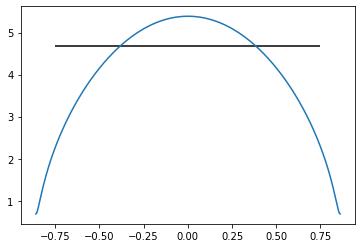

In [305]:
xvar = sy.Symbol('x',real=True)
func,voffset, vperiod, ejs, ec, d = q3.specfuncz
v = np.linspace(-vperiod/2,vperiod/2,50001) + voffset
y = sy.lambdify(xvar,func,'numpy')
plt.figure()
plt.plot(v,y(v))
plt.hlines(q3.f_ex/1e9,-0.75,0.75)

In [196]:
s_otoc = np.load(r'D:\skzhao\Data\qWalk\otoc_nogate_q246810.npz')['data']

In [198]:
async def findResonator5(v11,v12,v13,v14,v15,v16,v17,v18,v19,v20):

#     paras = v1,v2,v3,v4,v5,v6,v7,v8,v9,v10
#     for j,i in enumerate(range(10)):
#         measure.qubits[f'q{i+1}'].phaseim= paras[j]
    paras1 = v11,v12,v13,v14,v15,v16,v17,v18,v19,v20
    for j,i in enumerate(range(10)):
        measure.qubits[f'q{i+1}'].volt = paras1[j]
#     paras2 = v21,v22,v23,v24,v25,v26,v27,v28,v29,v30
#     for j,i in enumerate(range(10)):
#         measure.qubits[f'q{i+1}'].shift = paras2[j]/1e9

    job = Job(mrw.oToc,(measure,f_target*1e9,gateduring,t_rabi,dcstate,exstate,caliM,False,False,300),title="otoc_test",\
              tags=(['ex-q246810','4MHz']+[str(f_target)]+\
              [str(measure.qubits[i].volt) for i in measure.qubits]+\
                    [str(measure.qubits[i].phaseim) for i in measure.qubits]+\
                   [str(measure.qubits[i].shift) for i in measure.qubits]),no_bar=True)
    td, pop_d = await job.done()
    pop_d /= np.max(pop_d)
    res = np.sum((pop_d[:,:10]-s_otoc[:,:10])**2)
   
    return res

In [199]:
dt = 1/0.12
N = 10
t_rabi = np.arange(0,30*dt,dt)
dcstate = ['q1','q2','q3','q4','q5','q6','q7','q8','q9','q10']
exstate = ['q2','q4','q6','q8','q10']
caliM = calimatrix[0:10,0:10]
gateduring = 0/0.12
f_target = 4.3478

start = [measure.qubits[f'q{i+1}'].volt for i in range(N)] 
senstive = [0.001]*N 
high = np.array([measure.qubits[f'q{i+1}'].volt for i in range(N)])+0.005

low = np.array([measure.qubits[f'q{i+1}'].volt for i in range(N)])-0.005
ret = opt.optimize(findResonator5,start,senstive,([5]*N),high=high,low=low,print_info=True)

Output()

.o
[-0.03058 -0.25065 -0.08164 -0.2758  -0.04823 -0.47738 -0.18487 -0.36008
 -0.24963 -0.10596] 3.4974444444183117   

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.o
[-0.03047 -0.25066 -0.08154 -0.27572 -0.04817 -0.47748 -0.18471 -0.35969
 -0.24956 -0.10608] 2.566614364681011   

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.o
[-0.03064 -0.25061 -0.08155 -0.27582 -0.04813 -0.47753 -0.18464 -0.35979
 -0.24944 -0.10619] 2.502419424928217   

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.o
[-0.03049 -0.2506  -0.08158 -0.27577 -0.0482  -0.47749 -0.18452 -0.35989
 -0.24953 -0.10609] 2.120412580242396   

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.o
[-0.03049 -0.25062 -0.08158 -0.27577 -0.04819 -0.4775  -0.18456 -0.35986
 -0.24953 -0.10609] 2.0203233131119296   

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.......

Output()

.

Output()

..

Output()

.

Output()

.

Output()

.

Output()

....

Output()

....

Output()

.....

Output()

.............

Output()

.....

Output()

....

Output()

..

Output()

......

Output()

....

Output()

...

Output()

..

Output()

...

Output()

..........

Output()

...................................................................
 CacheInfo(hits=125, misses=169, maxsize=128, currsize=128)


In [200]:
v = ret.x
for j,i in enumerate(measure.qubits):
    measure.qubits[i].volt = v[j]

In [206]:
q1.volt

-0.03049

In [136]:
dt = 1/0.12
N = 10
t_rabi = np.arange(0,30*dt,dt)
dcstate = ['q1','q2','q3','q4','q5','q6','q7','q8','q9','q10']
exstate = ['q2','q4','q6','q8','q10']
caliM = calimatrix[0:10,0:10]
gateduring = 0/0.12
f_target = 4.3478

start = [measure.qubits[f'q{i+1}'].phaseim for i in range(N)] + [measure.qubits[f'q{i+1}'].volt for i in range(N)] +[measure.qubits[f'q{i+1}'].shift/1e-9 for i in range(N)] 
senstive = [np.pi/5]*N+[0.001]*N +[1.2]*10
high1 = np.array([np.pi]*N)
high2 = np.array([measure.qubits[f'q{i+1}'].volt for i in range(N)])+0.005
high3 = np.array([3]*N)
low1 = np.array([-np.pi]*N)
low2 = np.array([measure.qubits[f'q{i+1}'].volt for i in range(N)])-0.005
low3 = np.array([0]*N)

high = np.append(np.append(high1,high2),high3)
low = np.append(np.append(low1,low2),low3)
ret = opt.optimize(findResonator5,start,senstive,([3]*N+[5]*N+[1]*N),high=high,low=low,print_info=True)

Output()

.o
[ 0.096    0.096   -0.027    0.096    0.068    0.096   -0.023    0.096
  0.003    0.096   -0.03058 -0.25065 -0.08164 -0.2758  -0.04823 -0.47738
 -0.18487 -0.36008 -0.24963 -0.10596  0.       0.4      0.3      0.2
  0.       0.3      0.3      0.4      0.2      0.3    ] 4.0012171064338204   

Output()

.

Output()

.o
[ 0.096    0.724   -0.027    0.096    0.068    0.096   -0.023    0.096
  0.003    0.096   -0.03058 -0.25065 -0.08164 -0.2758  -0.04823 -0.47738
 -0.18487 -0.36008 -0.24963 -0.10596  0.       0.4      0.3      0.2
  0.       0.3      0.3      0.4      0.2      0.3    ] 3.919022936238446   

Output()

.

Output()

.o
[ 0.096    0.096   -0.027    0.724    0.068    0.096   -0.023    0.096
  0.003    0.096   -0.03058 -0.25065 -0.08164 -0.2758  -0.04823 -0.47738
 -0.18487 -0.36008 -0.24963 -0.10596  0.       0.4      0.3      0.2
  0.       0.3      0.3      0.4      0.2      0.3    ] 3.916731065873866   

Output()

.

Output()

.

Output()

.

Output()

.o
[ 0.096    0.096   -0.027    0.096    0.068    0.096   -0.023    0.724
  0.003    0.096   -0.03058 -0.25065 -0.08164 -0.2758  -0.04823 -0.47738
 -0.18487 -0.36008 -0.24963 -0.10596  0.       0.4      0.3      0.2
  0.       0.3      0.3      0.4      0.2      0.3    ] 3.5632174357268607   

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.o
[ 0.096    0.096   -0.027    0.096    0.068    0.096   -0.023    0.096
  0.003    0.096   -0.03058 -0.25065 -0.08164 -0.2758  -0.04823 -0.47738
 -0.18487 -0.36008 -0.24963 -0.10596  1.2      0.4      0.3      0.2
  0.       0.3      0.3      0.4      0.2      0.3    ] 3.5160091068950545   

Output()

.

Output()

.o
[ 0.096    0.096   -0.027    0.096    0.068    0.096   -0.023    0.096
  0.003    0.096   -0.03058 -0.25065 -0.08164 -0.2758  -0.04823 -0.47738
 -0.18487 -0.36008 -0.24963 -0.10596  0.       0.4      1.5      0.2
  0.       0.3      0.3      0.4      0.2      0.3    ] 3.4081509832774373   

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

.

Output()

In [132]:
q1.phaseim

1.081

In [188]:
q1.volt_zgate

-0.01737

# GATEDURING

In [80]:
f_target = 4.3469e9
t_rabi = 2/0.12
# t_rabi = np.linspace(0,30*dt,60)
# center = np.mean(t_rabi)
gateduring = np.linspace(0,20,51)
dcstate = ['q1','q2','q3','q4','q5','q6','q7','q8','q9','q10']
exstate = ['q1','q3','q5','q7','q9']
caliM = calimatrix[0:10,0:10]
job = Job(mrw.gateDuring,(measure,f_target,gateduring,t_rabi,dcstate,exstate,caliM,True,True),\
          tags=(['ex-q13579_nogate','4MHz']+[str(measure.qubits[i].volt) for i in measure.qubits]),no_bar=True)
td, pop_d = await job.done()
gc.collect() 

Output()

0

# oToc_tomo

In [83]:
volt = ['-0.0314', '-0.2508', '-0.0819', '-0.2759', '-0.0486', '-0.4775', '-0.1849', '-0.359', '-0.2499', '-0.1065']
for i, j in enumerate(measure.qubits):
    measure.qubits[j].volt = eval(volt[i])

In [92]:
measure.readamp = [0.06,0.03,0.058,0.05,0.05,0.04,0.049,0.035,0.035,0.04][:]
measure.ringup = [100,100,100,100,100,100,100,100,100,200][:]
measure.ringupamp = [0.1]*10
# measure.readamp = [0.055][:]
# measure.ringup = [100][:]
# measure.ringupamp = [0.1]
pulse = await cww.modulation_read(measure,measure.delta,readlen=1200,repeats=2000,weight=None)
task = await mrw.executeZwave(measure,cww.zWave,dcstate={},offset=0,qnum=10,output=True,during=0/1e9,shift=0e-9)
await mrw.concurrence(task)

In [101]:
f_target = 4.3469e9
t_rabi = 2/0.12
q_target = q1
gateduring = 1/0.12
volt_zgate = np.linspace(-0.01,0.01,11) + q_target.volt_zgate
# volt_zgate = np.linspace(-0.01,0,11)
# t_rabi = np.linspace(0,15,16)/0.12
dcstate = ['q1','q2','q3','q4','q5','q6','q7','q8','q9','q10']
exstate = [q_target.q_name]
caliM = calimatrix[0:10,0:10]
await psg_ex1.setValue('Moutput','OFF')
job = Job(mrw.oToc_wave_single,(measure,f_target,gateduring,t_rabi,volt_zgate,q_target,dcstate,exstate,caliM,True),\
          tags=([q_target.q_name]+[str(measure.qubits[i].volt) for i in measure.qubits]),max=len(volt_zgate))
td, pop_d, popm = await job.done()
gc.collect() 
for ch in q_target.inst['ex_ch']:
    await measure.awg[q_target.inst['ex_awg']].output_off(ch=ch)
await psg_ex1.setValue('Moutput','ON')

Output()

In [102]:
bits = [q1,q2,q3,q4,q5,q6,q7,q8,q9,q10]
f_target = 4.3469e9
t_rabi = 1/0.12
gateduring = 1/0.12
dcstate = ['q1','q2','q3','q4','q5','q6','q7','q8','q9','q10']
caliM = calimatrix[0:10,0:10]
await psg_ex1.setValue('Moutput','OFF')
for q in bits:
    q_target = q
    exstate = [q_target.q_name]
    volt_zgate = np.linspace(-q_target.volt_zgate,q_target.volt_zgate*2,81)
    job = Job(mrw.oToc_wave_single,(measure,f_target,gateduring,t_rabi,volt_zgate,q_target,dcstate,exstate,caliM,True),\
              tags=([q_target.q_name]+[str(measure.qubits[i].volt) for i in measure.qubits]),max=len(volt_zgate))
    td, pop_d, popm = await job.done()
    gc.collect() 
    for ch in q_target.inst['ex_ch']:
        await measure.awg[q_target.inst['ex_awg']].output_off(ch=ch)
await psg_ex1.setValue('Moutput','ON')

Output()

Output()

Output()

Output()

E0225 05:03:52.510727 24008 base_events.py:1604] Task exception was never retrieved
future: <Task finished coro=<Server._refresh_table() done, defined at d:\qulab\qulab\dht\network.py:142> exception=ValueError('max() arg is an empty sequence')>
Traceback (most recent call last):
  File "C:\WPy64-3740\python-3.7.4.amd64\lib\asyncio\tasks.py", line 249, in __step
    result = coro.send(None)
  File "d:\qulab\qulab\dht\network.py", line 160, in _refresh_table
    await self.set_digest(dkey, value)
  File "d:\qulab\qulab\dht\network.py", line 253, in set_digest
    biggest = max([n.distance_to(node) for n in nodes])
ValueError: max() arg is an empty sequence


Output()

Output()

Output()

Output()

Output()

Output()

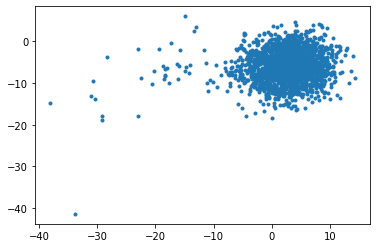

In [62]:
s = popm[0,0,:,2]
plt.figure()
plt.plot(np.real(s),np.imag(s),'.')

In [256]:
q3.inst

{'z_awg': 'awg132',
 'z_ch': [5],
 'ex_awg': 'awg134',
 'ex_ch': [3, 7],
 'ex_lo': 'psg_ex1',
 'com': 'com3'}

In [63]:
num = eval(q_target.q_name[1:])-1
data = [[1-2*j[i] for i in range(3)] for j in pop_d[:,:,num]]
data
# np.shape(pop_d[:,:,0,1])

[[-0.11228689006466785, -0.17695473251028804, -0.9600235155790711],
 [-0.06760728982951214, -0.1440329218106995, -1.0047031158142268],
 [0.008818342151675651, -0.1934156378600822, -0.9800117577895355],
 [-0.03703703703703698, -0.10640799529688416, -1.0411522633744856],
 [0.04761904761904767, -0.08641975308641969, -0.9894179894179893],
 [-0.0005878894767783471, -0.06878306878306883, -0.9541446208112874],
 [0.085243974132863, -0.06995884773662531, -1.009406231628454],
 [0.035861258083480285, -0.05467372134038784, -0.9835390946502058],
 [-0.025279247501469593, -0.0005878894767783471, -0.9800117577895355],
 [-0.025279247501469593, -0.04526748971193406, -0.9764844209288652],
 [-0.012345679012345734, 0.004115226337448652, -0.9835390946502058]]

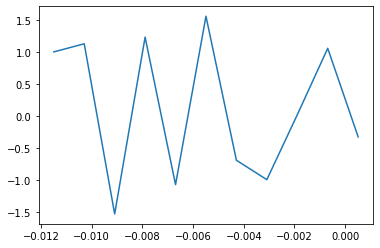

In [65]:
plt.figure()
plt.plot(volt_zgate,np.arctan(np.array(data)[:,1]/np.array(data)[:,0]))

In [103]:
q1.volt_zgate = -0.00168
q2.volt_zgate = -0.00019
q3.volt_zgate = 0.00034
q4.volt_zgate = 0.00061
q5.volt_zgate = 0.00061
q6.volt_zgate = 0.0425
q7.volt_zgate = -0.00023
q8.volt_zgate = 0.0007
q9.volt_zgate = -0.00049
q10.volt_zgate = -0.00015

# 纵场调制下Rabi

In [68]:
q = q3
q.imAmp  = 2*np.pi*q.bessel[-1]

In [70]:
q3.f_ex 

array(4347000000, dtype=int64)

In [69]:
f_target = 4.347e9
t_rabi = np.linspace(0,200,121)
dcstate = ['q3']
q_target = measure.qubits[dcstate[0]]
freq = np.linspace(-150,150,51)*1e6 + q_target.f_ex 
job = Job(mrw.lRabi,(measure,f_target,t_rabi,freq,dcstate),max=len(freq),\
          tags=(dcstate+[str(f_target)]+[str(measure.qubits[dcstate[0]].imAmp)]))
fr, tr, sr = await job.done()

Output()

In [151]:
dt.specshift(q2.specfuncz,4.347,bias=-0.001,side='lower')

(4.340890230429681, -0.5458400626412153)

In [ ]:
f_target = 4.347e9
t_rabi = np.linspace(0,200,121)
dcstate = ['q3']
q_target = measure.qubits[dcstate[0]]
volt = np.linspace(-0.015,0.015,51)  
job = Job(mrw.lRabi,(measure,f_target,t_rabi,volt,dcstate),max=len(volt),\
          tags=(dcstate+[str(f_target)]+[str(measure.qubits[dcstate[0]].imAmp)]))
vr, tr, sr = await job.done()

Output()

In [172]:
f_target = 4.347e9
t_rabi = np.linspace(0,200,121)
dcstate = ['q3']
q_target = measure.qubits[dcstate[0]]
imAmp = np.linspace(0,0.6,41)*2*np.pi  
job = Job(mrw.lRabi,(measure,f_target,t_rabi,imAmp,dcstate),max=len(imAmp),\
          tags=(dcstate+[str(f_target)]+[str(measure.qubits[dcstate[0]].imAmp)]))
fr, tr, sr = await job.done()

Output()

In [105]:
measure.qubits['q3'].amp=0.08

In [181]:
f_target = 4.347e9
t_rabi = np.linspace(0,12000,121)
dcstate = ['q3']
q_target = measure.qubits[dcstate[0]]
imAmp = np.linspace(0,0.6,41)*2*np.pi  
# imAmp = np.array([0,0.3235])*2*np.pi
job = Job(mrw.lT1,(measure,f_target,t_rabi,imAmp,dcstate),max=len(imAmp),\
          tags=(dcstate+[str(f_target)]+[str(measure.qubits[dcstate[0]].imAmp)]))
fr, tr, sr = await job.done()

Output()

In [179]:
q3.pi_len = 32e-9

# Zpulse_XY

In [ ]:
q_target = 'q3'
which, tshift, t_int = measure.offwhich, 3000, 0
tdelay = np.linspace(0,200,41)
# await cww.ats_setup(measure.ats,measure.delta,l=measure.readlen,repeats=1000,weight=weight)
job = Job(mrw.zPulse_XY, (measure,tdelay,t_int,tshift,which,[q_target]), tags=[q_target], max=len(tdelay))
t_xy, pop_xy = await job.done()
plt.figure()
plt.plot(t_xy,pop_xy)
plt.show()

In [ ]:
async def optZpulse(t1,t2,t3,t4,t5,t6,t7,t8,t9,t10):
    caliparas = (t1,t2,t3,t4,t5,t6,t7,t8,t9,t10)
    job = Job(mrw.zPulse_XY, (measure,tdelay,t_int,tshift,which,caliparas,['q2']), tags=['q2'], max=len(tdelay))
    t_xy, pop_xy = await job.done()
    s = pop_xy[:,0]
    l = int(len(s)/3)
    return np.sum((s[:2*l]-np.mean(s[2*l:]))**2)

    
which, tshift, t_int = measure.offwhich, 5000, 20
tdelay = np.append(np.linspace(10,200,20),np.linspace(3000,4000,10))
    
start = [1.84e-9,0.0272,1.406e-8,-0.1765,2.183e-9,0,5.489e-7,-0.0172,8.57e-8,-0.0107]
senstive = np.abs(start)/2
args = measure,tdelay,t_int,tshift,which,['q10']
ret = opt.optimize(optZpulse,start,senstive,[3]*10,print_info=True,algorithm='minimize')

In [ ]:
measure.onwhich

# pi脉冲振幅

In [ ]:
q_target = q10
t_rabi = np.linspace(1,501,201)
att_single = 35

com9 open...
last ATT 35.0
now ATT 35.0


Output()

<IPython.core.display.Javascript object>


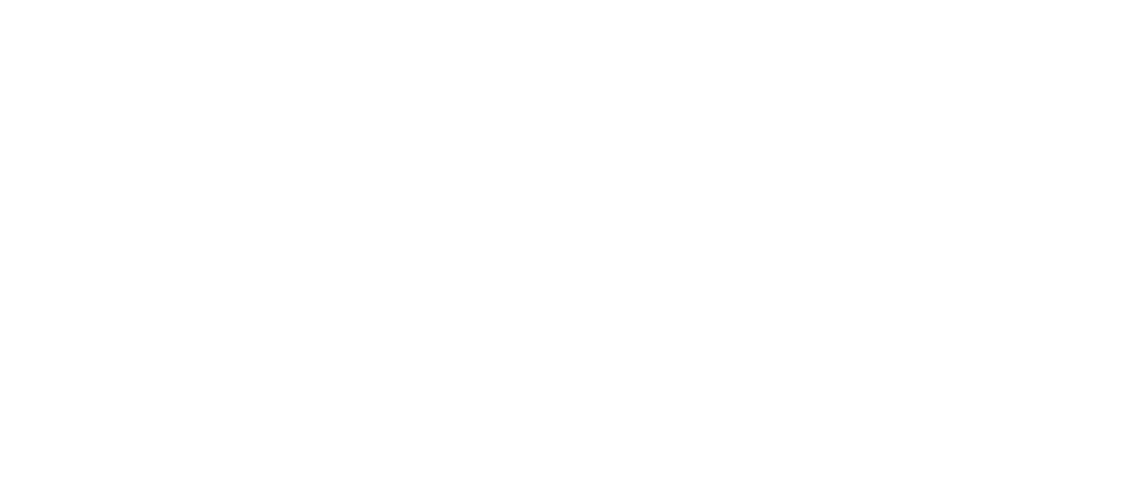

In [1149]:
tag = q_target.q_name
mr.Att_Setup(measure,q_target.inst['com']).Att(att_single)
await psg[q_target.inst['ex_lo']].setValue('Output','ON')
await psg['psg_lo'].setValue('Output','ON')
await mr.jpa_switch(measure,'ON')
await psg[q_target.inst['ex_lo']].setValue('Frequency',(q_target.f_ex+q_target.delta_ex)[0])
job = Job(mr.pipulseAmp, (q_target,measure,t_rabi), tags=[tag], max=9)
amp_pi, t_amp, s_amp = await job.done()
state = await mr.QueryInst(measure)
x, y , s = amp_pi[:,0], t_amp[0][:,0], s_amp[:,:,0]
wlist = [((op.RowToRipe().fourier(y,np.abs(i)))[0]) for i in s]
t_op = op.RowToRipe().firstMax(y,np.abs(s[-1]),num=0,peakpercent=0.7)
a = np.polyfit(x,wlist,1)
z = np.poly1d(a)
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,4))
extent = [np.min(y),np.max(y),np.min(x),np.max(x)]
axes[0].imshow(np.abs(s),extent=extent,origin='lower',aspect='auto')
axes[0].set_title('$pi/2=%.1f$'%t_op)
axes[1].set_yticks(x)
axes[1].plot(x,wlist,'.')
axes[1].plot(x,z(x))
axes[1].set_title(f'$grad={a[0]}$')
plt.show()

<IPython.core.display.Javascript object>


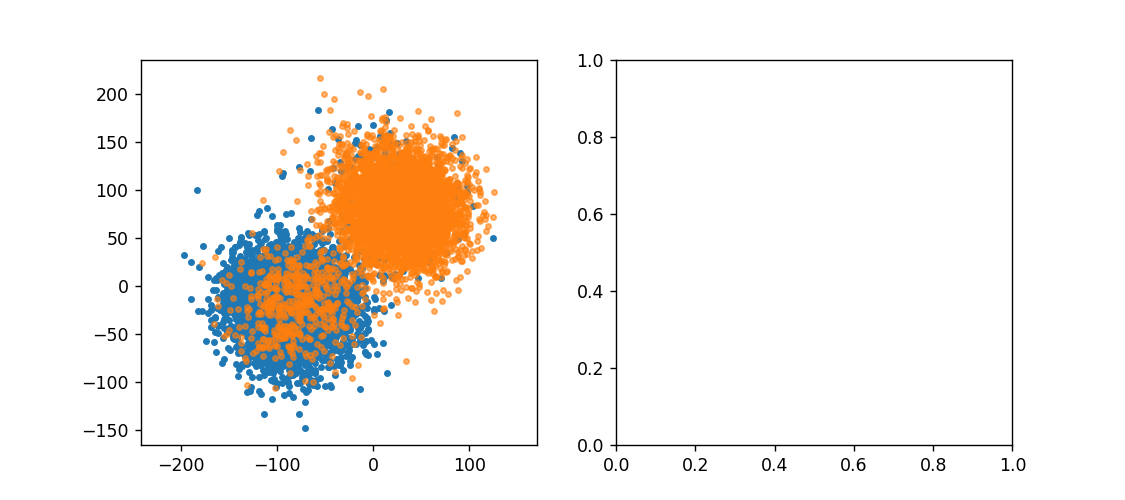

In [561]:
num = measure.n//2+measure.n%2
fig, axes = plt.subplots(ncols=2,nrows=num,figsize=(9,4*num))
for i in range(measure.n):
    s_off, s_on = s_st_Q[0,:,i], s_st_Q[1,:,i]
    ax = axes[i//2][i%2] if num>1 else axes[i]
    ax.plot(np.real(s_off),np.imag(s_off),'.')
    ax.plot(np.real(s_on),np.imag(s_on),'.',alpha=0.6)
#     ax.vlines([0],10,-100)
#     ax.hlines([0],-10,100)
    ax.axis('equal')
plt.show()

<IPython.core.display.Javascript object>


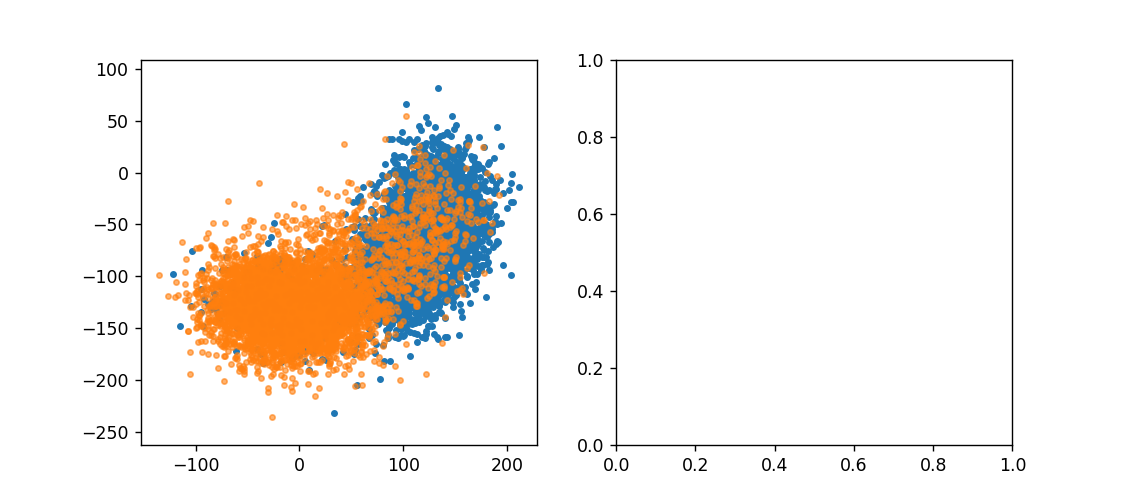

In [227]:
num = measure.n//2+measure.n%2
fig, axes = plt.subplots(ncols=2,nrows=num,figsize=(9,4*num))
for i in range(measure.n):
    s_off, s_on = s_st[0,:,i], s_st[1,:,i]
    ax = axes[i//2][i%2] if num>1 else axes[i]
    ax.plot(np.real(s_off),np.imag(s_off),'.')
    ax.plot(np.real(s_on),np.imag(s_on),'.',alpha=0.6)
#     ax.vlines([0],10,-100)
#     ax.hlines([0],-10,100)
    ax.axis('equal')
plt.show()

<IPython.core.display.Javascript object>


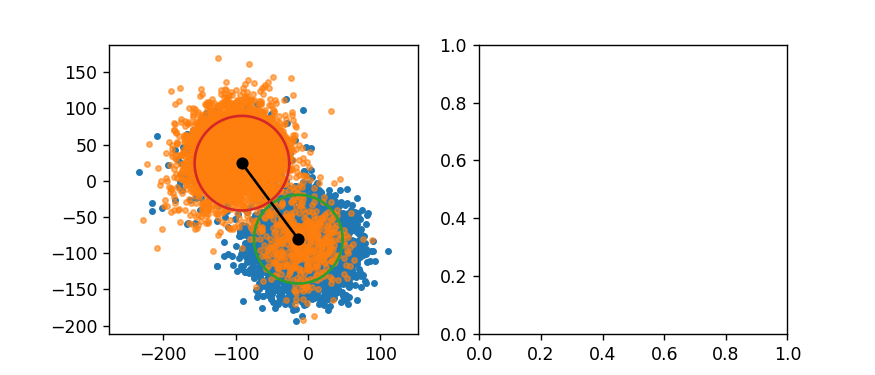

In [565]:
num = measure.n//2+measure.n%2
fig, axes = plt.subplots(ncols=2,nrows=num,figsize=(7,3*num))
for i in range(measure.n):
    s_off, s_on = s_st[0,:,i], s_st[1,:,i]
    ax = axes[i//2][i%2] if num>1 else axes[i]
    x, y = s_off, s_on
    offmean, onmean = np.mean(x), np.mean(y)
    offstd, onstd = np.std(x), np.std(y)
    theta = np.arange(0, 2*np.pi, 0.01)
    roff = np.real(offmean) + offstd * np.cos(theta)
    ioff = np.imag(offmean) + offstd * np.sin(theta)
    ron = np.real(onmean) + onstd * np.cos(theta)
    ion = np.imag(onmean) + onstd * np.sin(theta)
    ax.plot(np.real(s_off),np.imag(s_off),'.')
    ax.plot(np.real(s_on),np.imag(s_on),'.',alpha=0.6)
    ax.axis('equal')
    ax.plot(roff,ioff)
    ax.plot([np.real(offmean),np.real(onmean)],[np.imag(offmean),np.imag(onmean)],'k-o')
    ax.plot(ron,ion)
plt.show()

<IPython.core.display.Javascript object>


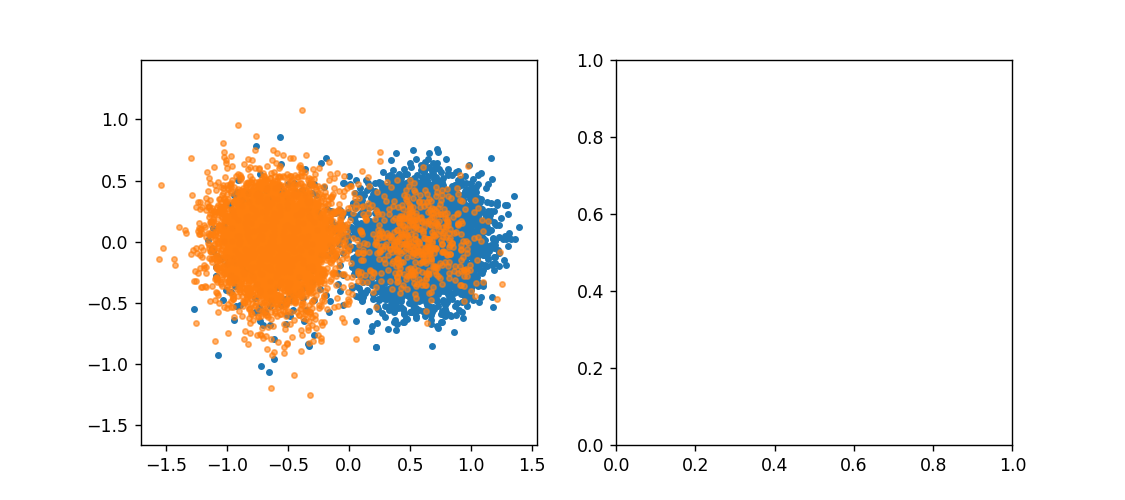

In [566]:
num = measure.n//2+measure.n%2
fig, axes = plt.subplots(ncols=2,nrows=num,figsize=(9,4*num))
for i in range(measure.n):
    s_off, s_on = s_st[0,:,i], s_st[1,:,i]
    ax = axes[i//2][i%2] if num>1 else axes[i]
    x, y = s_off, s_on
    add, diff = (np.mean(x)+np.mean(y))/2, np.mean(x)-np.mean(y)
    s_off, s_on = (x-add)/diff, (y-add)/diff
    ax.plot(np.real(s_off),np.imag(s_off),'.')
    ax.plot(np.real(s_on),np.imag(s_on),'.',alpha=0.6)
    ax.axis('equal')
plt.show()

# CrossTalk矫正

In [ ]:
t_rabi = np.linspace(0,100,201)
measure.wave['Read'] = [['Readout_I']*len(t_rabi),['Readout_Q']*len(t_rabi)]

In [ ]:
bits = [q1,q2,q3,q4,q5,q6,q7]
z_crosstalk = np.ones((10,10))

In [ ]:
# fig, axes = plt.subplots(ncols=7,nrows=7,figsize=(28,28))
%matplotlib inline
await mr.jpa_switch(measure,'ON')
for v,k in enumerate(bits,start=0):
    q_target = k
    print(q_target.q_name)
    measure.delta,measure.base,measure.readlen = q_target.state[1:]
    await mr.RecoverInst(measure,state=q_target.state[0])
    mr.Att_Setup(q_target.inst['com']).Att(q_target.power_rabi)
    for i,j in enumerate(bits):
        q_bias = j
        tag = q_target.q_name + '_' + q_bias.q_name
        if q_bias == q_target:
            if q_target.f_ex[0] > 3.9e9:
                v_rabi = np.linspace(-0.5,0.5,201)
            else:
                v_rabi = np.linspace(-0.05,0.05,201)
        else:
            v_rabi = np.linspace(-1,1,201)
        job = Job(mr.Z_cross, (q_target,q_bias,measure,v_rabi,(len(v_rabi)-1),True), tags=[tag], max=500,avg=True)
        v_Z, s_Z = await job.done()
#         await awg131.use_waveform(name='test',ch=i+1)
        await mr.InitInst(measure,psgdc=False,awgch=True)
        try:
            A, C, W, phi = op.Cos_Fit().fitCos(v_Z[:,0], np.abs(s_Z[:,0]))
        except Exception or RuntimeWarning:
            print('bad fitting')
            A, C, W, phi =0,0,0,0
        z = A*np.cos(2*np.pi*W*v_Z+phi)+C
        v_op = op.RowToRipe().firstMax(v_Z[:,0],np.abs(z[:,0]),num=0)
        W = -W if v_op < 0 else W
        z_crosstalk[v,i] = W
        plt.figure()
        plt.plot(v_Z,abs(s_Z))
        plt.plot(v_Z,z)
        plt.vlines(0,np.max(np.abs(s_Z[:,0])),np.min(np.abs(s_Z[:,0])),'r')
        plt.title(r'$%s-%s,W = %g,phi=%g,A=%g $' %(q_target.q_name,q_bias.q_name,W,phi,A))
        plt.show()
    await mr.InitInst(measure,psgdc=True,awgch=True)


In [ ]:
z_crosstalk

# 直流crosstalk矫正

In [574]:
dc_crosstalk = np.eye(10)

In [ ]:
bits = [q1,q2,q3,q4,q5,q6,q7]
await psg_trans.setValue('Power',13)
mr.Att_Setup(measure,'com8').Att(25)
# await cw.modulation_ex(q1,measure)
for v, k in enumerate(bits):
    q_target = k
    for i,j in enumerate(bits):
        q_bias = j
        if q_bias == q_target:
            continue
        else:
            tag = q_target.q_name + '_' + q_bias.q_name
            print(tag)
            job = Job(mr.dcCrosstalk, (q_target,q_bias,measure), tags=[tag], max=40)
            v_bias, s_sc = await job.done()
            x, y = v_bias[:,0], np.abs(s_sc[:,0])
            a,b,c,d,band = op.Lorentz_Fit().fitLorentz(x,y)
            ratio = -b/0.005
            dc_crosstalk[eval(q_target.q_name[1:]),eval(q_bias.q_name[1:])] = ratio
            z = a/(1.0+c*(x-b)**2)+d
            plt.figure()
            plt.plot(x,y)
            plt.plot(x,z)
            plt.title(tag+f'ratio={ratio}')
            plt.savefig(r'D:\skzhao\file_name\figure\%s.png'%tag)
            plt.close()
            clear_output()
            await mr.InitInst(measure,psgdc=True,awgch=False)
    await mr.InitInst(measure,psgdc=True,awgch=False)

# 二维谱

In [94]:
measure.readamp = [0.03]
measure.ringup = [100]
measure.ringupamp = [0.1]
freq = np.arange(4.6,5.95,0.001)*1e9
bits = [q7]
await psg_trans.setValue('Power',2)
for k, i in enumerate(bits):
    await mrw.jpa_switch(measure,'ON')
    print(i.q_name)
#     if k == 0:
#         await dc[bits_target[k+1].inst['dc']].DC(-1)
#     elif k == len(bits_target)-1:
#         await dc[bits_target[k-1].inst['dc']].DC(-1)
#     else:
#         await dc[bits_target[k-1].inst['dc']].DC(-1)
#         await dc[bits_target[k+1].inst['dc']].DC(-1)
    job = Job(mrw.spec2d, (i,measure,freq,None), tags=[i.q_name], max=32)
    v_s2, f_s2, s_s2 = await job.done()
    await cww.InitInst(measure,psgdc=True,awgch=True,clearwaveseq=None)
    clear_output()

In [ ]:
measure.readamp = [0.03]
measure.ringup = [100]
measure.ringupamp = [0.06]
freq = np.arange(4.3,5.5,0.001)*1e9
bits = [q1,q3,q4,q5,q6,q7,q9]
await psg_trans.setValue('Power',2)
for k, i in enumerate(bits):
    await mrw.jpa_switch(measure,'ON')
    print(i.q_name)
#     if k == 0:
#         await dc[bits_target[k+1].inst['dc']].DC(-1)
#     elif k == len(bits_target)-1:
#         await dc[bits_target[k-1].inst['dc']].DC(-1)
#     else:
#         await dc[bits_target[k-1].inst['dc']].DC(-1)
#         await dc[bits_target[k+1].inst['dc']].DC(-1)
    job = Job(mrw.spec2d, (i,measure,freq,None), tags=[i.q_name], max=32)
    v_s2, f_s2, s_s2 = await job.done()
    await cww.InitInst(measure,psgdc=True,awgch=True,clearwaveseq=None)
    clear_output()

q4


Output()

In [ ]:
np.linspace(-q3.T_bias[0]*0.3,q3.T_bias[0]*0.3,31) + q3.T_bias[1] 

# 用谱验证crosstalk精度

In [35]:
measure.readamp = [0.03]*10
measure.ringup = [100]*10
measure.ringupamp = [0.1]*10
current = np.linspace(-0.5,0.5,9)
bits = [q1,q2,q3,q4,q5,q6,q7,q8,q9,q10]
await psg_trans.setValue('Power',1)
for v, k in enumerate(bits[4:5],start=0):
    count = 0
    q_target = k

    for i,j in enumerate(bits[9:10]):
        q_bias = j
        if q_bias == q_target:
            continue
        else:
            await mrw.dcManage(measure,dcstate={},readstate=[i for i in measure.qubits],calimatrix=None)
            await cww.RecoverInst(measure,state=q_target.state[0])
            await psg[q_target.inst['ex_lo']].setValue('Output','OFF')
            freq = np.arange(-20,20,0.5)*1e6 + q_target.f_ex

            tag = 'read' + q_target.q_name + '_' + 'bias' + '_' + q_bias.q_name
            print(measure.qubitToread)
            job = Job(mrw.spec2d_crosstalk, (measure,current,freq,None,False,[q_bias.q_name],[q_target.q_name]),\
                      tags=[tag], max=len(current))
            v_s2, f_s2, s_s2 = await job.done()

            clear_output()
await cww.InitInst(measure,psgdc=True,awgch=True,clearwaveseq=None)

# 二维谱AWG

In [302]:
q = q10
fc = 4.7
dt.vTophi(q.specfuncz,q.T_bias,fc,'lower')

-0.6891783436914941

In [13]:
for i in measure.qubits:
    print(measure.qubits[i].f_ex)

4533000000.000077
4514000000.000022
4304000000.0
4480000000.0000105
4528000000.000043
4579000000.00006
4540000000.000047
4436000000.000012
4494000000.000031
4819000000.00014


In [28]:
measure.readamp = [0.03]*10
measure.ringup = [100]*10
measure.ringupamp = [0.1]*10
freq = np.arange(4.3,5.4,0.002)*1e9
current = np.linspace(-0.5,0.5,21)
bits = [q3]
mat=None
await psg_trans.setValue('Power',3)
for k, i in enumerate(bits):
#     await measure.attinst['com9'].set_att(25)
    await mrw.jpa_switch(measure,'ON')
#     measure.delta,measure.base,measure.readlen = q7.state[1:]
#     await mrw.RecoverInst(measure,state=q7.state[0])
    print(i.q_name)
    job = Job(mrw.spec2d_awg, (i,measure,current,freq,mat), tags=[i.q_name], max=21)
    v_s2, f_s2, s_s2 = await job.done()
    await cww.InitInst(measure,psgdc=True,awgch=True,clearwaveseq=None)
    clear_output()

In [748]:
measure.delta

array([20000000.])

In [21]:
measure.readamp = [0.03]
measure.ringup = [100]
measure.ringupamp = [0.06]
freq = np.arange(4.3,5.9,0.002)*1e9
current = np.linspace(-0.8,0.5,51)
bits = [q2]
await psg_trans.setValue('Power',1)
for k, i in enumerate(bits):
#     await measure.attinst['com9'].set_att(25)
    await mrw.jpa_switch(measure,'ON')
#     measure.delta,measure.base,measure.readlen = q7.state[1:]
#     await mrw.RecoverInst(measure,state=q7.state[0])
    print(i.q_name)
    job = Job(mrw.spec2d_awg, (i,measure,current,freq,None), tags=[i.q_name], max=41)
    v_s2, f_s2, s_s2 = await job.done()
    await cww.InitInst(measure,psgdc=True,awgch=True,clearwaveseq=None)
    clear_output()

In [ ]:
measure.readamp = [0.03]
measure.ringup = [100]
measure.ringupamp = [0.1]
freq = np.arange(4.3,5.75,0.002)*1e9
current = np.linspace(-0.5,0.5,51)
bits = [q10]
calimatrix=None
await psg_trans.setValue('Power',1)
for k, i in enumerate(bits):
#     await measure.attinst['com9'].set_att(25)
    await mrw.jpa_switch(measure,'ON')
#     measure.delta,measure.base,measure.readlen = q7.state[1:]
#     await mrw.RecoverInst(measure,state=q7.state[0])
    print(i.q_name)
    job = Job(mrw.spec2d_awg, (i,measure,current,freq,calimatrix), tags=[i.q_name], max=51)
    v_s2, f_s2, s_s2 = await job.done()
    await cww.InitInst(measure,psgdc=True,awgch=True,clearwaveseq=None)
    clear_output()

q10


Output()

In [ ]:
measure.readamp = [0.03]
measure.ringup = [100]
measure.ringupamp = [0.06]
freq = np.arange(4,5.5,0.002)*1e9
current = np.linspace(-0.5,0.5,51)
bits = [q3,q6]
calimatrix=None
await cww.InitInst(measure,psgdc=True,awgch=True,clearwaveseq=None)
await psg_trans.setValue('Power',1)
for k, i in enumerate(bits):
#     await measure.attinst['com9'].set_att(25)
    await mr.jpa_switch(measure,'ON')
#     measure.delta,measure.base,measure.readlen = q7.state[1:]
#     await mrw.RecoverInst(measure,state=q7.state[0])
    print(i.q_name)
    job = Job(mrw.spec2d_awg, (i,measure,current,freq,calimatrix), tags=[i.q_name], max=51)
    v_s2, f_s2, s_s2 = await job.done()
    await cww.InitInst(measure,psgdc=True,awgch=True,clearwaveseq=None)
    clear_output()

In [200]:
measure.readamp = [0.03]
measure.ringup = [100]
measure.ringupamp = [0.06]
freq = np.arange(4.1,5.2,0.002)*1e9
current = np.linspace(-0.5,0.5,51)
bits = [q5]
calimatrix=None
await psg_trans.setValue('Power',1)
for k, i in enumerate(bits):
#     await measure.attinst['com9'].set_att(25)
#     await mr.jpa_switch(measure,'ON')
#     measure.delta,measure.base,measure.readlen = q7.state[1:]
#     await mrw.RecoverInst(measure,state=q7.state[0])
    print(i.q_name)
    job = Job(mrw.spec2d_awg, (i,measure,current,freq,calimatrix), tags=[i.q_name], max=51)
    v_s2, f_s2, s_s2 = await job.done()
    await cww.InitInst(measure,psgdc=True,awgch=True,clearwaveseq=None)
    clear_output()

# 坠饰态能谱

In [125]:
freq = np.arange(4.2,4.5,0.001)*1e9
current = np.linspace(0,0.7,11)*2*np.pi
bits = [q1,q2,q3,q4,q5,q6,q7,q8,q9,q10]
flux = {i:-0.5 for i in measure.qubits}
# flux['q3'] = 0.2
# flux['q5'] = 0.2
fc = 4.3469e9
await psg_trans.setValue('Power',1)
for k, i in enumerate(bits):
    flux = {i:-0.8 for i in measure.qubits}
    
#     for j in measure.qubits:
#         q_idle = measure.qubits[j]
#         v_bias = dt.biasshift(q_idle.specfuncz,q_idle.f_ex/1e9,(2-q_idle.f_ex/1e9),'lower')
#         flux[j] = v_bias     
    flux[i.q_name] = 0
    task = await mrw.executeZwave(measure,cww.zWave,dcstate=flux,\
    calimatrix=calimatrix,output=True,during=(len(measure.t_new)/2.5/2e9),offset=0,shift=0e-9)
    await mrw.concurrence(task)
#     current_cali = await mrw.zManage(measure,dcstate=flux,calimatrix=calimatrix,qnum=10)
#     i.offset = current_cali[i.q_name]
    
    await mrw.jpa_switch(measure,'ON')
#     await cww.modulation_read(measure,measure.delta,measure.readlen)
#     await awg133.run()
    await psg_ex1.setValue('Output','OFF')
#     measure.delta,measure.base,measure.readlen = q7.state[1:]
#     await mrw.RecoverInst(measure,state=q7.state[0])
    print(i.q_name)
    job = Job(mrw.spec2d_dress, (i,measure,current,freq,fc,False), tags=[i.q_name,f"{fc/1e9}"], max=21)
    v_s2, f_s2, s_s2 = await job.done()
    i.offset = 0
#     await cww.InitInst(measure,psgdc=True,awgch=True,clearwaveseq=None)
    clear_output()

In [791]:
q7.dressenergy 

In [346]:
q7.volt = 0
q7.offset = 0
q7.phaseim = 0

In [27]:
q6.volt

-0.4783

In [34]:
for i in measure.qubits:
    measure.qubits[i].dressenergy = None

# 共振能级位置确定

In [211]:
qubit_bias,qubit_aux = q3, q4
fc = 4.3469e9
mat = calimatrix[2:4,2:4]

freq = np.arange(-100,50,1)*1e6 + fc
current = np.linspace(-0.08,0.08,4)+qubit_bias.volt
await psg_trans.setValue('Power',2)


await mrw.jpa_switch(measure,'ON')
#     measure.delta,measure.base,measure.readlen = q7.state[1:]
#     await mrw.RecoverInst(measure,state=q7.state[0])
await cww.modulation_read(measure,measure.delta,measure.readlen)
await awg133.run()
await psg_ex1.setValue('Output','OFF')
job = Job(mrw.anticross, (qubit_bias,qubit_aux,measure,current,freq,mat), tags=[f'{fc/1e9}GHz'], max=len(current))
v_s2, f_s2, s_s2 = await job.done()
#     await cww.InitInst(measure,psgdc=True,awgch=True,clearwaveseq=None)
clear_output()

In [34]:
await psg_ex1.setValue('Output','OFF')

In [163]:
12*4/5

9.6

# RB_waveform

## reference

In [27]:
mlist, gate = np.logspace(0.4,2.8,21,dtype=int), False
q_target = 'q2'
job = Job(mrw.RB_waveform,(measure,mlist,gate,[q_target],30),tags=[q_target,'reference'],no_bar=True)
m_RB, pop_RB = await job.done()
clear_output()

Output()

TypeError: cannot unpack non-iterable NoneType object

Text(0.5, 1.0, 'p=0.990950')

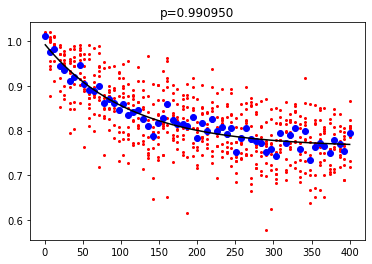

In [181]:
plt.figure()
plt.plot((m_RB[:,:,0].T).flatten(),(pop_RBw[:,:,0].T).flatten(),'ro',markersize=2)
plt.plot(np.mean(m_RB[:,:,0].T,axis=1), np.mean(pop_RBw[:,:,0].T,axis=1),'bo')
x, y = np.mean(m_RB[:,:,0].T,axis=1), np.mean(pop_RBw[:,:,0].T,axis=1)
A,B,p = op.RB_Fit().fitRB(x,y)
z = A*p**x+B
plt.plot(x,z,'k')
# plt.plot(x,y,'o')
plt.title('p=%f'%p)

In [95]:
q_target = 'q2'
mlist, len_data, gate = np.logspace(0.4,2.7,16,dtype=int), 30, '6'

job = Job(mrw.RB_waveform,(measure,mlist,len_data,gate,[q_target]),tags=[q_target,str(gate)],no_bar=True)
n_RBw, pop_RBw = await job.done()

Output()

In [ ]:
bit = [q6]
await psg_ex1.setValue('Moutput','OFF')
mlist, len_data, gate = np.logspace(0.4,2.6,15,dtype=int), 30, ['2','3','5','6']
for i, j in enumerate(bit):
    q_target = j.q_name
    print(q_target)
    for k in gate:
        job = Job(mrw.RB_waveform,(measure,mlist,len_data,k,[q_target]),tags=[q_target,str(k)],no_bar=True)
        n_RBw, pop_RBw = await job.done()
    for ch in measure.qubits[q_target].inst['ex_ch']:
        await measure.awg[measure.qubits[q_target].inst['ex_awg']].output_off(ch=ch)
    clear_output()

q6


Output()

In [74]:
np.logspace(0.4,2.6,15,dtype=int)

array([  2,   3,   5,   7,  10,  15,  22,  31,  45,  65,  93, 134, 193,
       277, 398])

In [205]:
# n, pop = n_RBw, pop_RBw
# x = np.meshgrid(range(np.shape(pop)[1]),n)[1]
# plt.figure(figsize=(7,4))
# plt.plot(x.flatten(),pop.flatten(),'r.',label='reference')
# plt.legend(loc='lower left')
# x, y = n_RBw[:,0], np.abs(np.mean(pop,axis=1))
# A,B,p = op.RB_Fit().fitRB(x,y)
# z = A*p**x+B
# plt.plot(x,z,'k')
# plt.plot(x,y,'o')
# plt.title('p=%f'%p)
# plt.show()

## gate

In [366]:
mlist, q_target, len_data, which = np.logspace(0.4,2.8,16,dtype=int), q6, 30, measure.offwhich[0]
dragcoef = 0.8/q_target.alpha/2/np.pi

await psg[q_target.inst['ex_lo']].setValue('Frequency',(q_target.f_ex+q_target.delta_ex)[0])
for gate in ['2','3','4','5','6','7'][:1]:
    job = Job(mr.RB_waveform, (q_target,measure,mlist,len_data,which,110e6,dragcoef,gate), tags=[q_target.q_name,gate],no_bar=True)
    n_RBw, pop_RBw = await job.done()
await mr.InitInst(measure,psgdc=True,awgch=True,clearwaveseq=[])

Output()

Output()

Output()

<IPython.core.display.Javascript object>


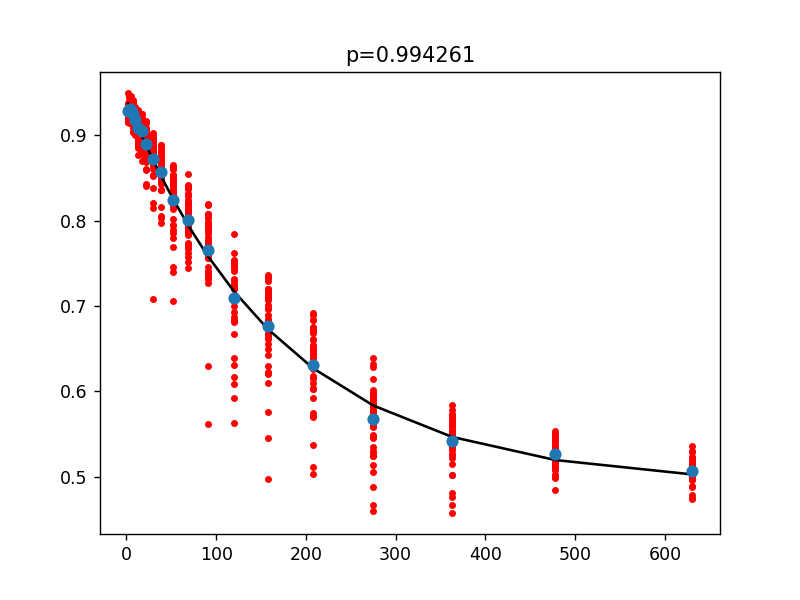

In [64]:
n, pop = n_RBw, pop_RBw
x = np.meshgrid(range(np.shape(pop)[1]),n)[1]
plt.figure(figsize=(7,4))
plt.plot(x.flatten(),pop.flatten(),'r.',label=gate)
plt.legend(loc='lower left')
x, y = n_RBw[:,0], np.abs(np.mean(pop,axis=1))
A,B,p = op.RB_Fit().fitRB(x,y)
z = A*p**x+B
plt.plot(x,z,'k')
plt.plot(x,y,'o')
plt.set_title('p=%f'%p)
plt.show()

In [70]:
Pref, Pgate, d = 0.9946, 0.994261, 2**(1)
Rgate = (1-Pgate/Pref)*(1-1/d)
Rgate

-0.003516601051131496

# 单比特tomo

In [551]:
q_target, which = q6, measure.onwhich
dragcoef = None
t_rabi = np.linspace(1,30,31)
await psg[q_target.inst['ex_lo']].setValue('Frequency',(q_target.f_ex+q_target.delta_ex)[0])
job = Job(mr.tomo, (q_target,measure,t_rabi,which,dragcoef), tags=[q_target.q_name], max=len(t_rabi))
t_tomo, poplist = await job.done()

Output()

In [553]:
poplist

array([[0.4414557 , 0.68255538, 0.09434335],
       [0.44165348, 0.74643987, 0.14893196],
       [0.42464399, 0.84355222, 0.27650316],
       [0.44719146, 0.88627373, 0.40842563],
       [0.40051424, 0.89181171, 0.40150316],
       [0.38172468, 0.87440665, 0.58049842],
       [0.43908228, 0.7903481 , 0.7252769 ],
       [0.44481804, 0.71064082, 0.81863133],
       [0.38548259, 0.55439082, 0.89121835],
       [0.42780854, 0.42147943, 0.89339399],
       [0.47982595, 0.28322785, 0.84196994],
       [0.43413766, 0.17246835, 0.77907437],
       [0.45193829, 0.10324367, 0.65288766],
       [0.46677215, 0.05953323, 0.49545095],
       [0.45431171, 0.0820807 , 0.34572785],
       [0.47290348, 0.14102057, 0.23457278],
       [0.46756329, 0.23971519, 0.15268987],
       [0.47606804, 0.37321994, 0.0846519 ],
       [0.47448576, 0.51681171, 0.06784019],
       [0.45945411, 0.63073576, 0.09236551],
       [0.47883703, 0.75613133, 0.17780854],
       [0.47606804, 0.84177215, 0.28560127],
       [0.

In [554]:
data = [[1-2*j[i] for i in range(3)] for j in poplist]
data

[[0.11708860759493667, -0.3651107594936709, 0.8113132911392404],
 [0.11669303797468356, -0.4928797468354431, 0.7021360759493671],
 [0.15071202531645567, -0.6871044303797469, 0.446993670886076],
 [0.10561708860759489, -0.7725474683544304, 0.18314873417721522],
 [0.19897151898734178, -0.7836234177215189, 0.196993670886076],
 [0.23655063291139244, -0.7488132911392404, -0.160996835443038],
 [0.12183544303797467, -0.5806962025316456, -0.45055379746835444],
 [0.11036392405063289, -0.4212816455696202, -0.637262658227848],
 [0.22903481012658233, -0.10878164556962022, -0.7824367088607596],
 [0.1443829113924051, 0.15704113924050633, -0.7867879746835442],
 [0.04034810126582278, 0.43354430379746833, -0.6839398734177216],
 [0.13172468354430378, 0.6550632911392404, -0.5581487341772151],
 [0.096123417721519, 0.7935126582278481, -0.3057753164556962],
 [0.06645569620253167, 0.8809335443037974, 0.009098101265822778],
 [0.091376582278481, 0.8358386075949367, 0.30854430379746833],
 [0.054193037974683556, 

In [401]:
np.savez('z.npz',data=c)

In [284]:
x = [['I1','I2'],['Q1','Q2']]*2

In [288]:
[x[0]*2,x[1]*2]

[['I1', 'I2', 'I1', 'I2'], ['Q1', 'Q2', 'Q1', 'Q2']]

In [287]:
x

[['I1', 'I2'], ['Q1', 'Q2'], ['I1', 'I2'], ['Q1', 'Q2']]

In [270]:
import qulab.waveform_new as wn

In [276]:
cos = wn._basic_wave(wn.COS, 2*np.pi/10)
pulse = wn._add(wn._mul(cos, a), b)
pulse

((((), ()), (((4, 0, 0.6283185307179586),), (1,))), (0.54, 0.46))

In [275]:
a = wn._const(0.46)
b = wn._const(0.54)

In [286]:
t_lst = np.linspace(-90000,10000,250000)*1e-9
pulse = wn.hanning(10000/1e9)
wav = pulse(t_lst)

<IPython.core.display.Javascript object>


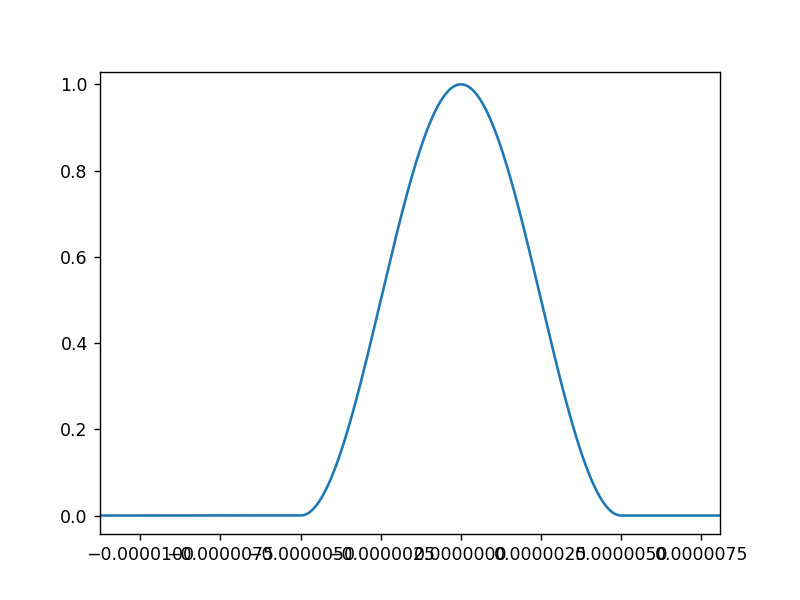

In [287]:
plt.figure()
plt.plot(t_lst,wav)